In [2]:
# assign directory
import git
from pathlib import Path
import os
import random
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','segmentAnything','mini-toy-segmentAnything-resizedBlurred-normalized')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [3]:
def npz_opener(path):
    return np.load(path)["image"]
npz_opener(file_list[0])

array([[[ 0.82419735,  0.11387229, -0.75989538],
        [ 1.3030153 ,  0.67662928, -0.26759052],
        [ 1.46262128,  0.83295067, -0.04878836],
        ...,
        [ 3.83010999,  4.17822836,  3.69819862],
        [ 0.31877841, -0.01118482,  0.1700138 ],
        [-1.64969535, -2.29347708, -1.77185536]],

       [[ 0.13257144, -0.69899893, -1.47100239],
        [ 1.3030153 ,  0.67662928, -0.26759052],
        [ 1.2764143 ,  0.61410073, -0.24024025],
        ...,
        [ 3.90991298,  4.2720212 ,  3.69819862],
        [-0.26644352, -0.69899893, -0.43169214],
        [-1.56989236, -2.19968425, -1.68980455]],

       [[-0.4260495 , -1.35554876, -2.04535806],
        [ 1.2764143 ,  0.645365  , -0.29494079],
        [ 1.17001031,  0.48904362, -0.34964133],
        ...,
        [ 3.83010999,  4.17822836,  3.69819862],
        [ 1.32961629,  1.208122  ,  1.18197379],
        [-1.59649336, -2.19968425, -1.77185536]],

       ...,

       [[ 2.0744442 ,  2.05225749,  1.64692838],
        [ 2

In [4]:
def npz_opener_pickle(path):
    image = Image.open(path).convert('RGB')
    return np.array(image)

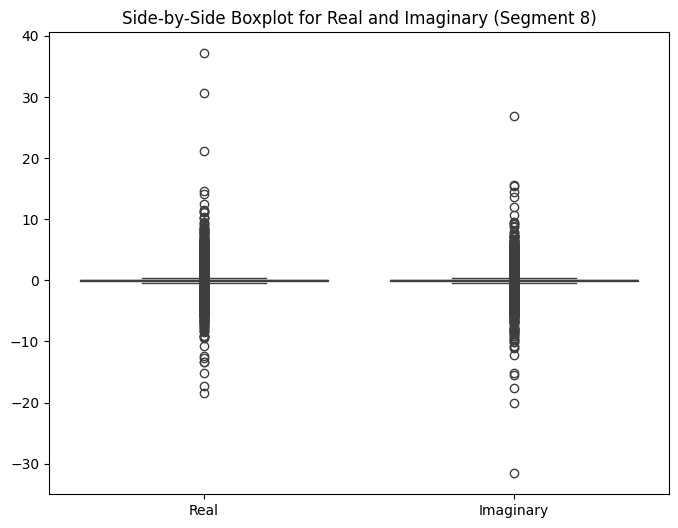

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to generate the side-by-side boxplot for the selected nth set using NumPy arrays
def plot_nth_boxplot(real_data, imag_data, n, num_parts=10):
    # Convert the real and imaginary data to NumPy arrays (if they're not already)
    real_data = np.array(real_data)
    imag_data = np.array(imag_data)

    # Calculate the index range for the nth segment
    segment_size = len(real_data) // num_parts
    start_idx = segment_size * (n - 1)
    end_idx = segment_size * n

    # Filter the real and imaginary data by the nth segment using slicing
    real_segment = real_data[start_idx:end_idx]
    imag_segment = imag_data[start_idx:end_idx]

    # Combine the data into a list for side-by-side boxplots
    combined_data = [real_segment, imag_segment]
    labels = ["Real", "Imaginary"]
    
    # Plot side-by-side boxplots
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_data)
    plt.xticks([0, 1], labels=labels)
    plt.title(f'Side-by-Side Boxplot for {labels[0]} and {labels[1]} (Segment {n})')
    plt.show()

# Example usage:
n = 8  # Choose the segment you want (1st, 2nd, etc.)

plot_nth_boxplot(real_data, imag_data, n)

In [3]:
import os
import random
import shutil

# CREATING THE MINI DATASET
source_dir = '/Volumes/SSD/hbmv/hierarchical-bayesian-model-validation/raw-data/segmentAnything/toy-segmentAnything-resizedBlurred-normalized'
destination_dir = '/Volumes/SSD/hbmv/hierarchical-bayesian-model-validation/raw-data/segmentAnything/mini-toy-segmentAnything-resizedBlurred-normalized'

# Get the list of files in the source directory
all_files = os.listdir(source_dir)

# Randomly select 2500 files from the list
files_to_copy = random.sample(all_files, 2500)

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the selected files to the destination directory
for file in files_to_copy:
    # Construct full file paths
    source_file = os.path.join(source_dir, file)
    destination_file = os.path.join(destination_dir, file)
    
    # Copy the file
    shutil.copy(source_file, destination_file)

print(f"Successfully copied {len(files_to_copy)} files to {destination_dir}")

Successfully copied 2500 files to /Volumes/SSD/hbmv/hierarchical-bayesian-model-validation/raw-data/segmentAnything/mini-toy-segmentAnything-resizedBlurred-normalized


In [22]:
def twoSampleComparisonPlotsShift(samp1, samp2, bw=0.2, samp1name="Sample 1", samp2name="Sample 2", shift=40):
    n_1 = len(samp1)
    n_2 = len(samp2)
    ksres = stats.ks_2samp(samp1, samp2)
    ks_loc, ks_stat = ksres.statistic_location, ksres.statistic
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Apply a small shift to Sample 2 to prevent overlap
    shifted_samp2 = samp2 + shift  

    axes[1].set_ylim(bottom=10**-6, top=10)

    # KDE plots (Shifted Sample 2)
    sns.kdeplot(ax=axes[0], x=samp1, bw_method=bw, label=samp1name)
    sns.kdeplot(ax=axes[0], x=shifted_samp2, bw_method=bw, label=f"{samp2name} (shifted)")

    sns.kdeplot(ax=axes[1], x=samp1, bw_method=bw, log_scale=[False, True], label=samp1name)
    sns.kdeplot(ax=axes[1], x=shifted_samp2, bw_method=bw, log_scale=[False, True], label=f"{samp2name} (shifted)")

    # CDF plots (No shift applied here, as CDF should remain accurate)
    axes[2].plot(np.sort(samp1), np.arange(1, n_1+1)/n_1, label=samp1name)
    axes[2].plot(np.sort(samp2), np.arange(1, n_2+1)/n_2, label=samp2name)

    # KS Test visualization
    emp_cdf_at_loc = np.searchsorted(np.sort(samp1), ks_loc, side='right') / n_1
    emp_cdf_at_loc2 = np.searchsorted(np.sort(samp2), ks_loc, side='right') / n_2
    axes[2].vlines(ks_loc, emp_cdf_at_loc, emp_cdf_at_loc2, linestyles='--', 
                   label=f'Maximum Deviation: {np.round(ks_stat, 6)}\nat x={np.round(ks_loc, 6)}', color='xkcd:bright red')

    # Titles and legends
    axes[0].set_title("Non Log Scale PDF (Shifted Sample 2)")
    axes[1].set_title("Log Scale PDF (Shifted Sample 2)")
    axes[2].set_title(f"CDF with p-value: {np.round(ksres.pvalue, 8)}")
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()

    return fig

# Gray

In [6]:
coeffs, mags = convert_fourier_list(data_dir, c = 3, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)

In [7]:
n= len(real_data)
n

163840000

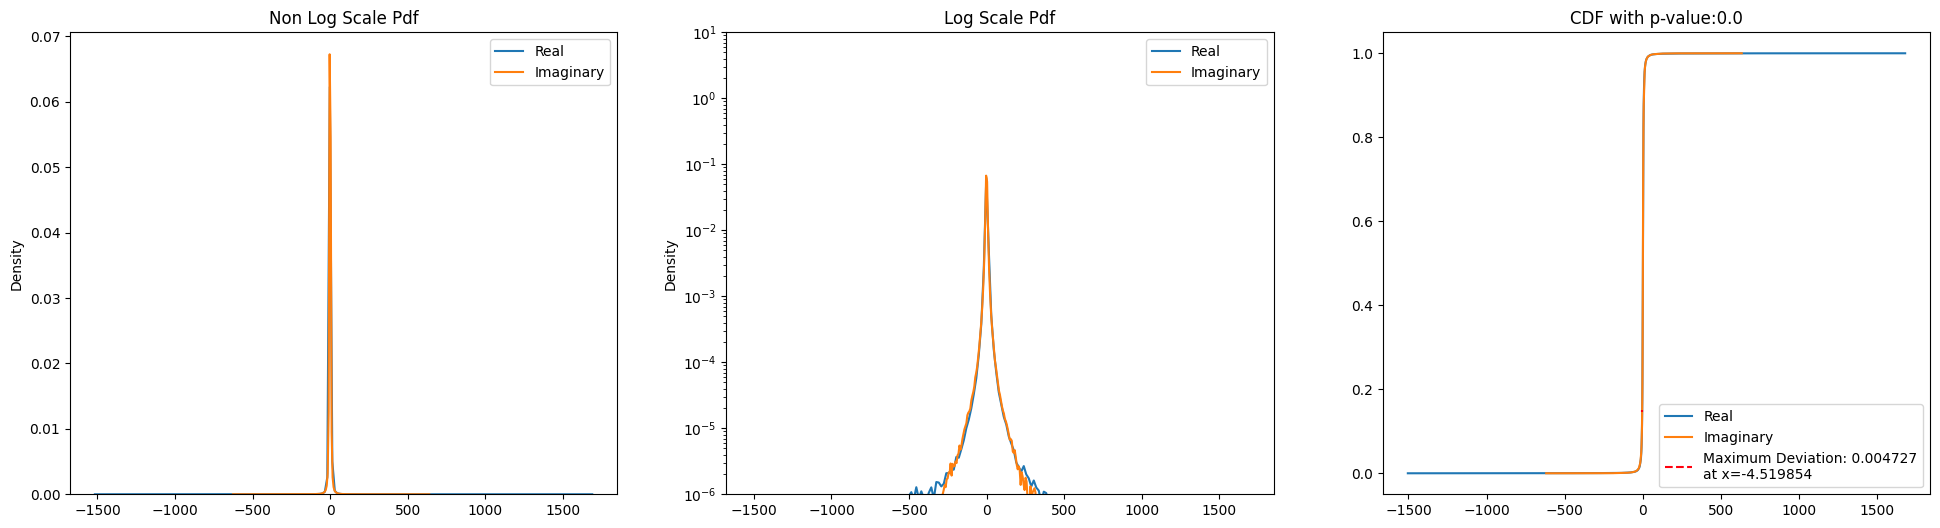

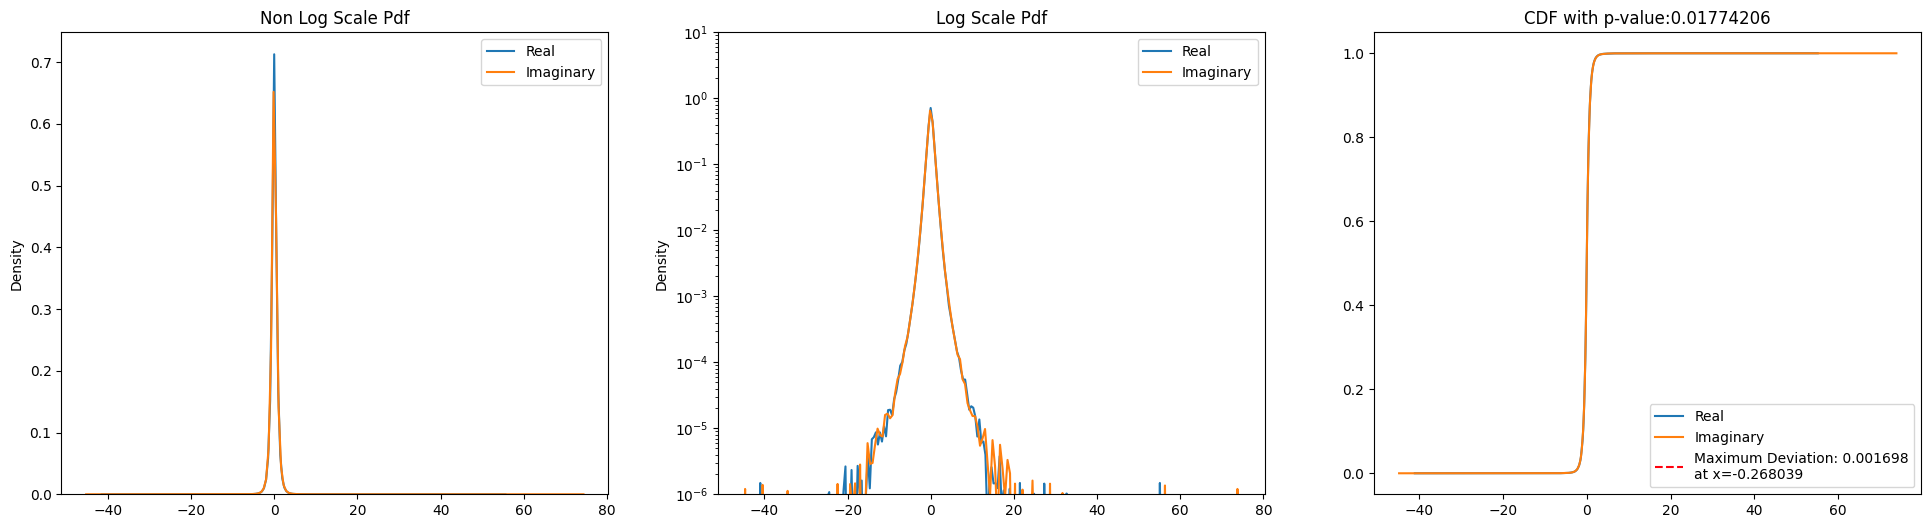

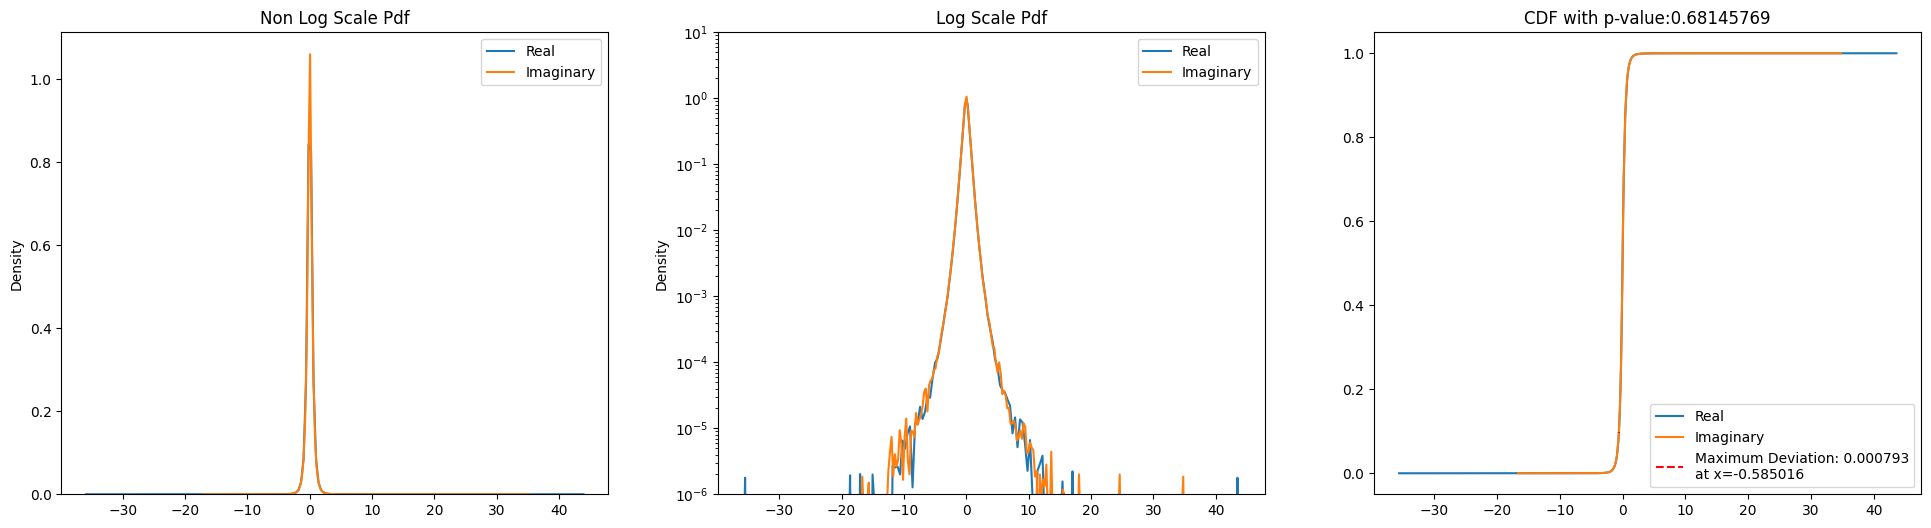

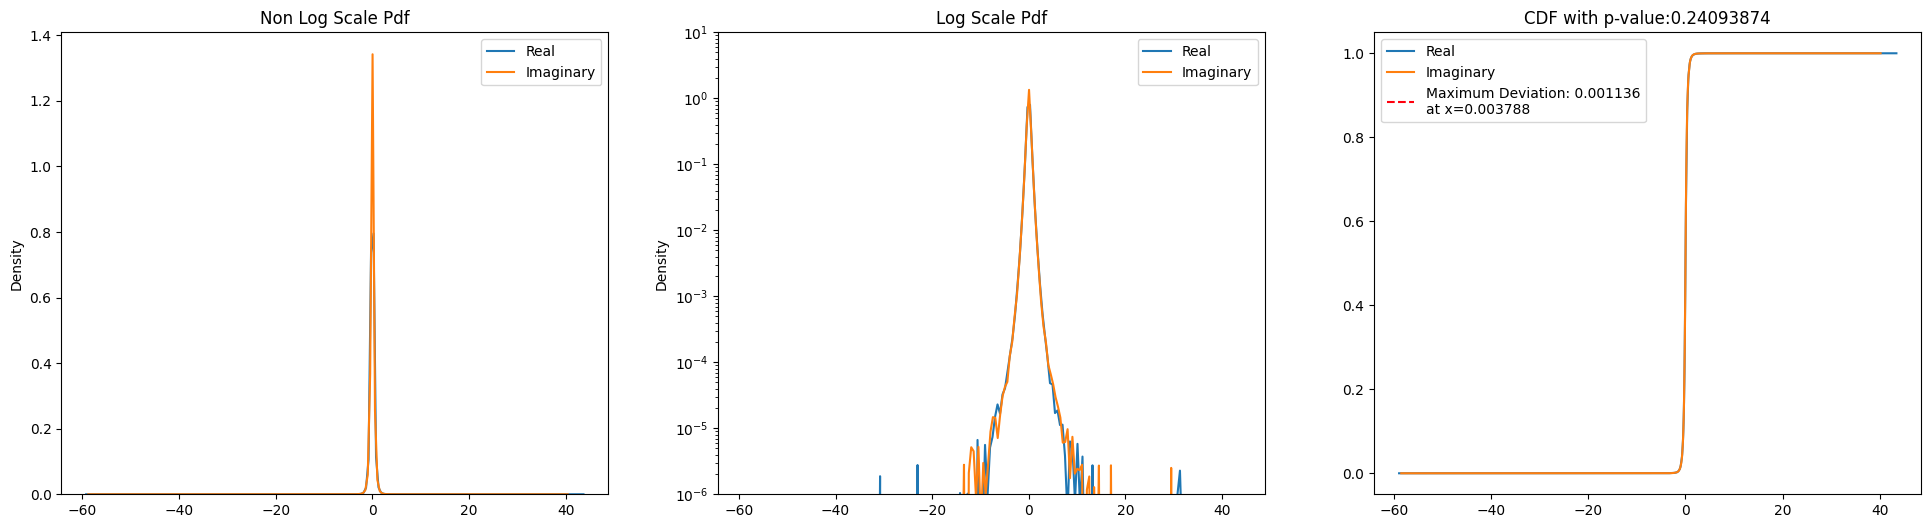

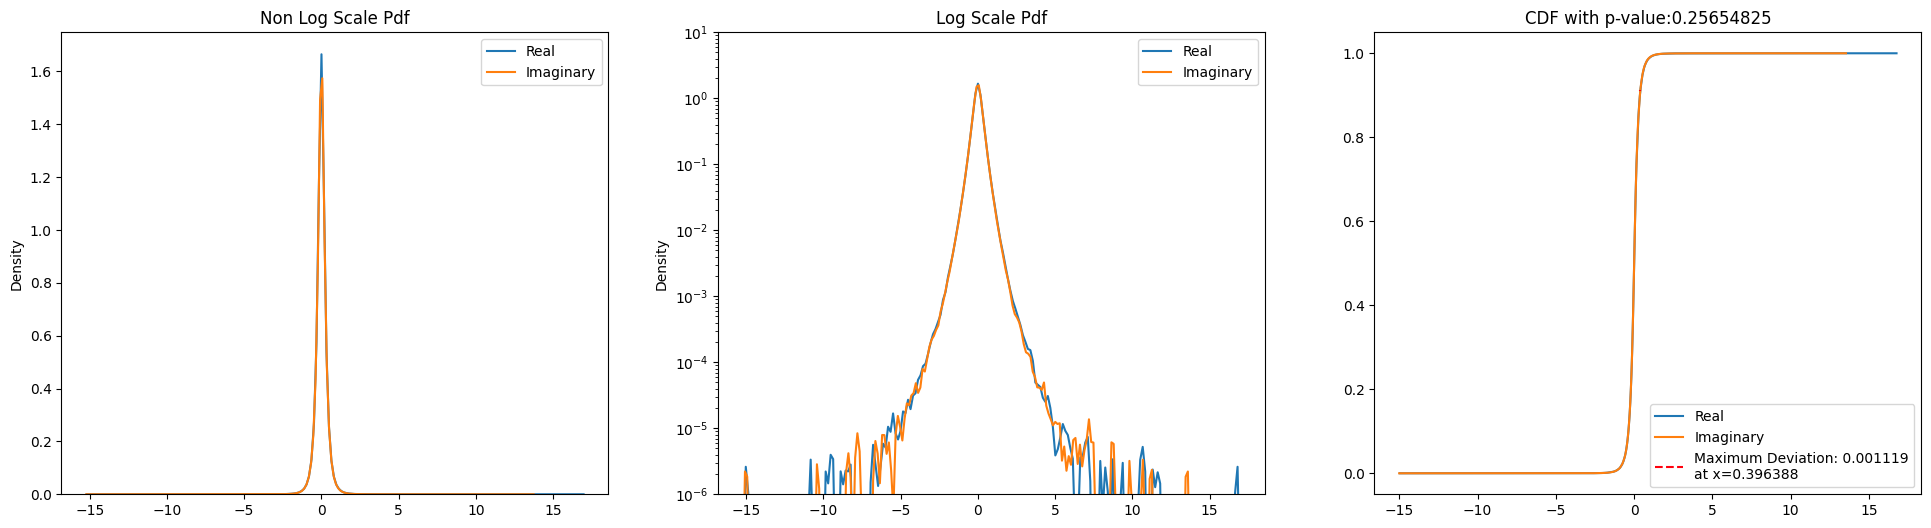

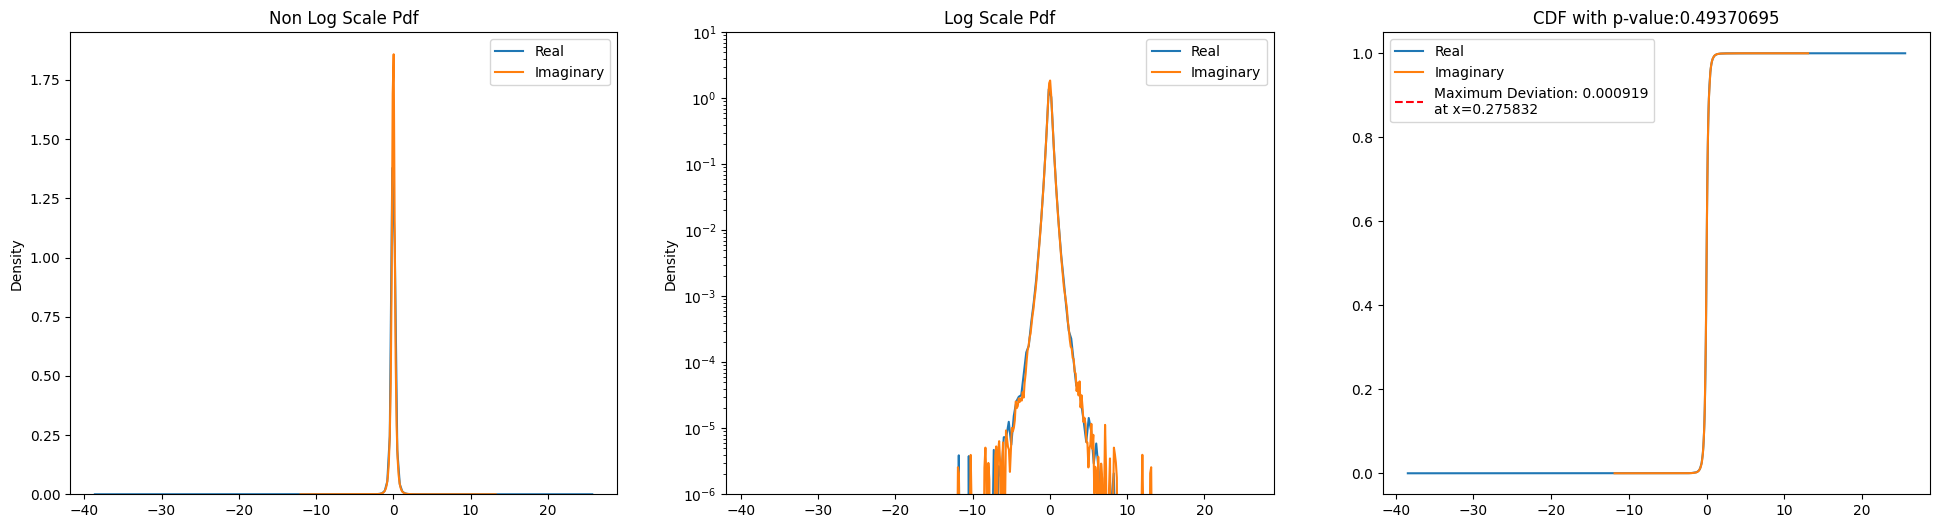

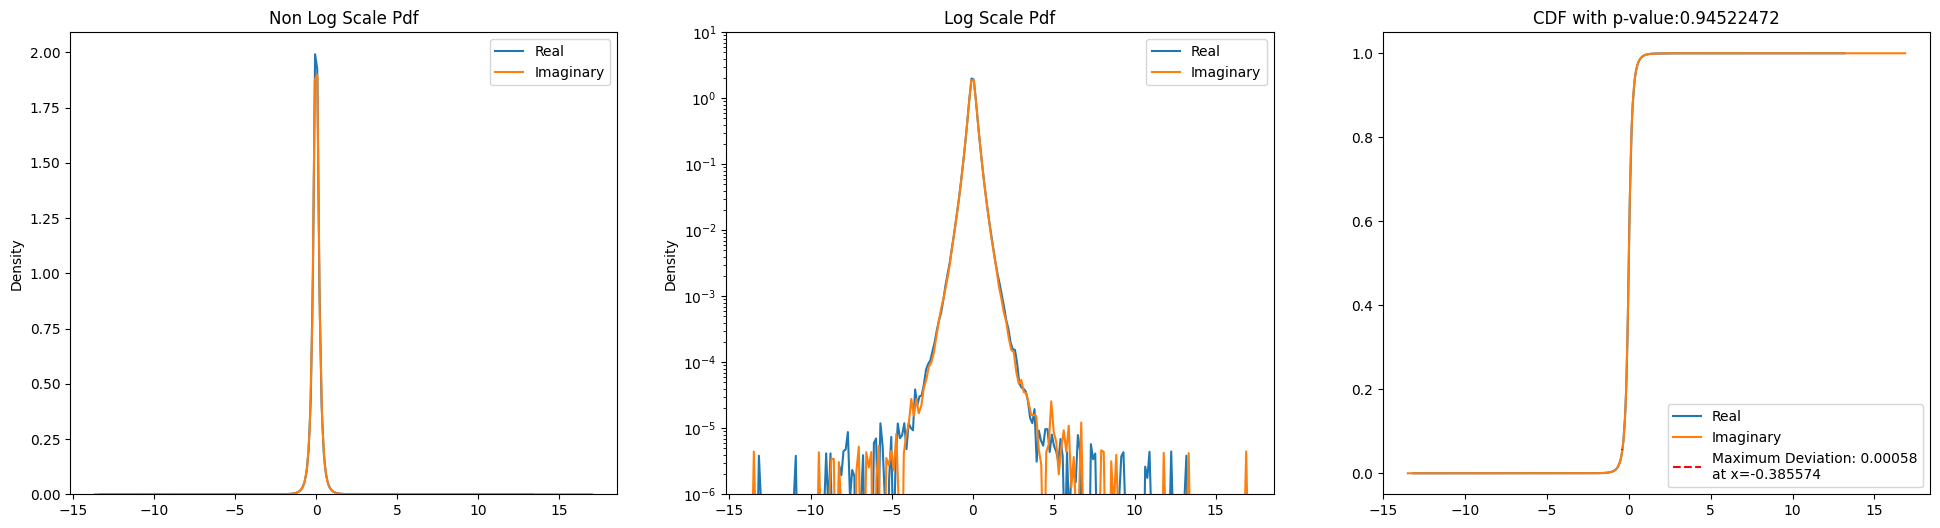

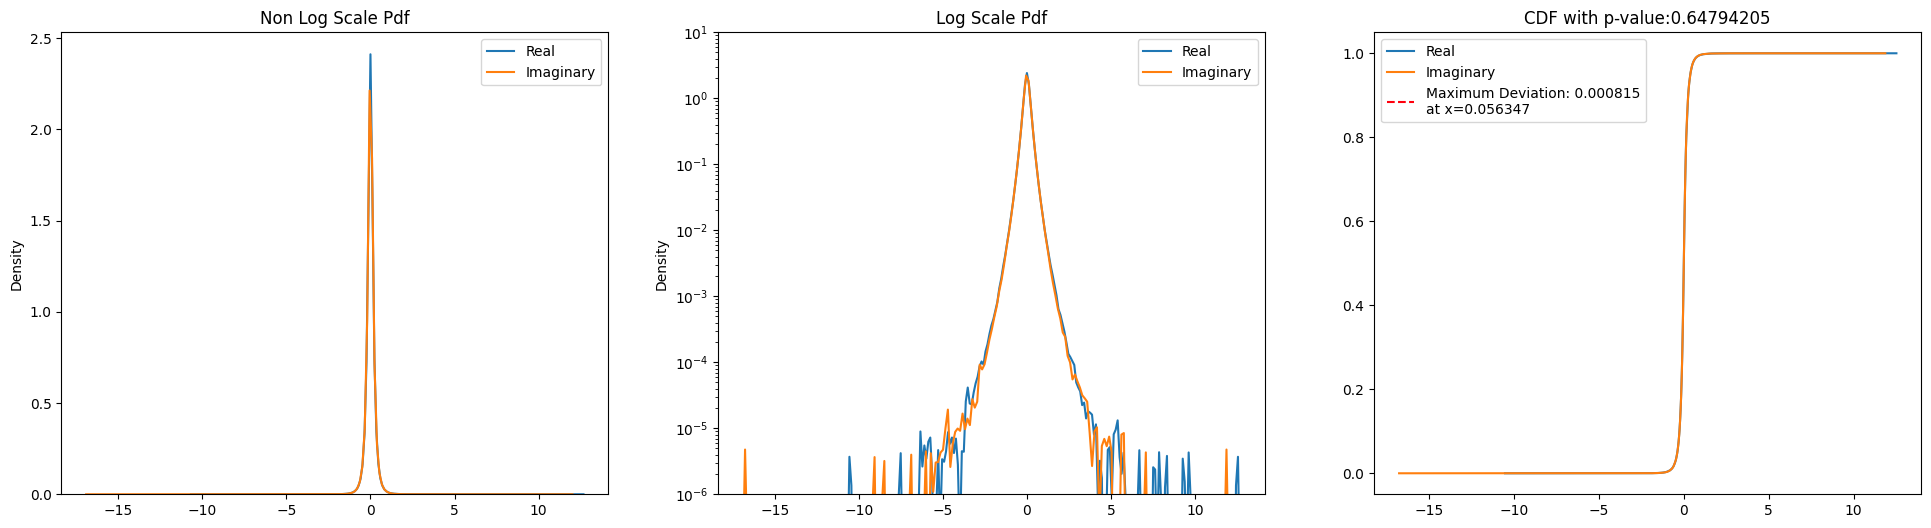

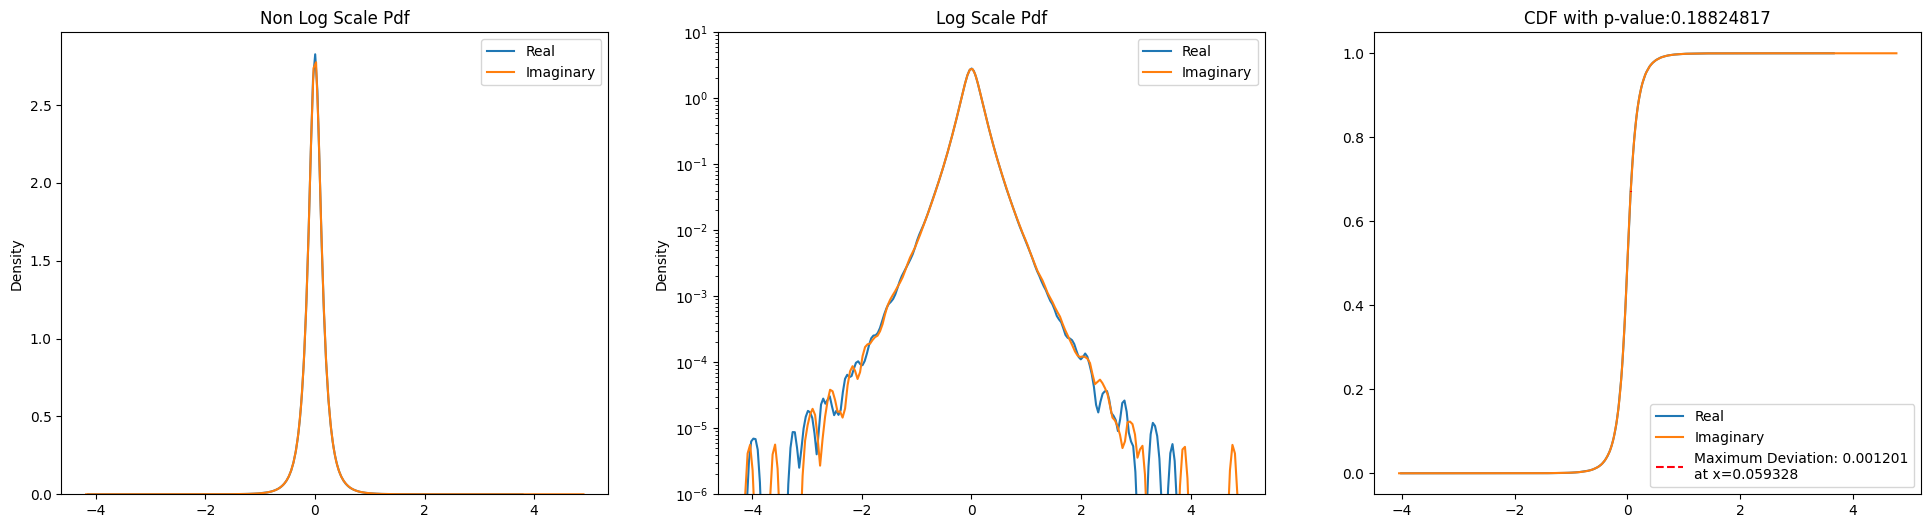

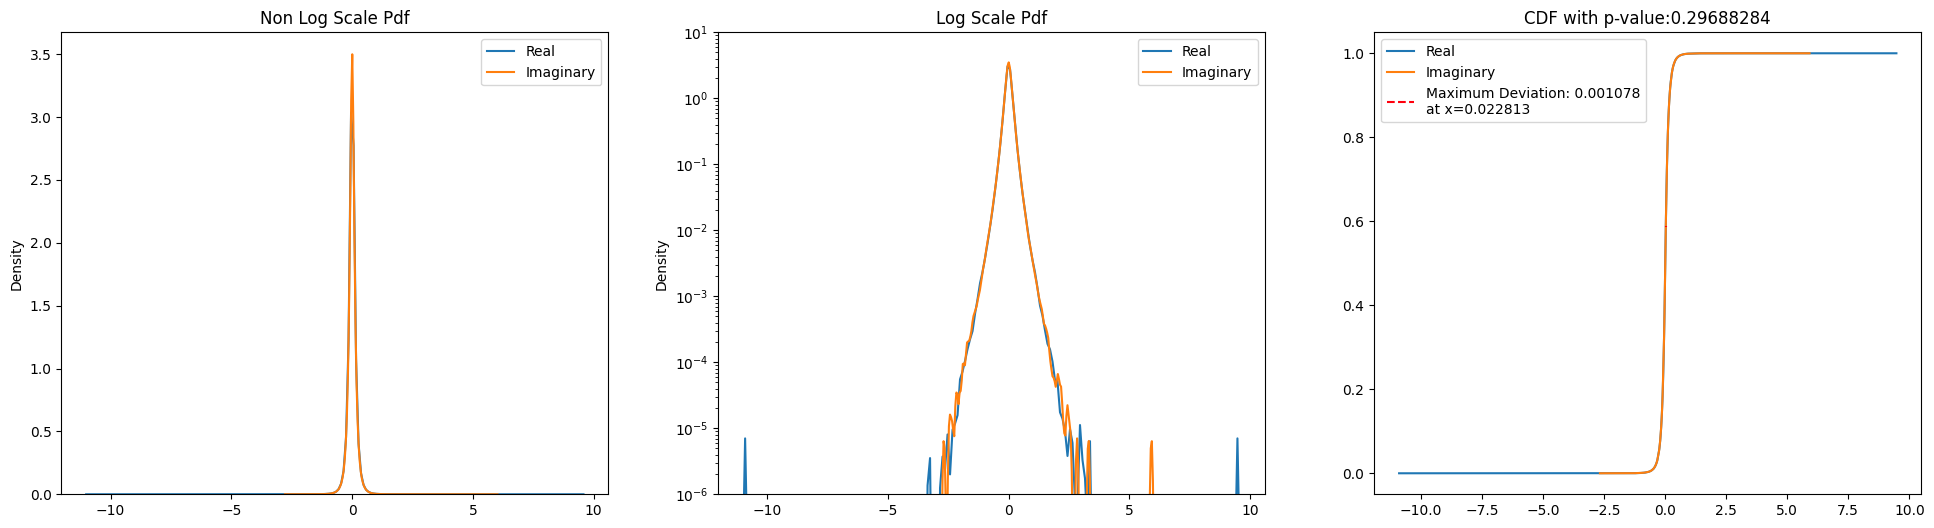

In [32]:
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")

# Red

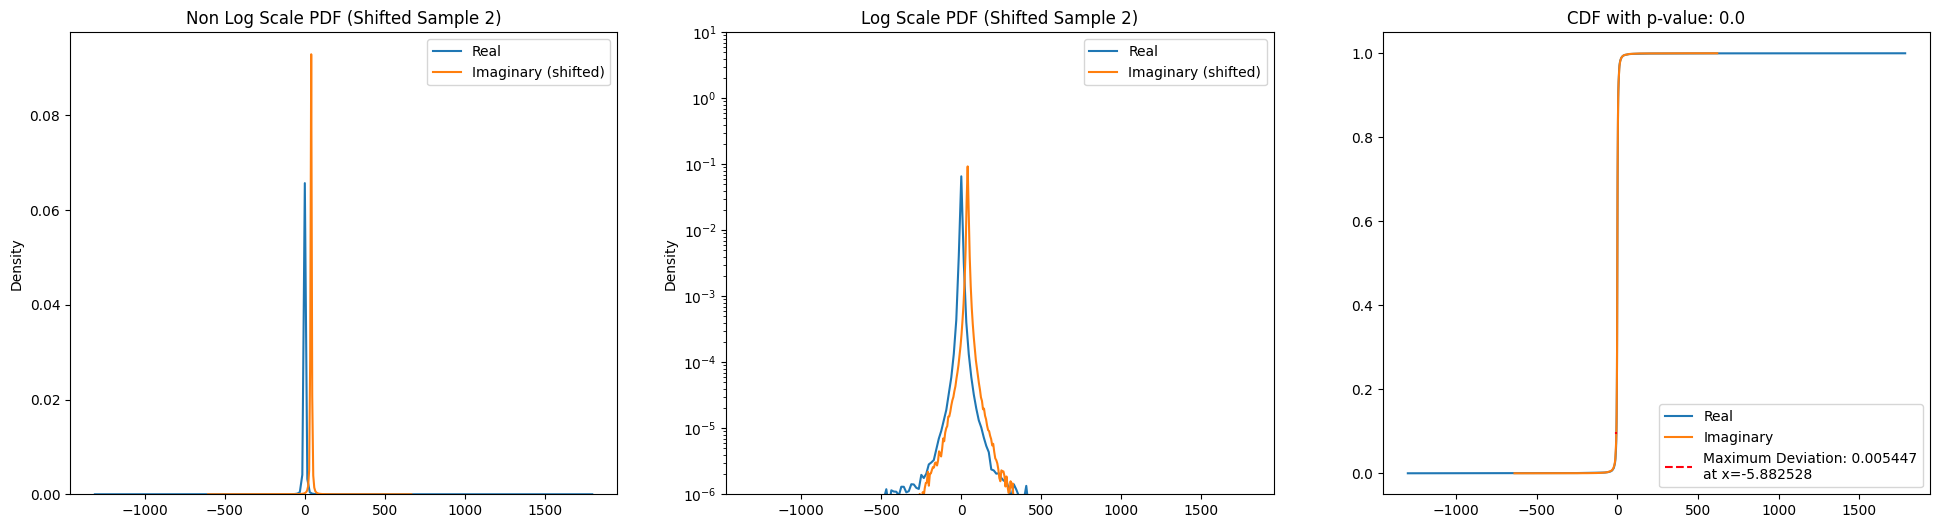

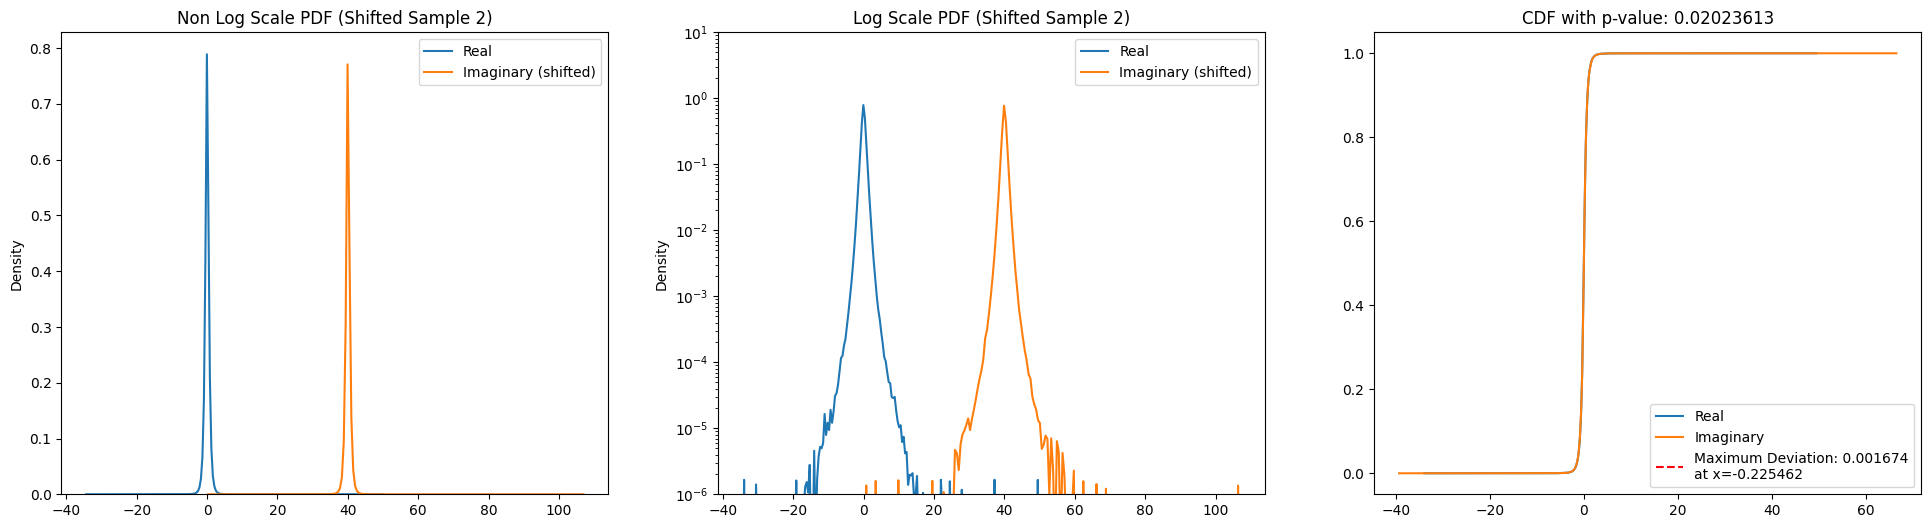

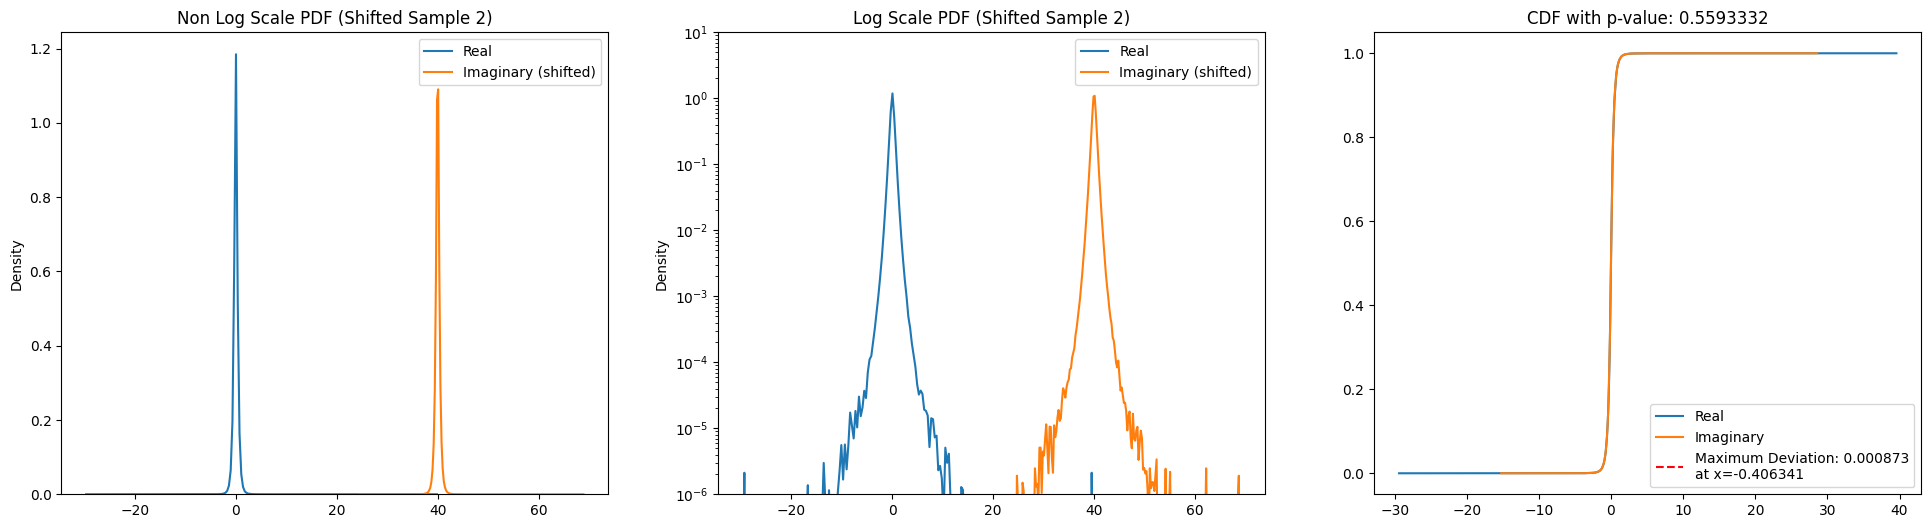

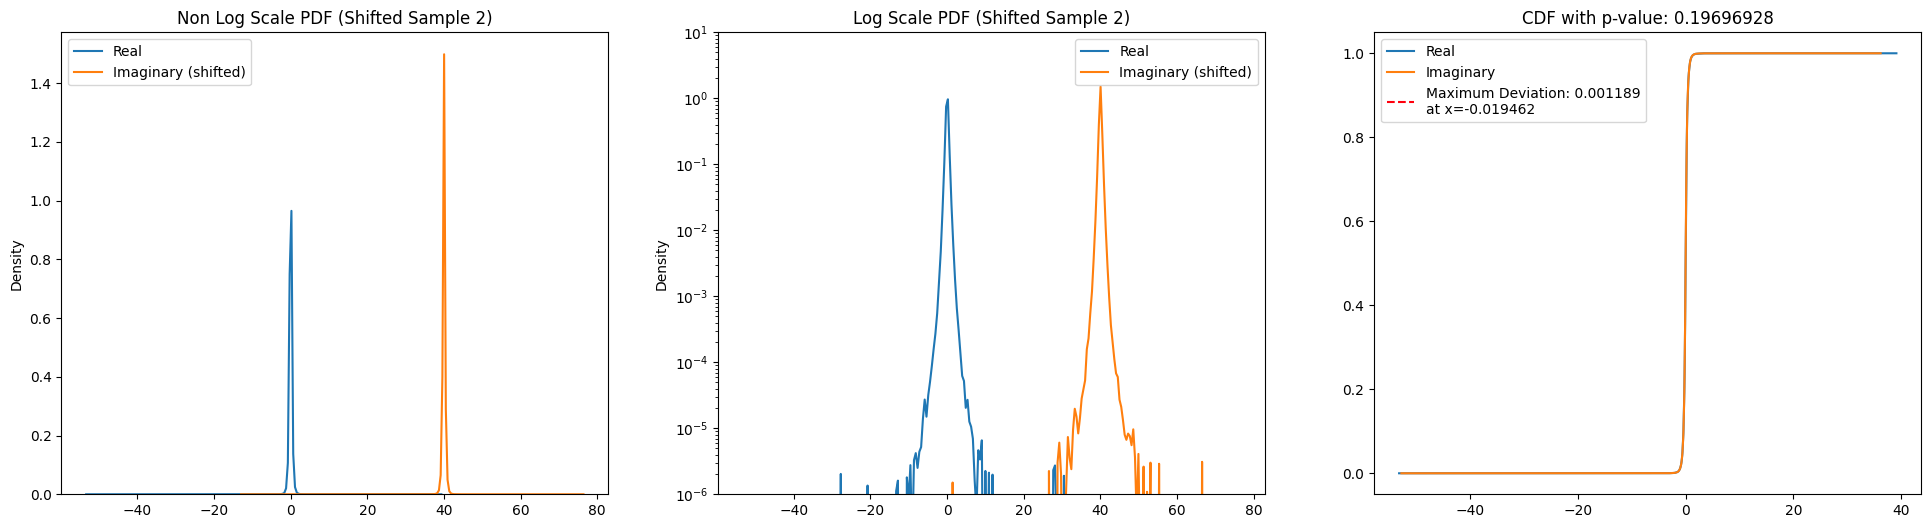

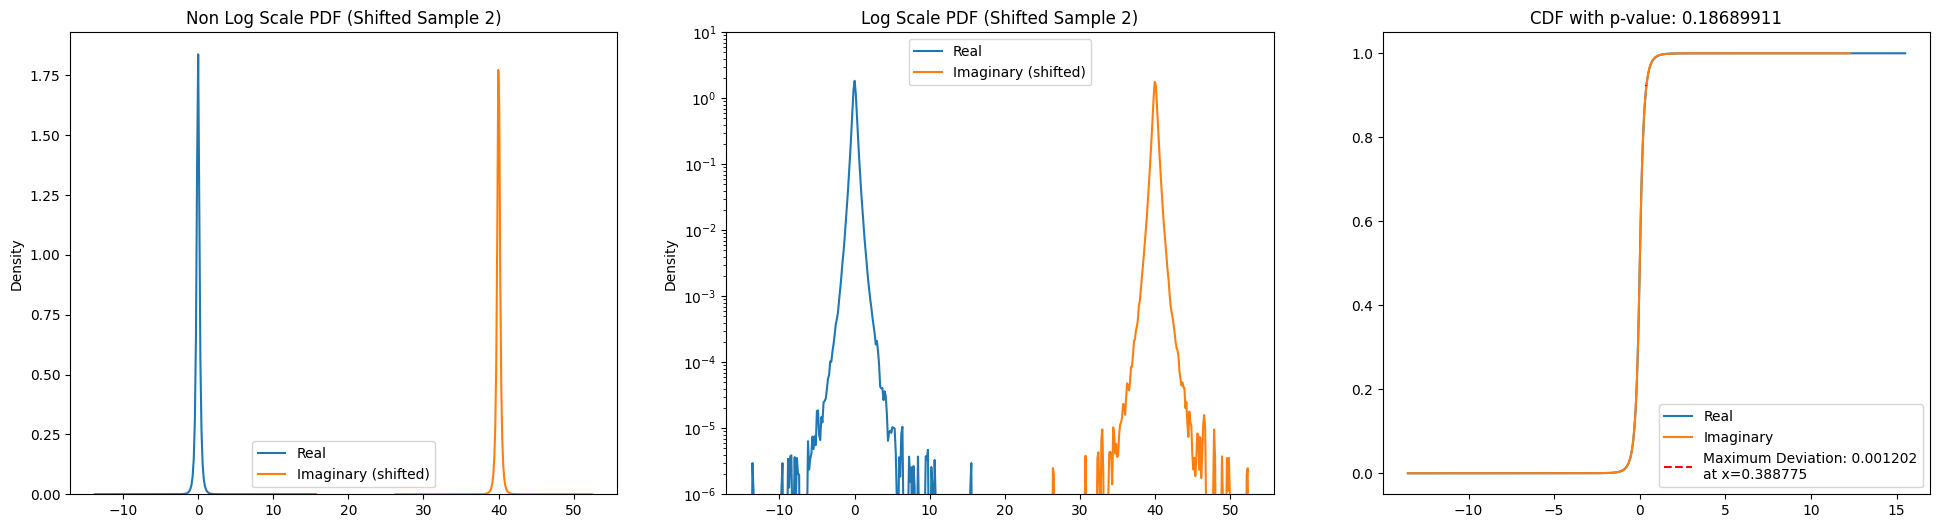

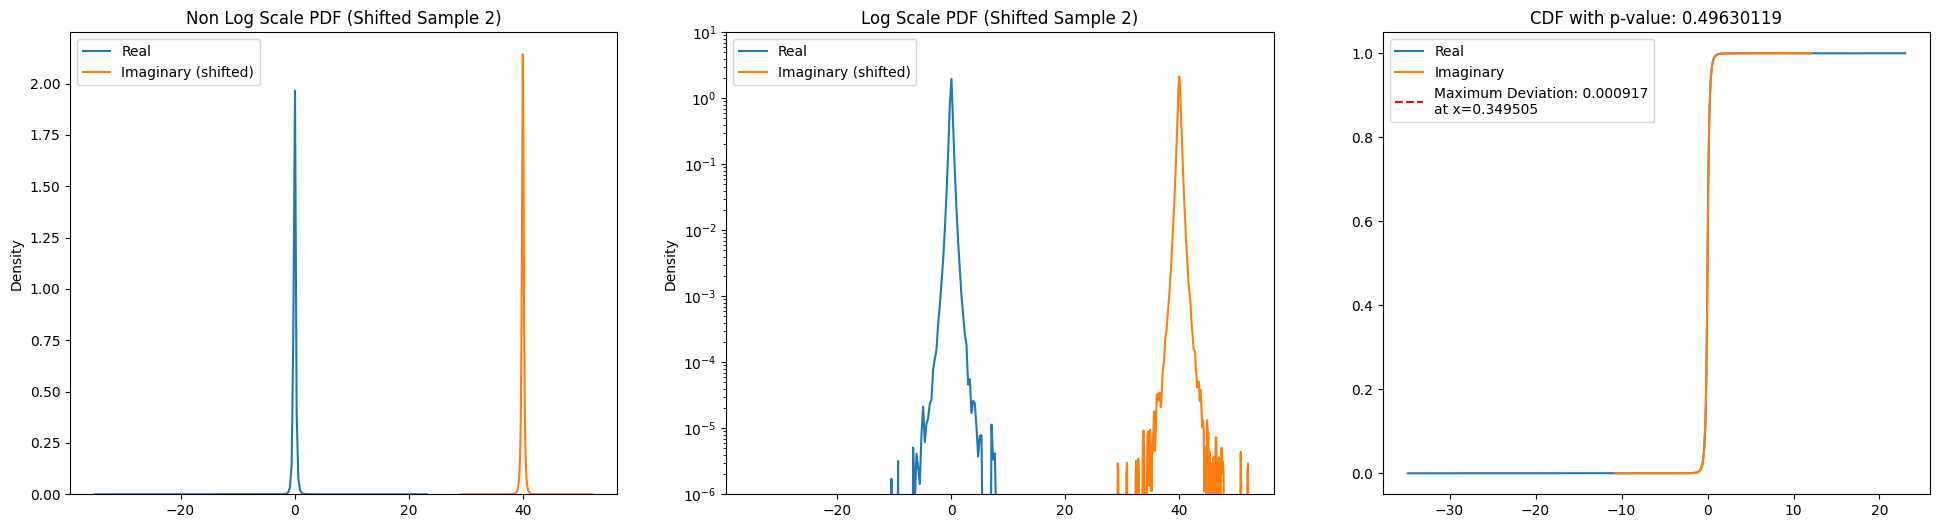

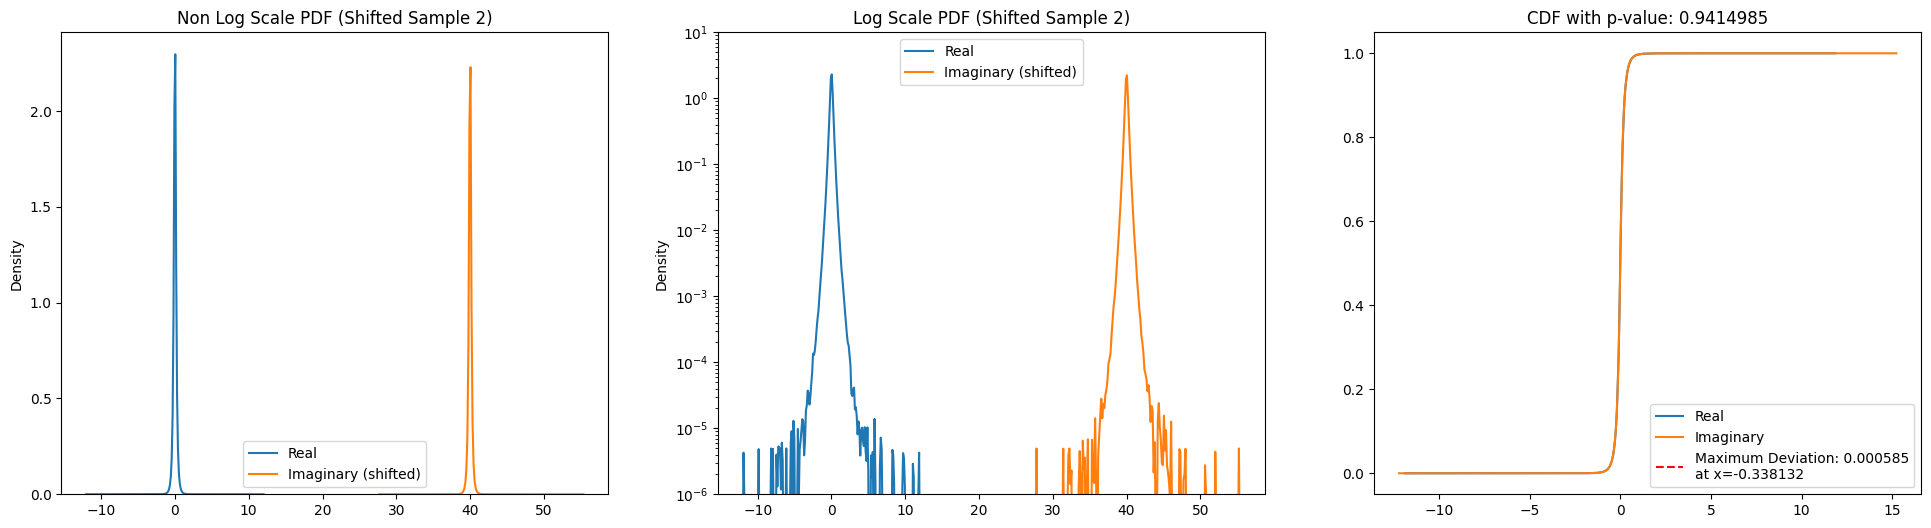

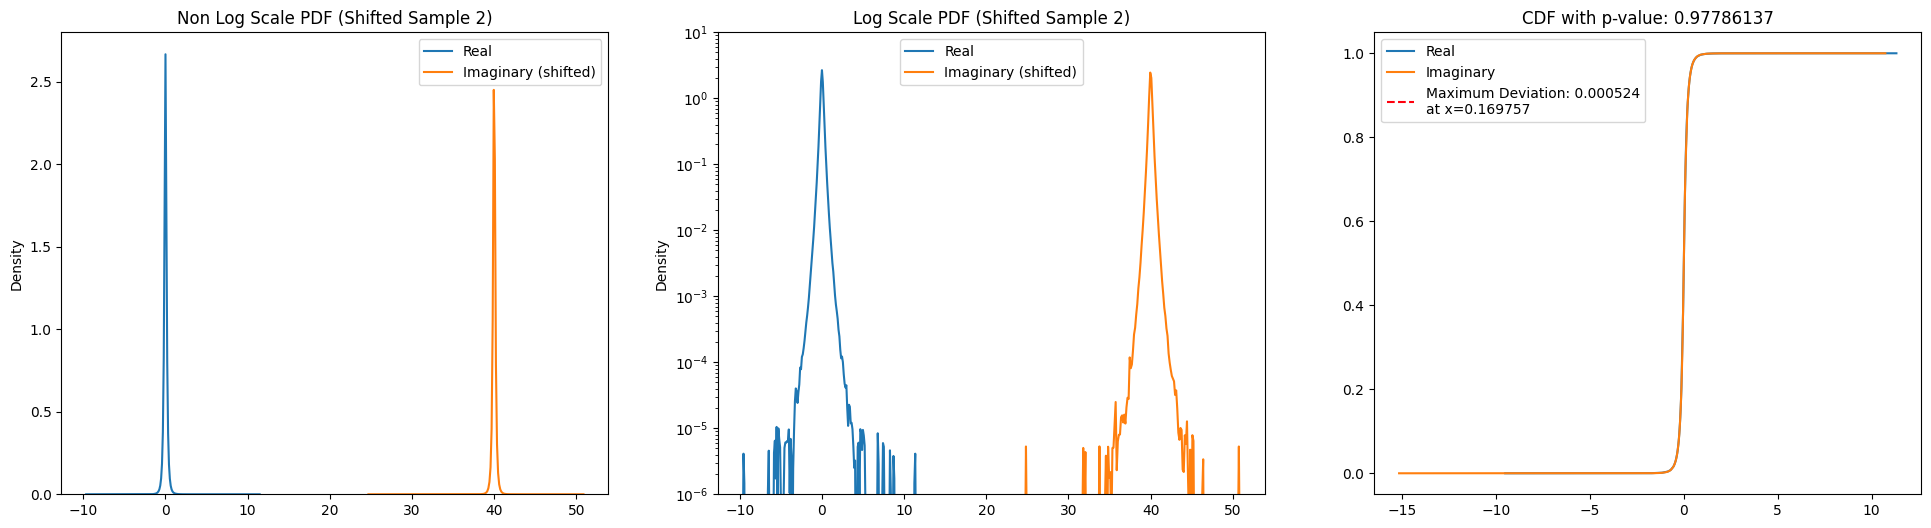

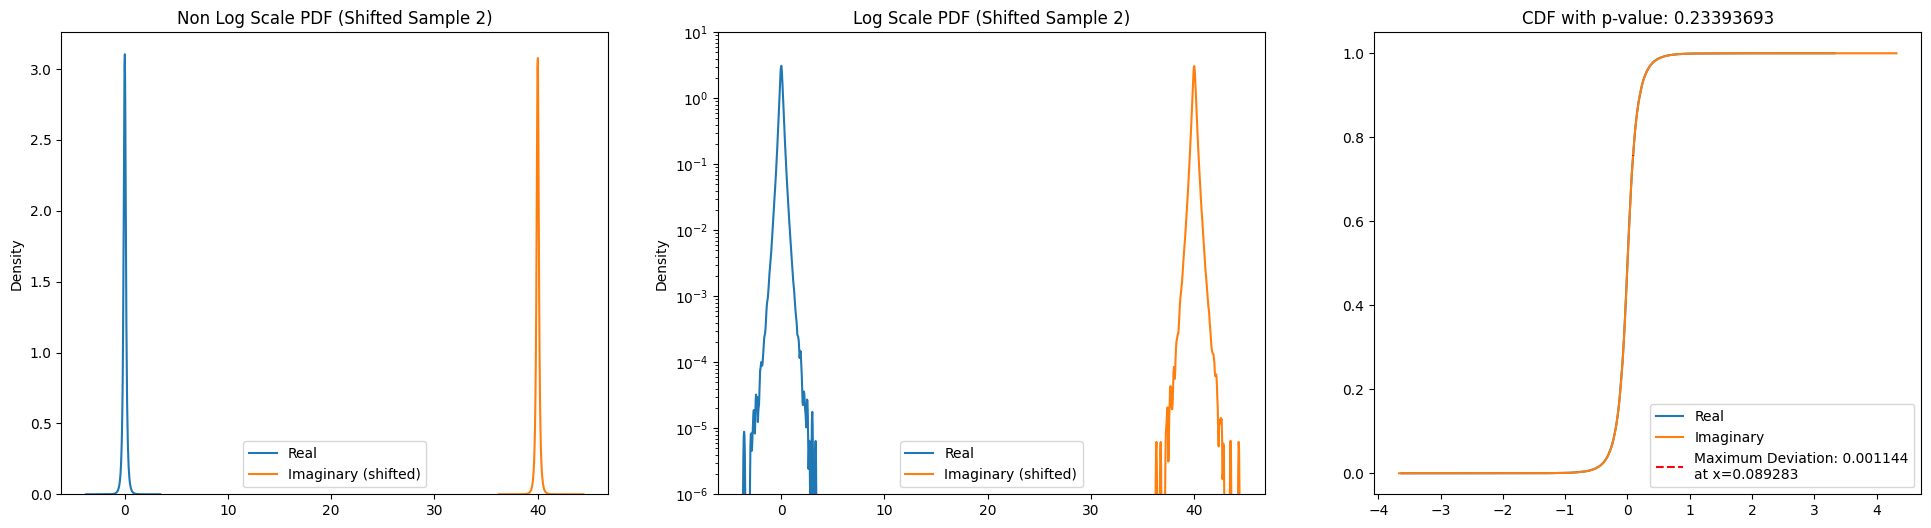

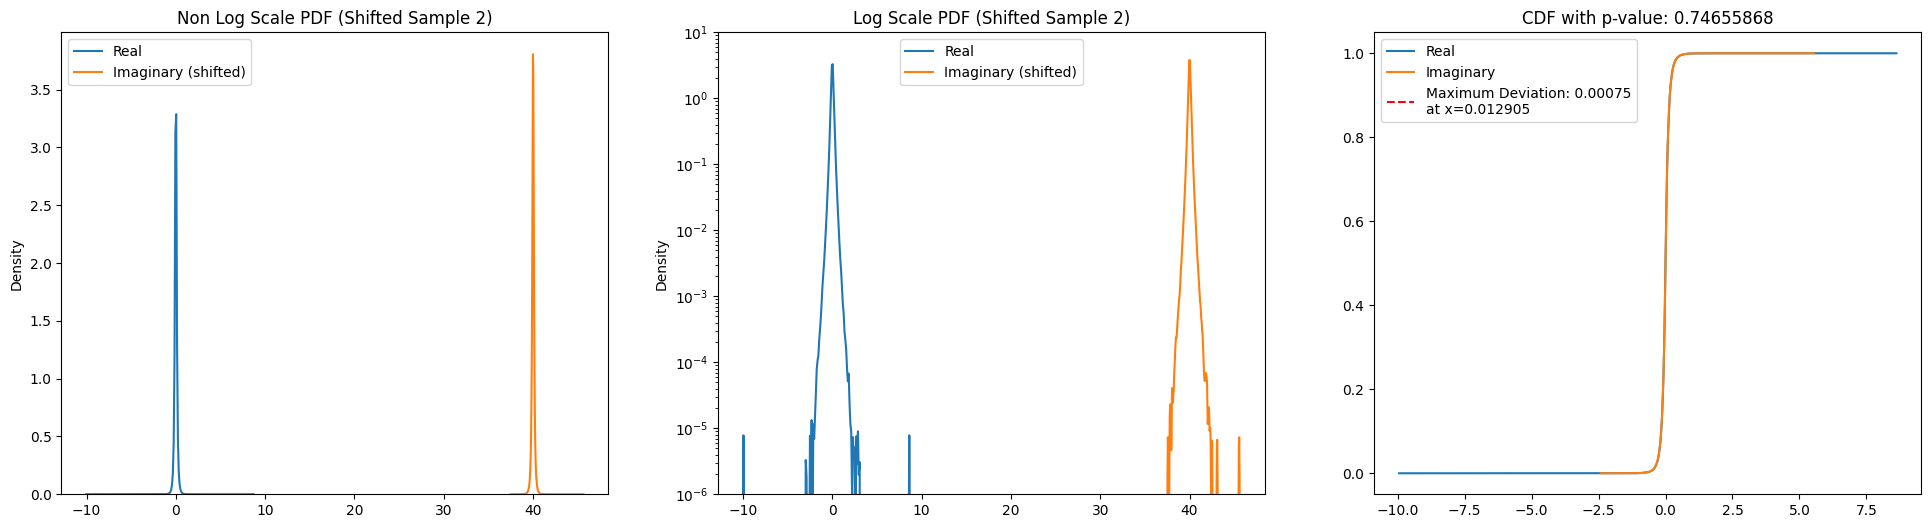

In [23]:
coeffs, mags = convert_fourier_list(data_dir, c = 0, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlotsShift(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Green

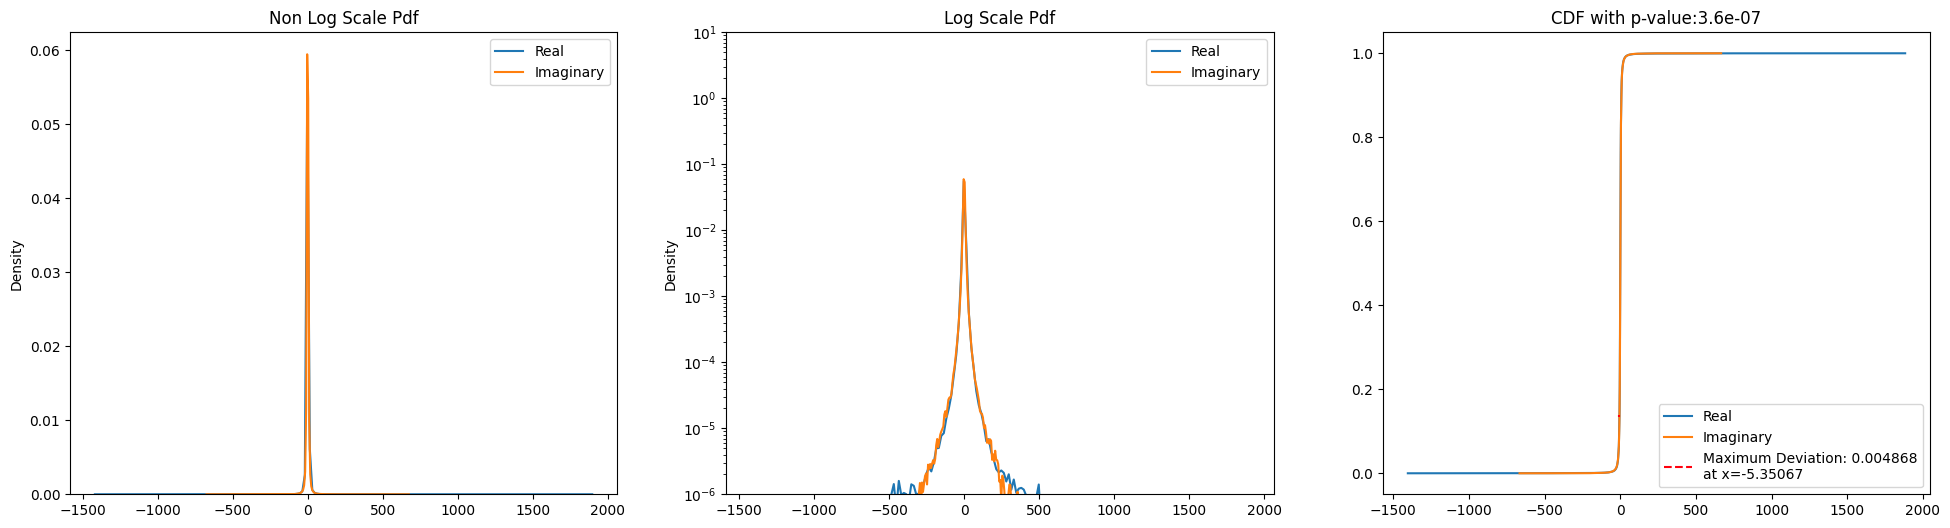

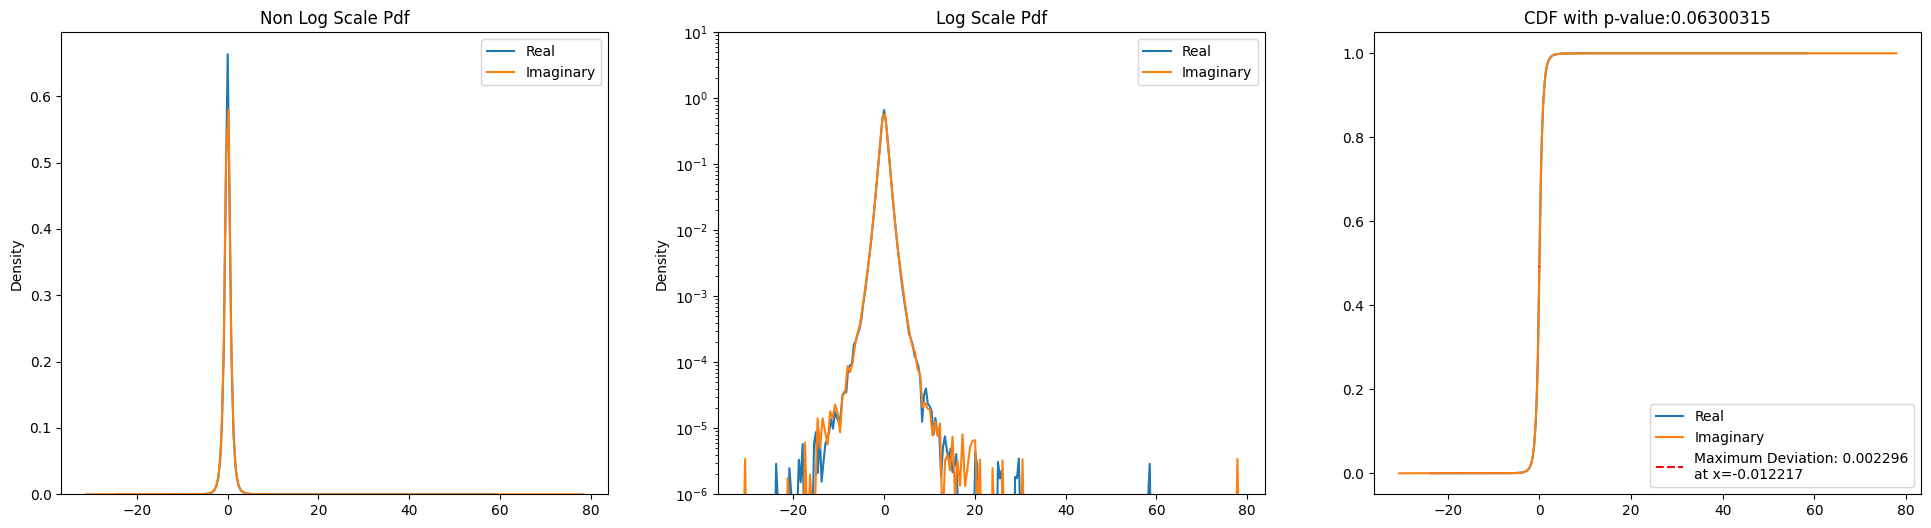

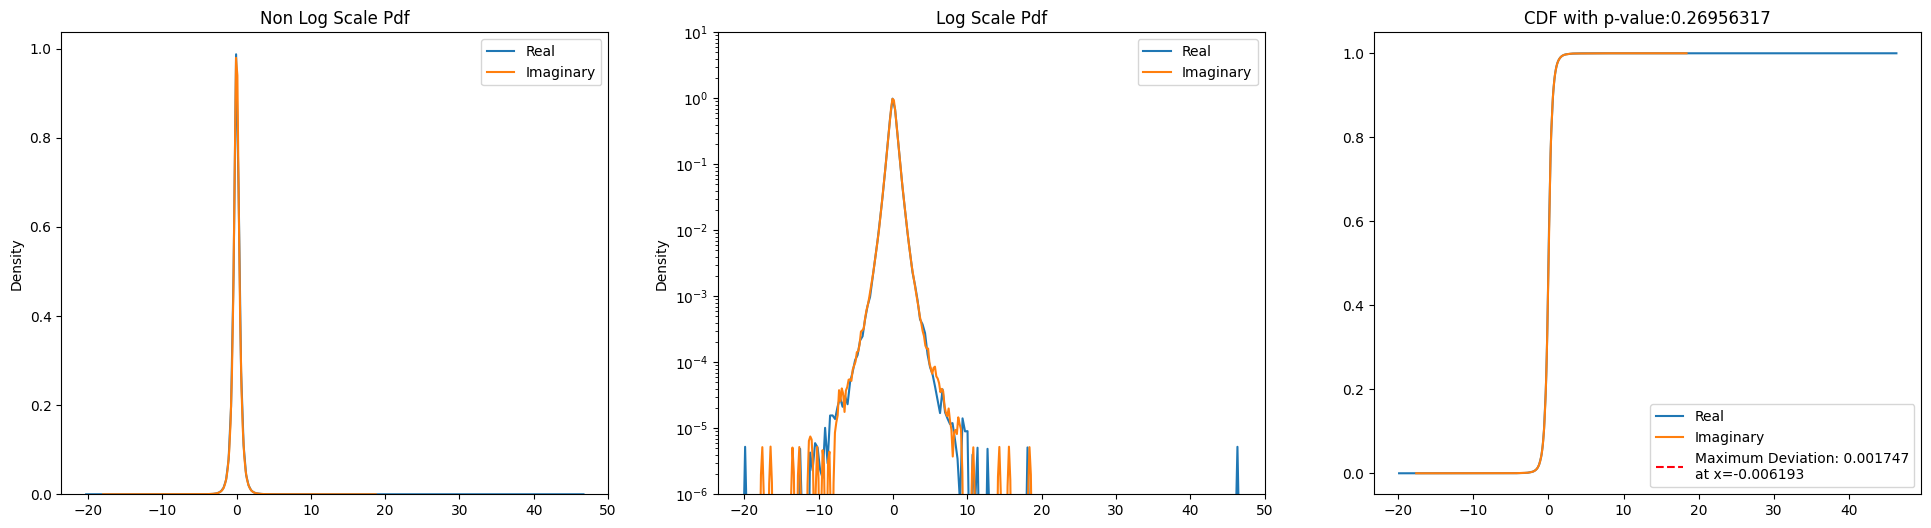

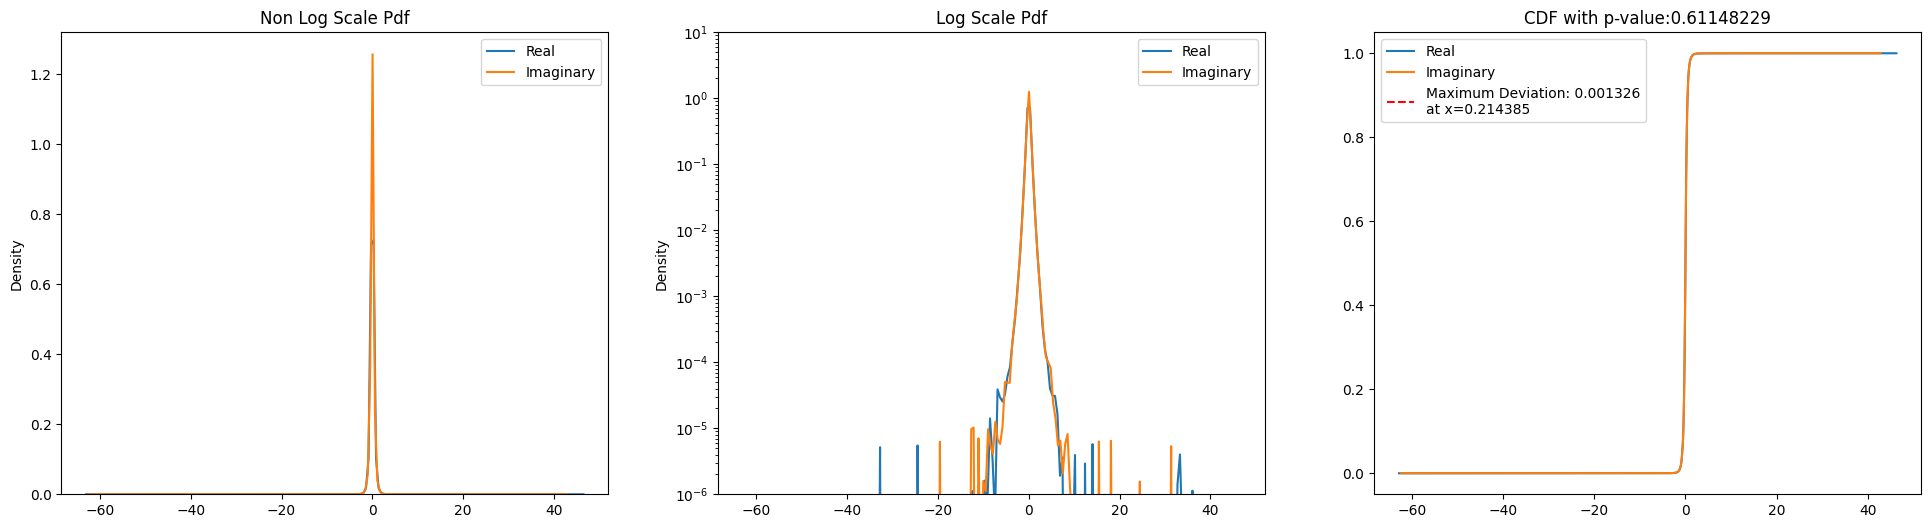

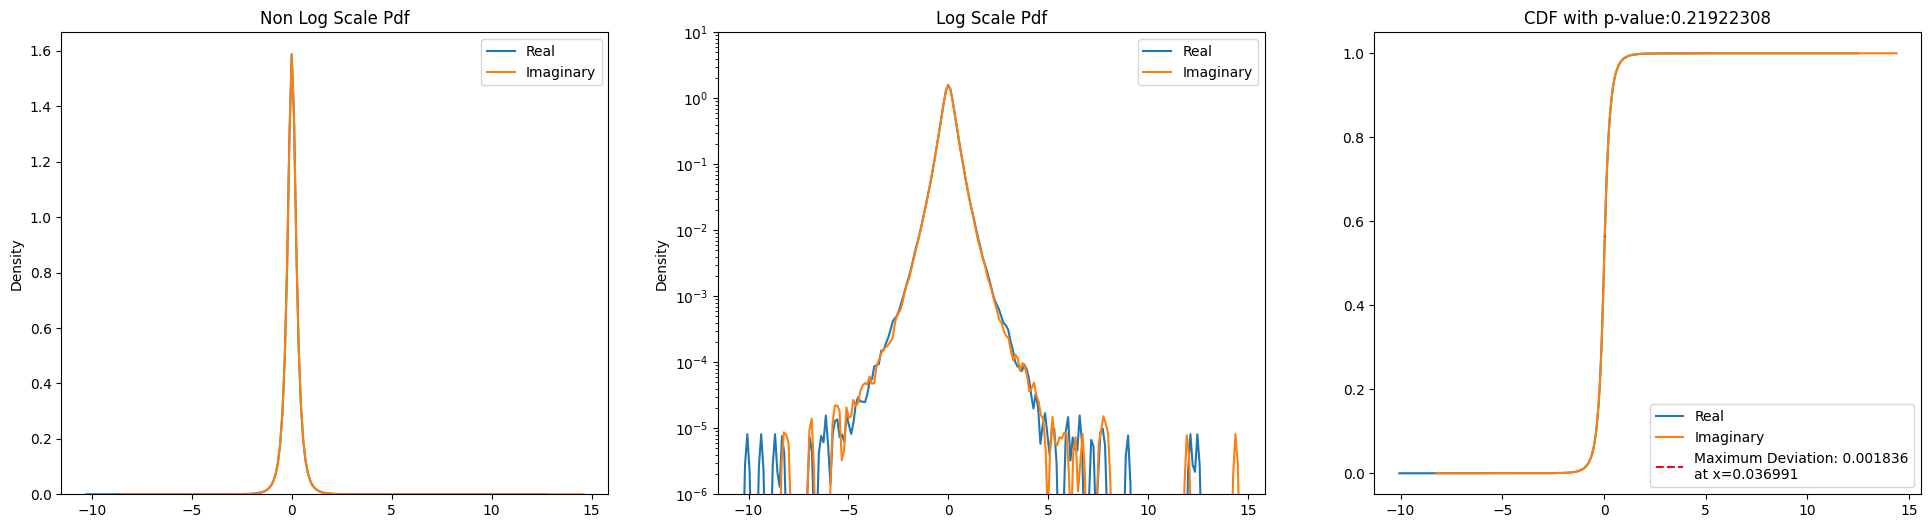

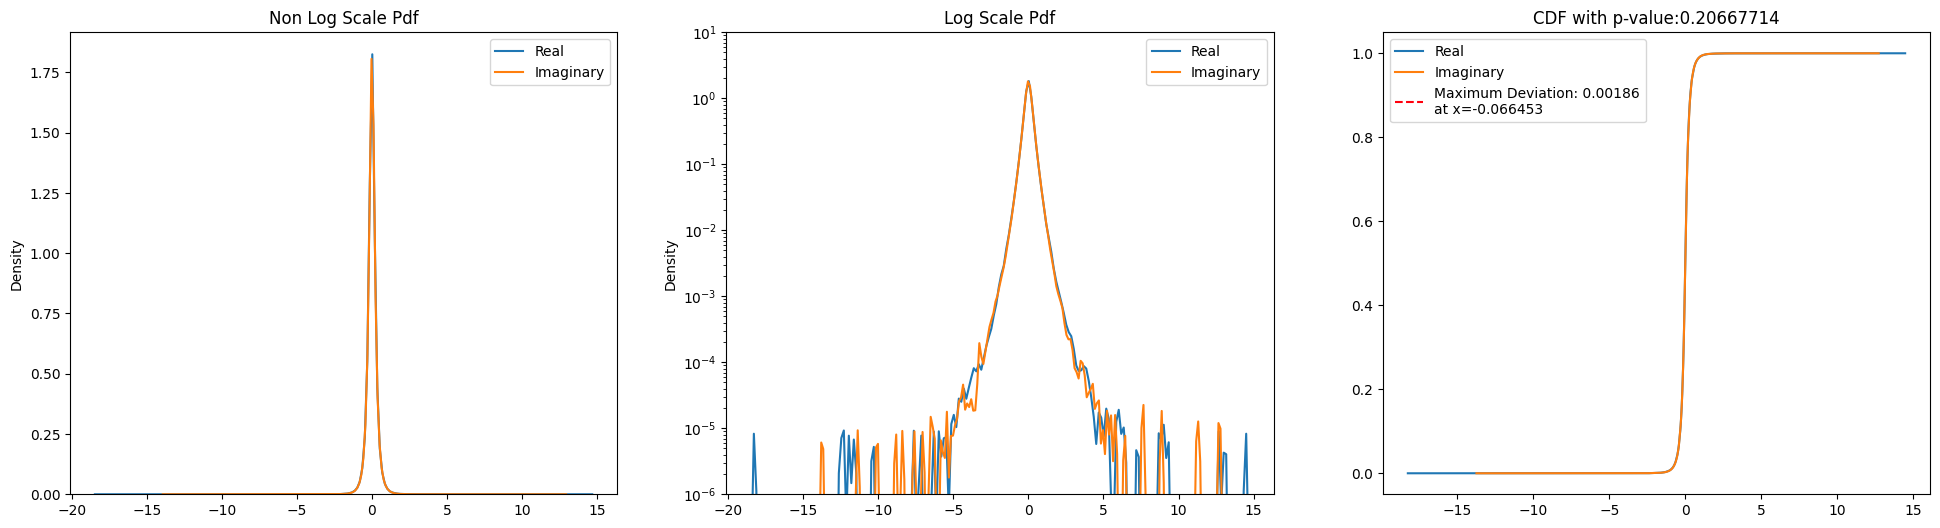

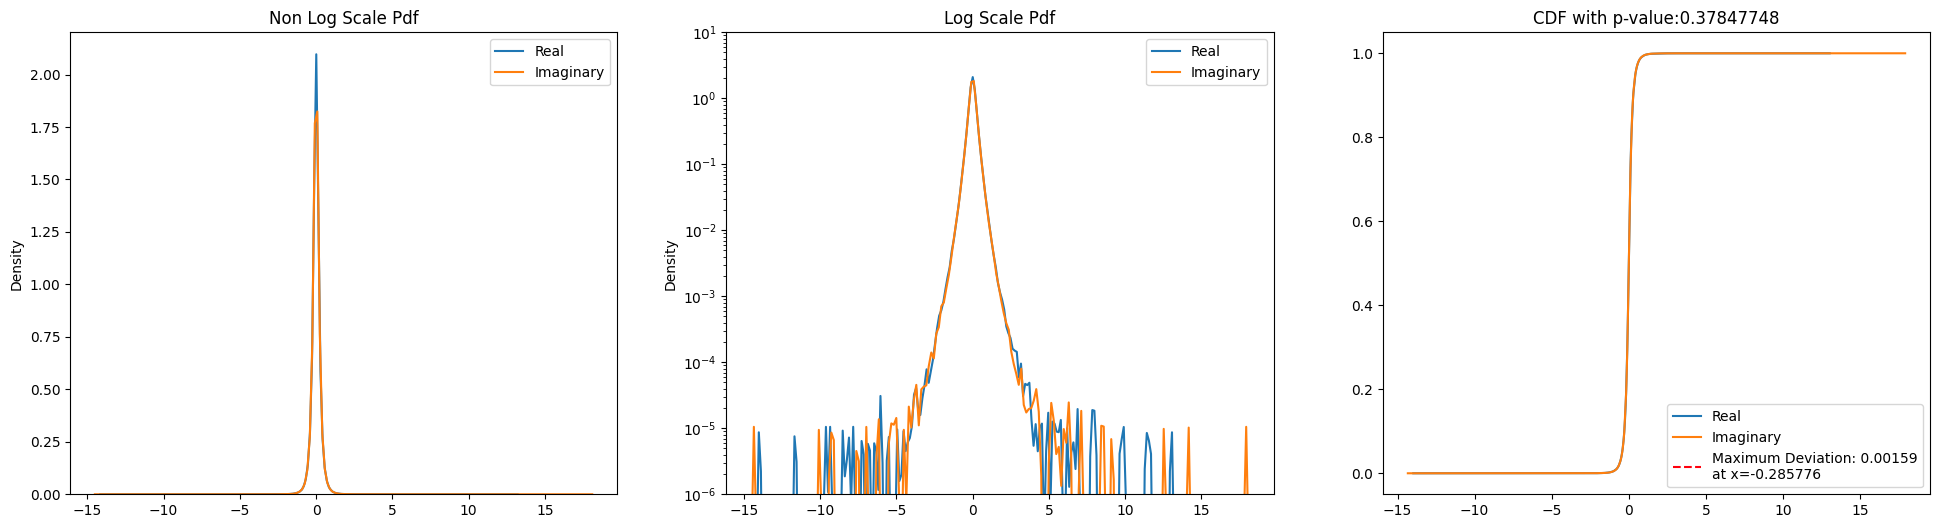

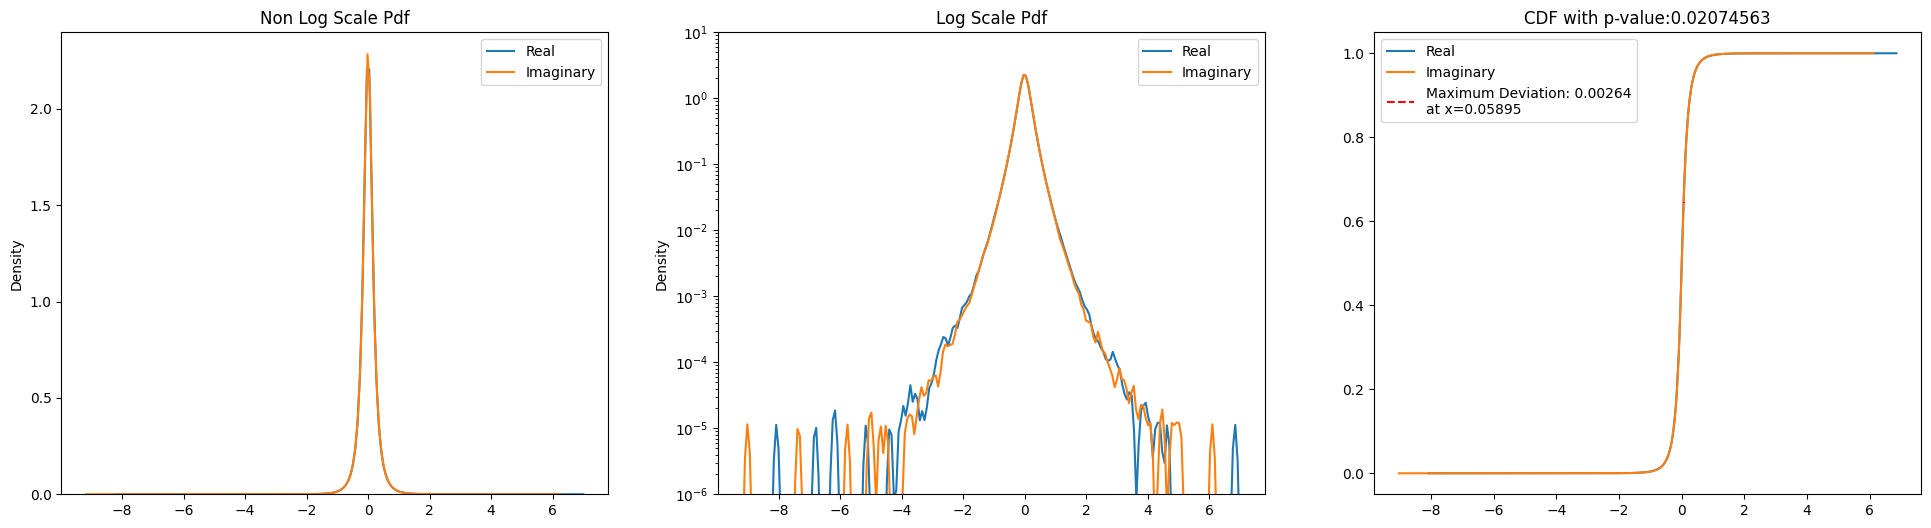

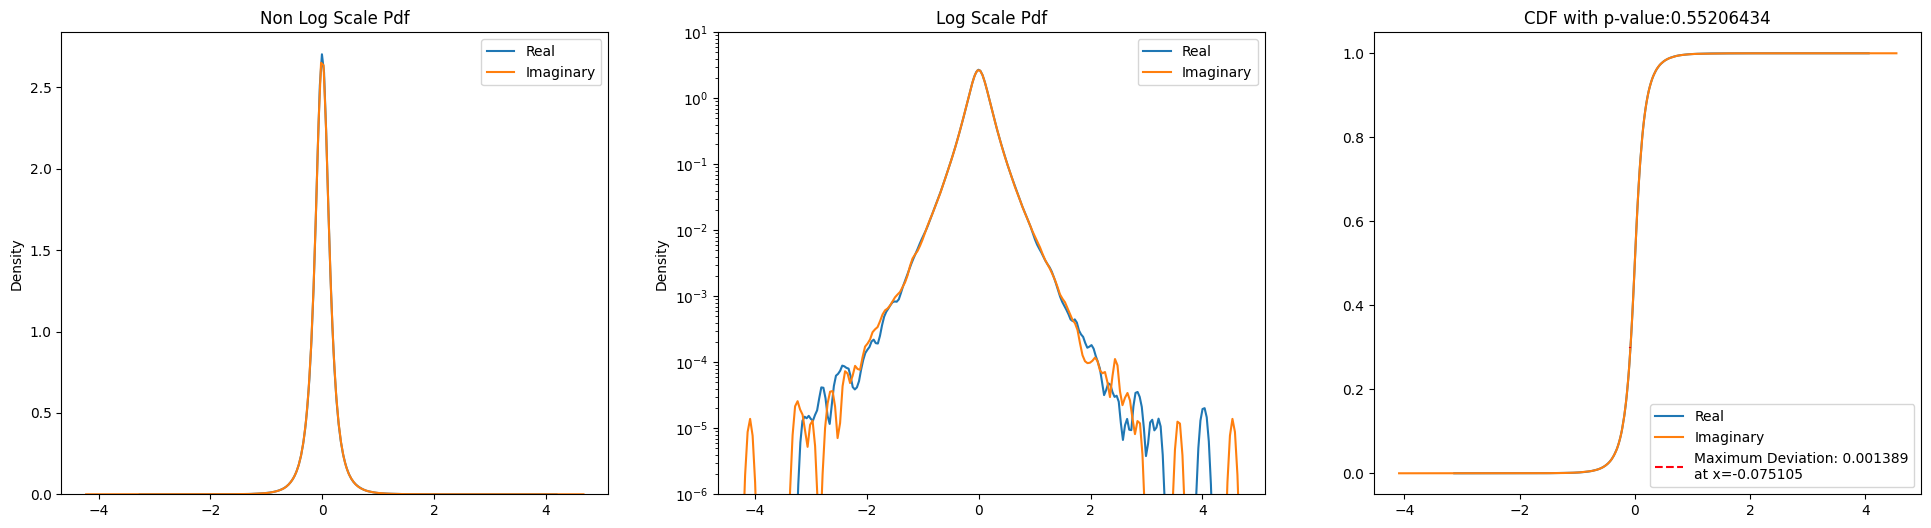

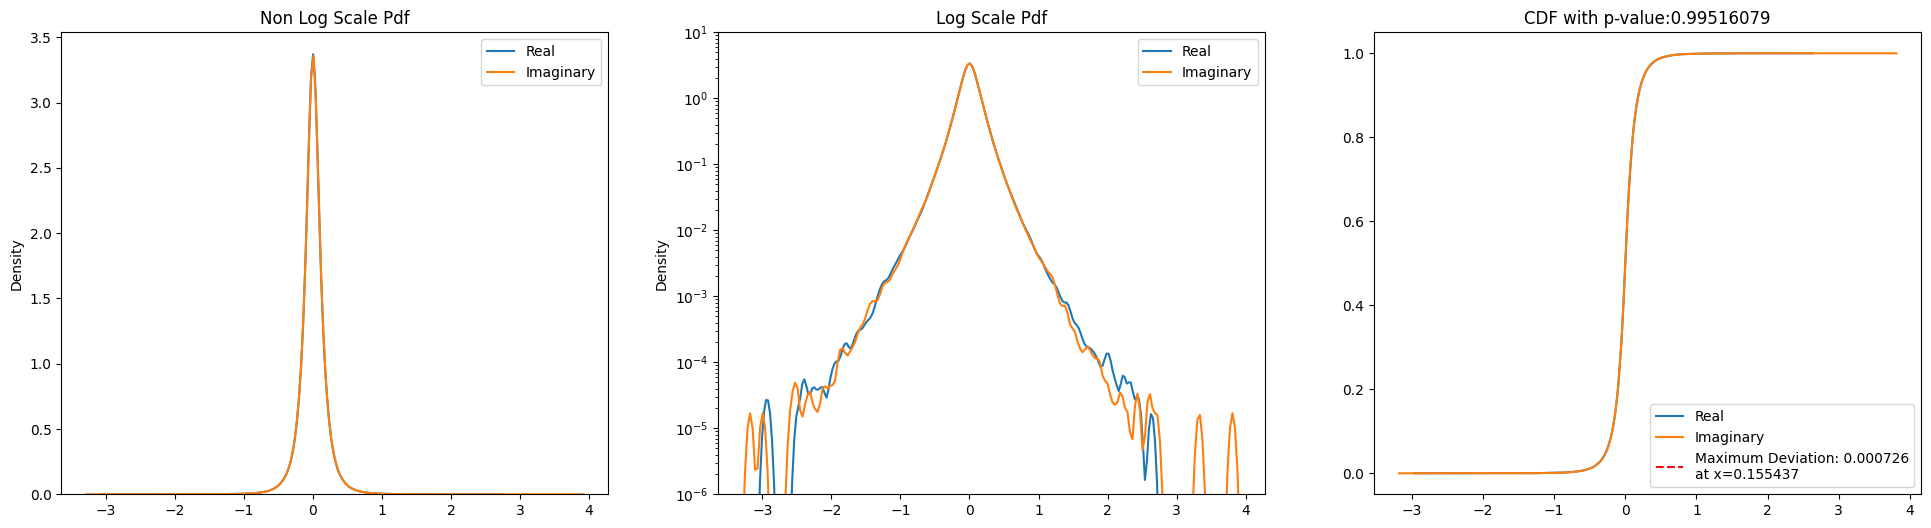

In [31]:
coeffs, mags = convert_fourier_list(data_dir, c = 1, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Blue

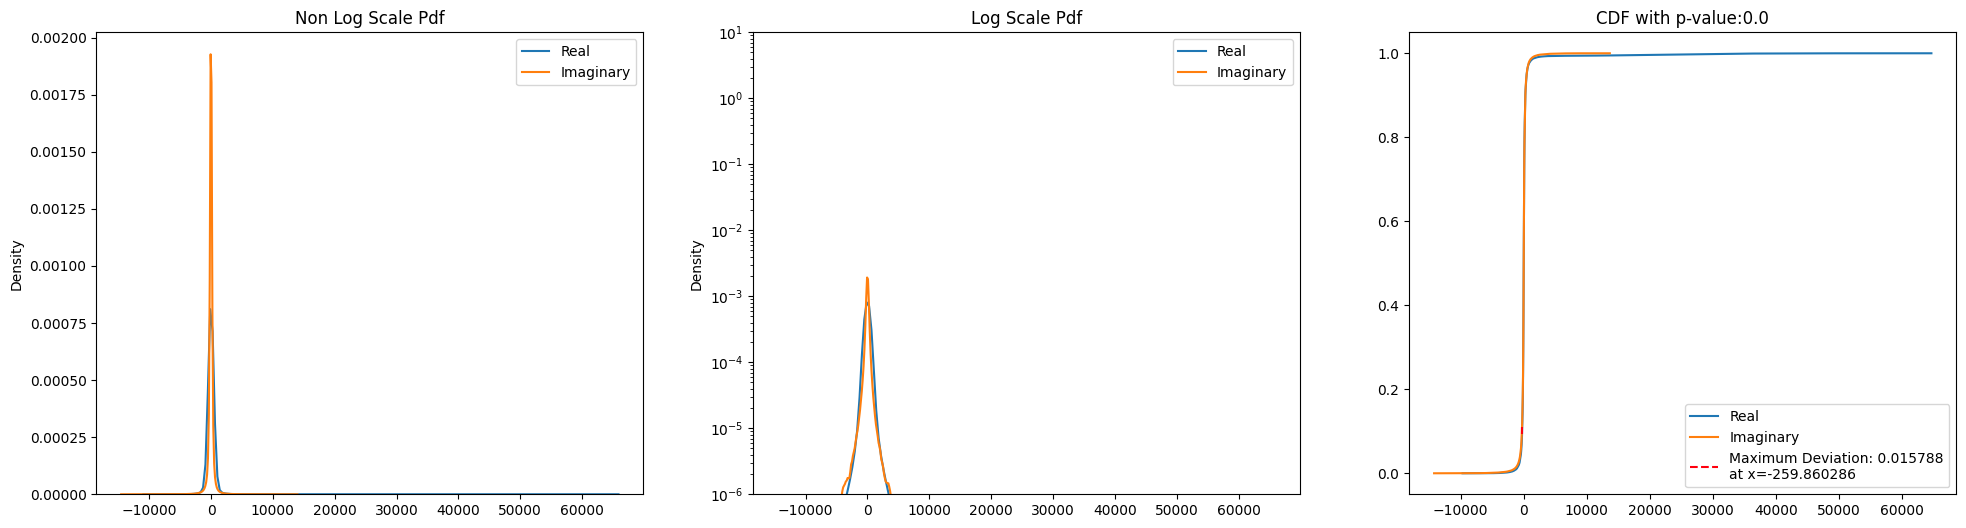

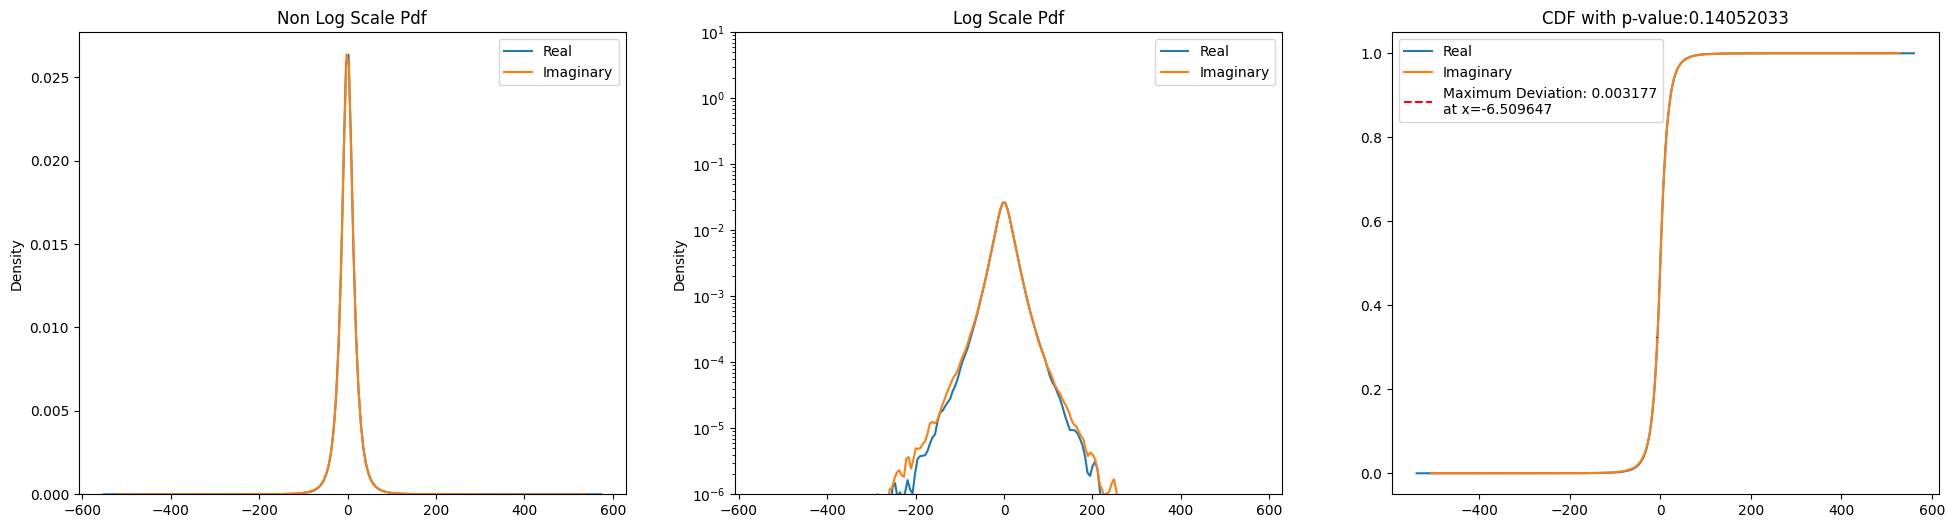

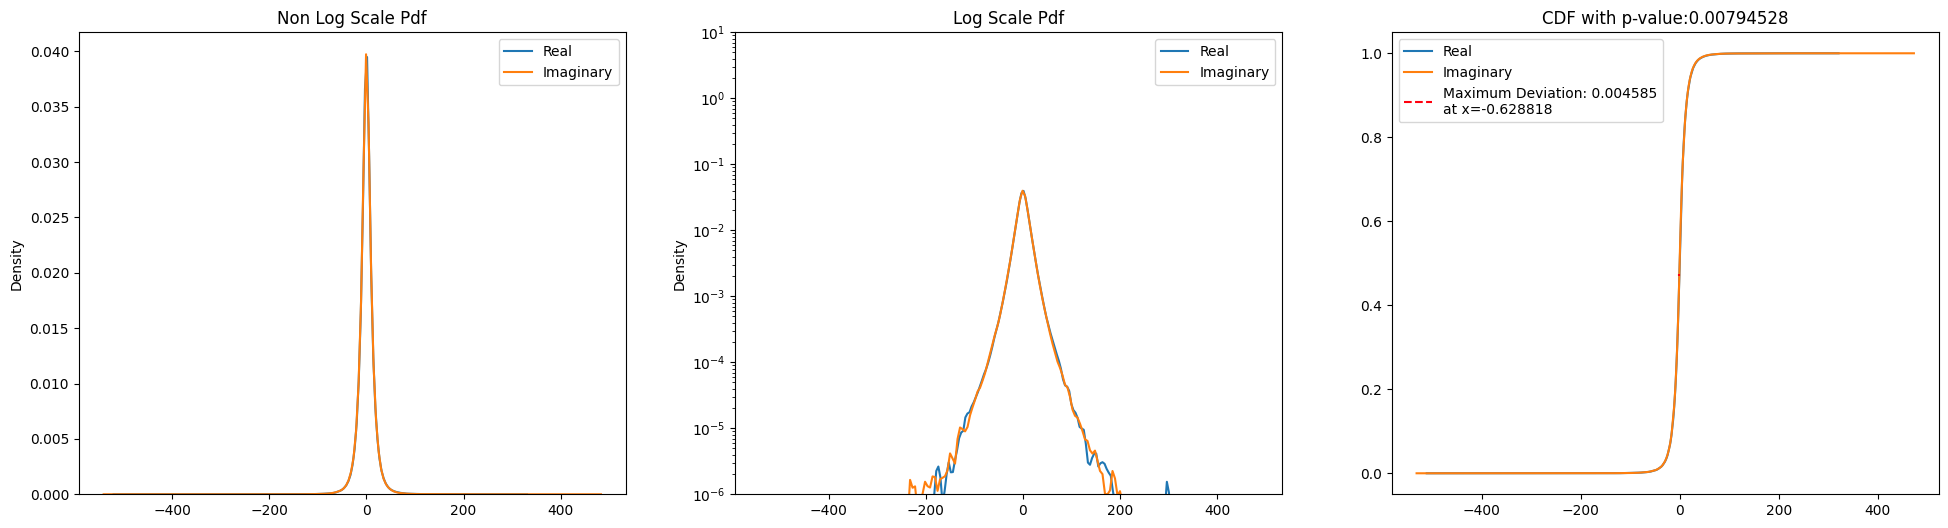

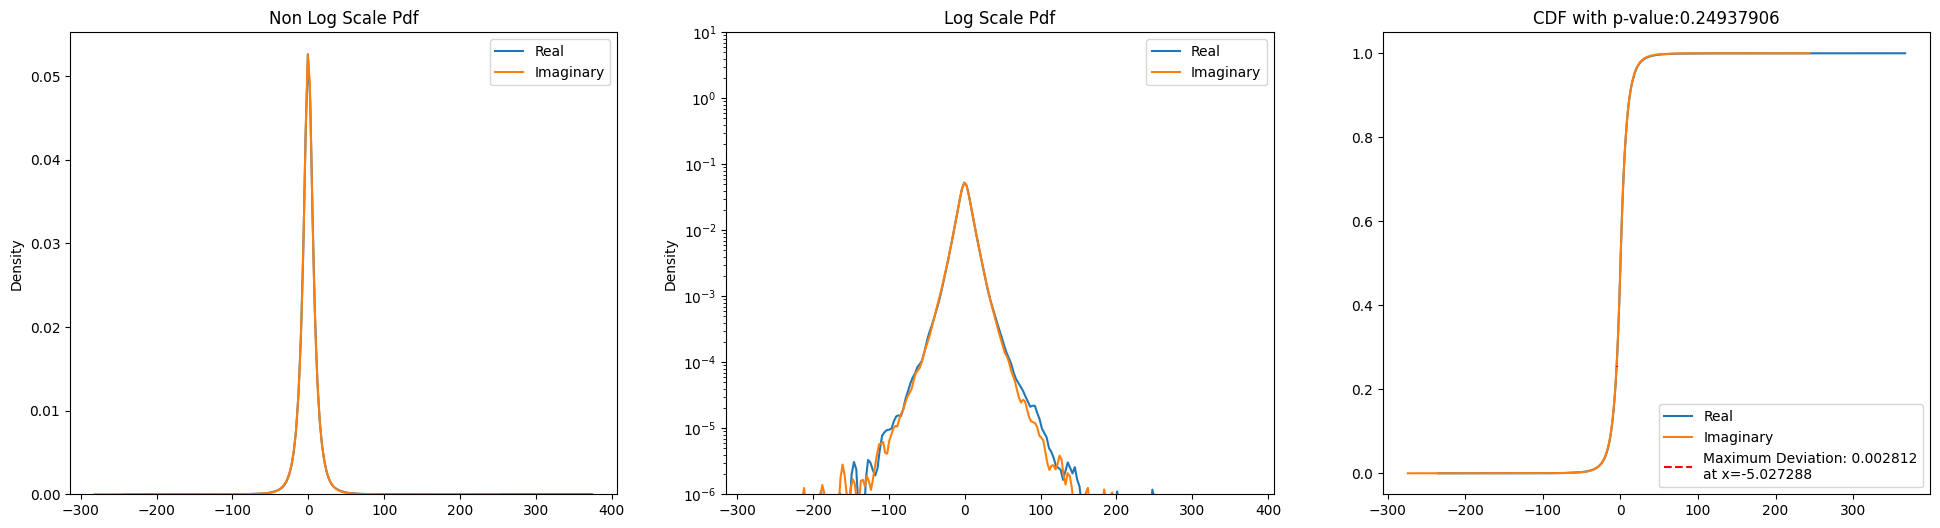

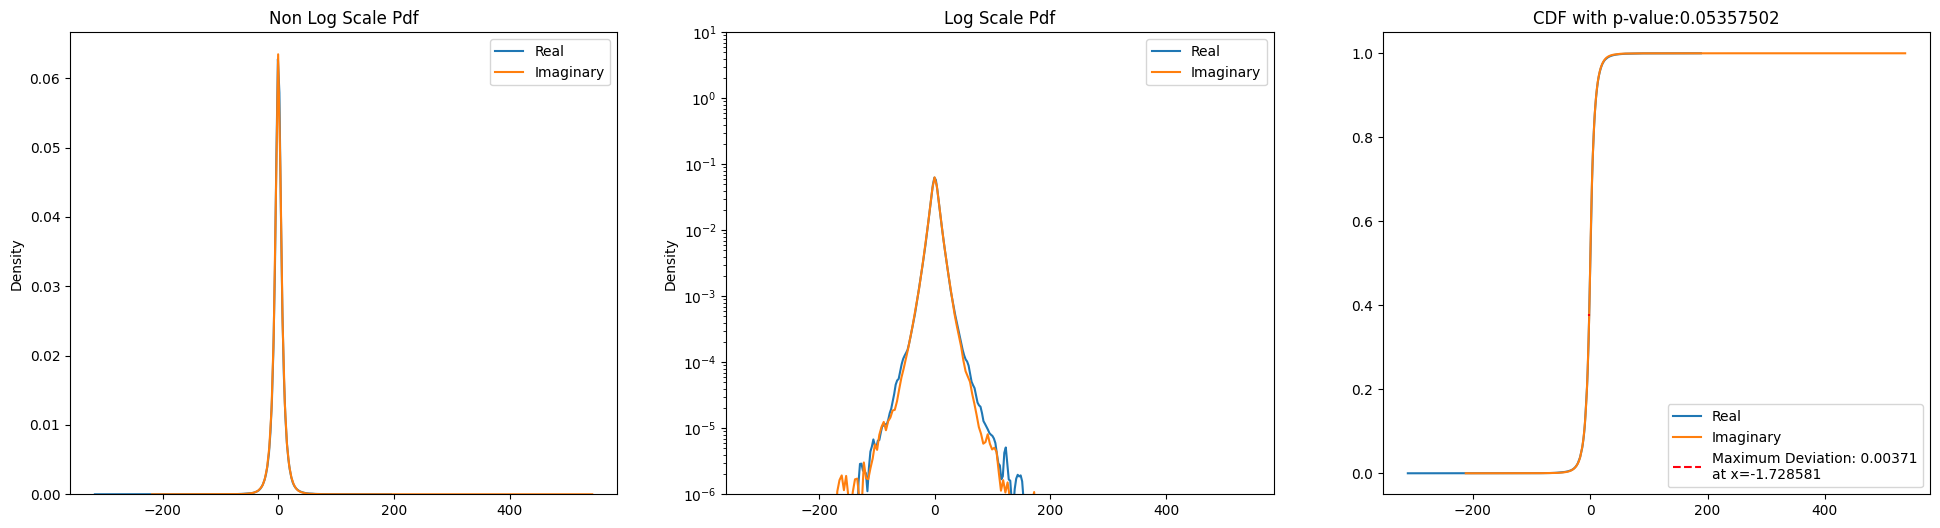

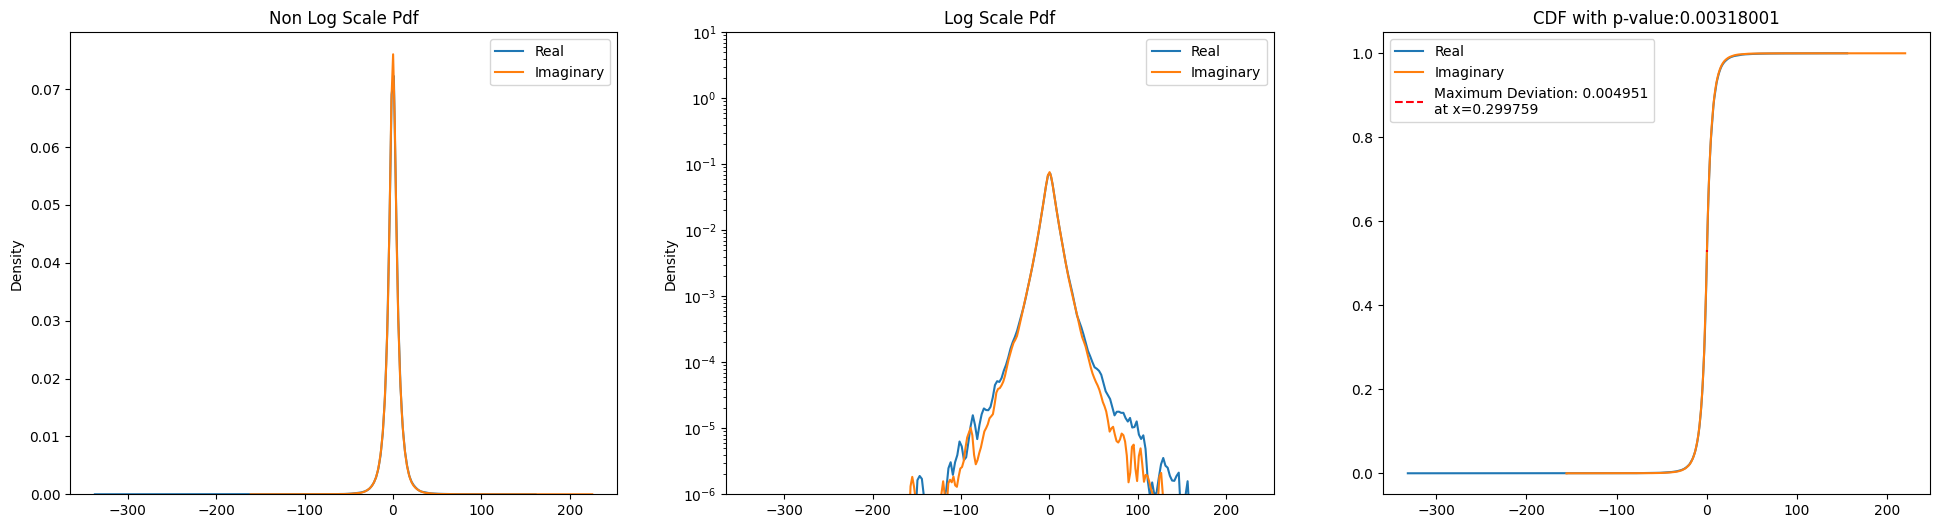

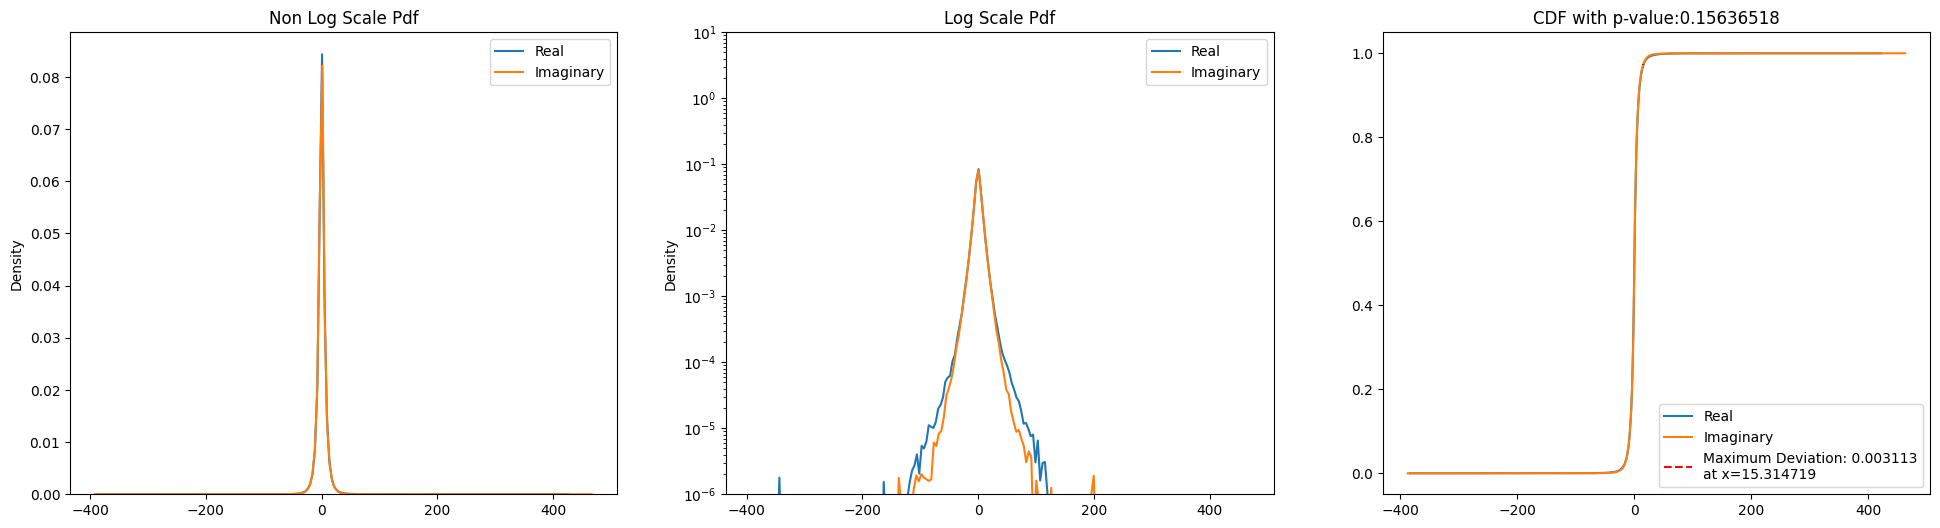

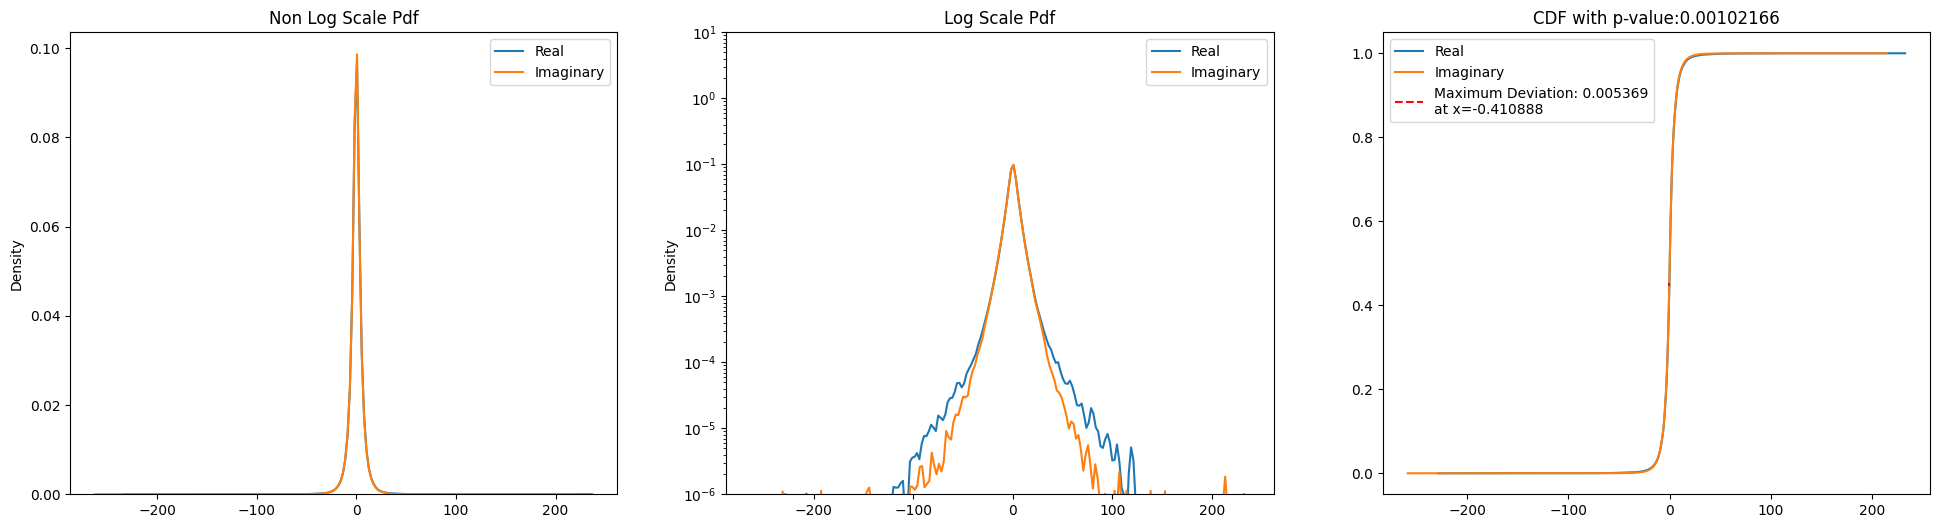

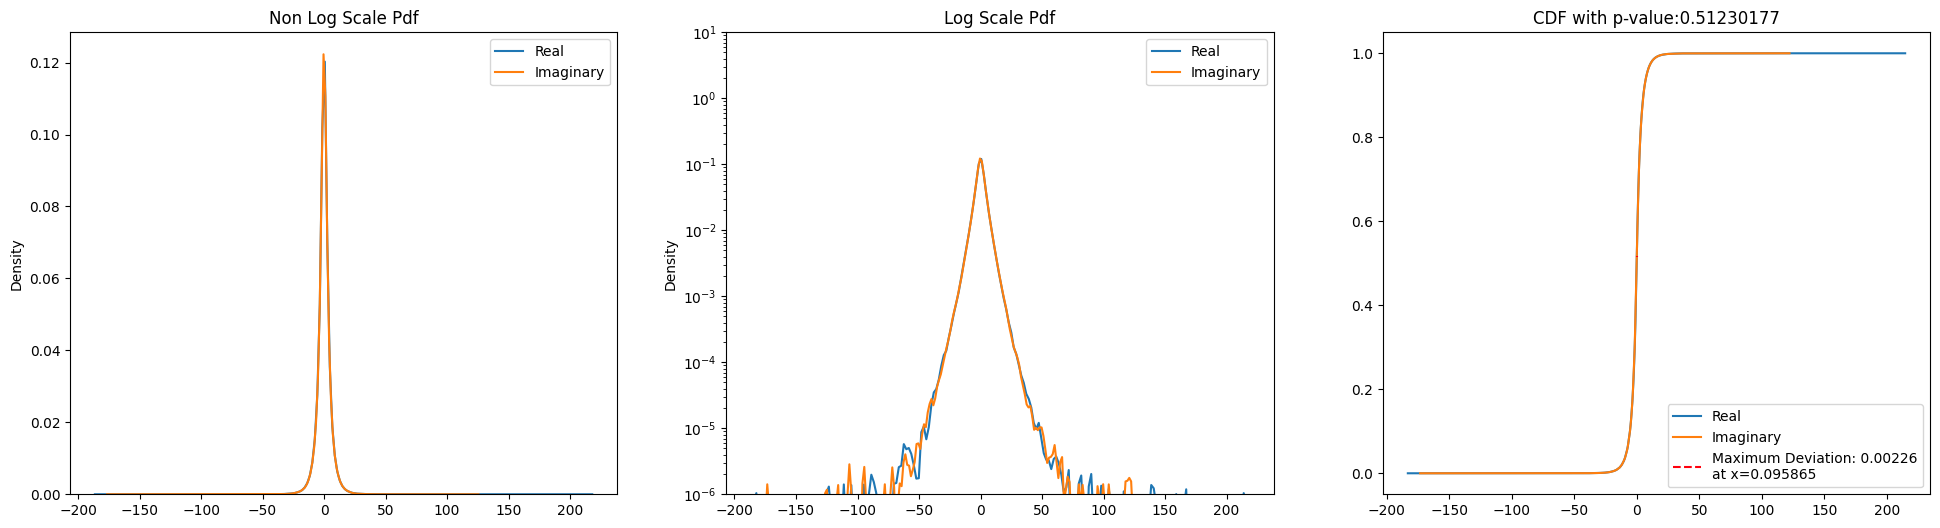

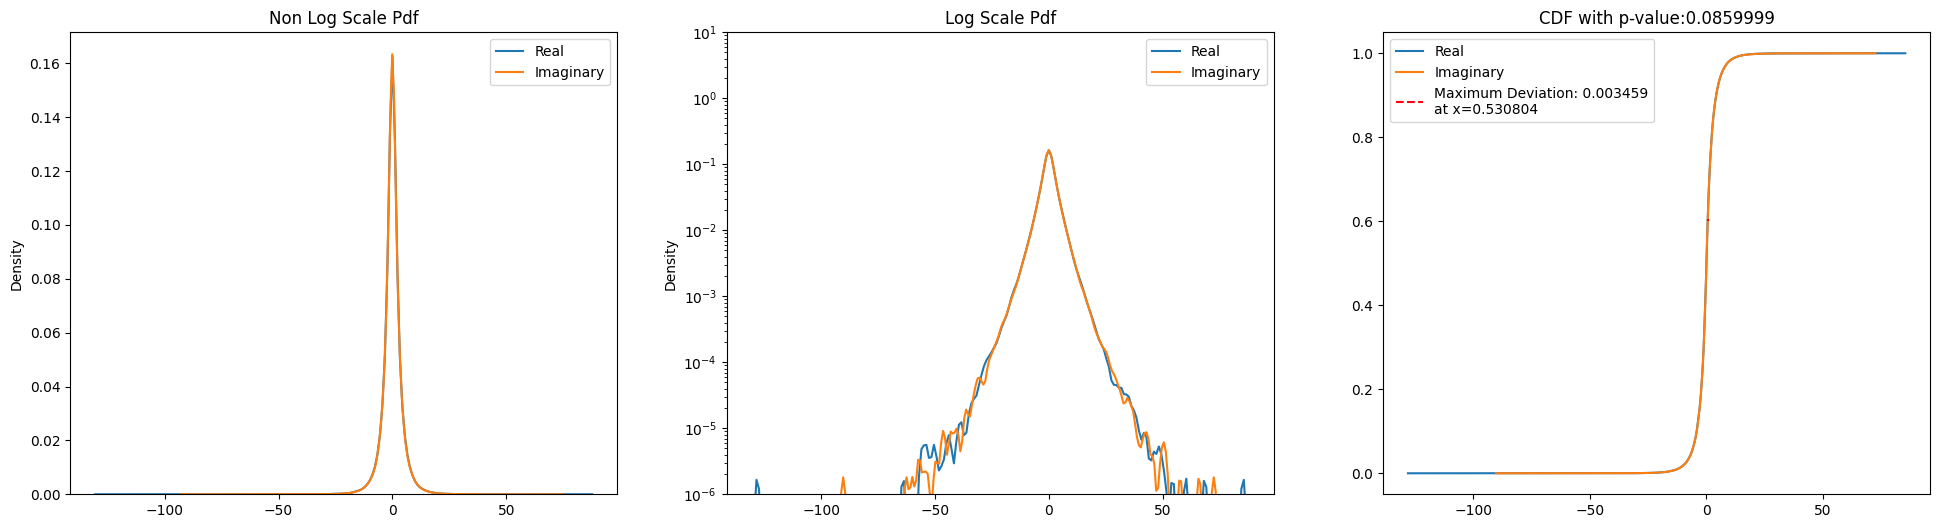

In [ ]:
coeffs, mags = convert_fourier_list(data_dir, c = 2, image_opener = npz_opener)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Infrared

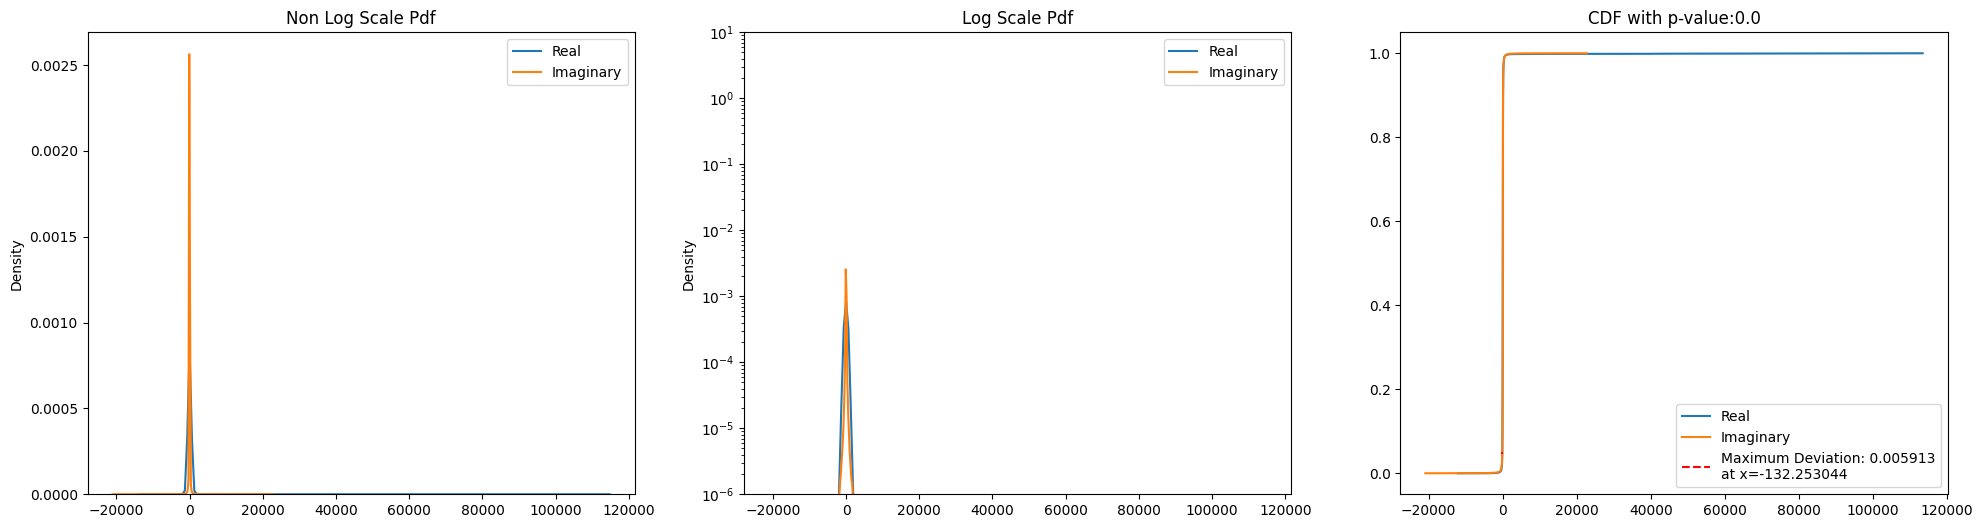

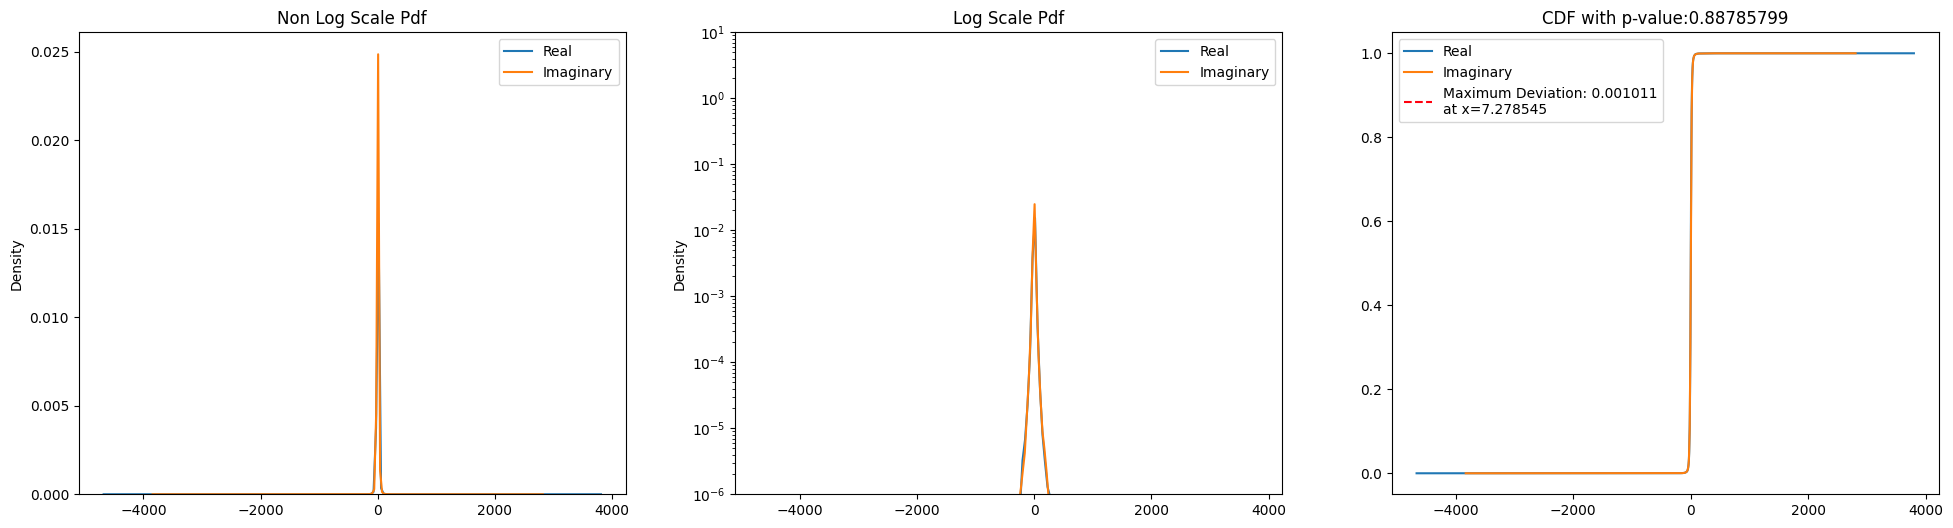

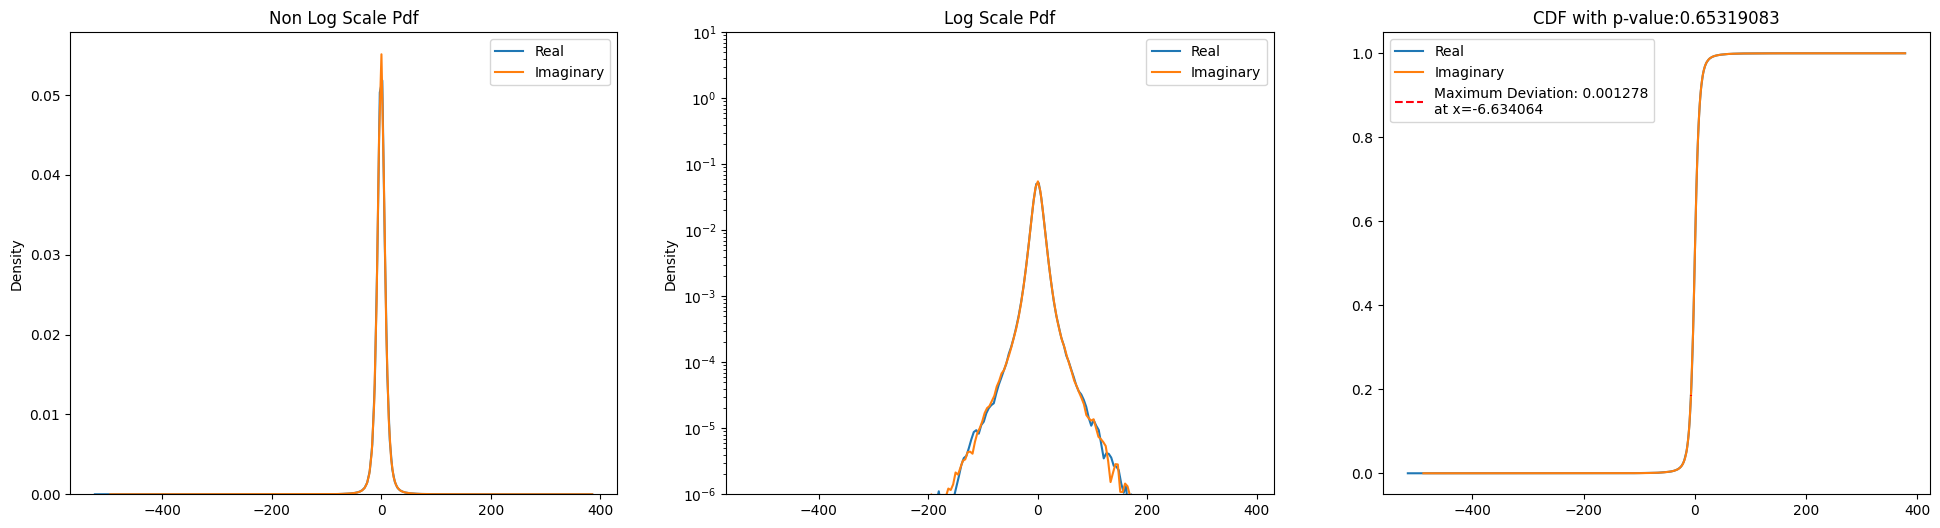

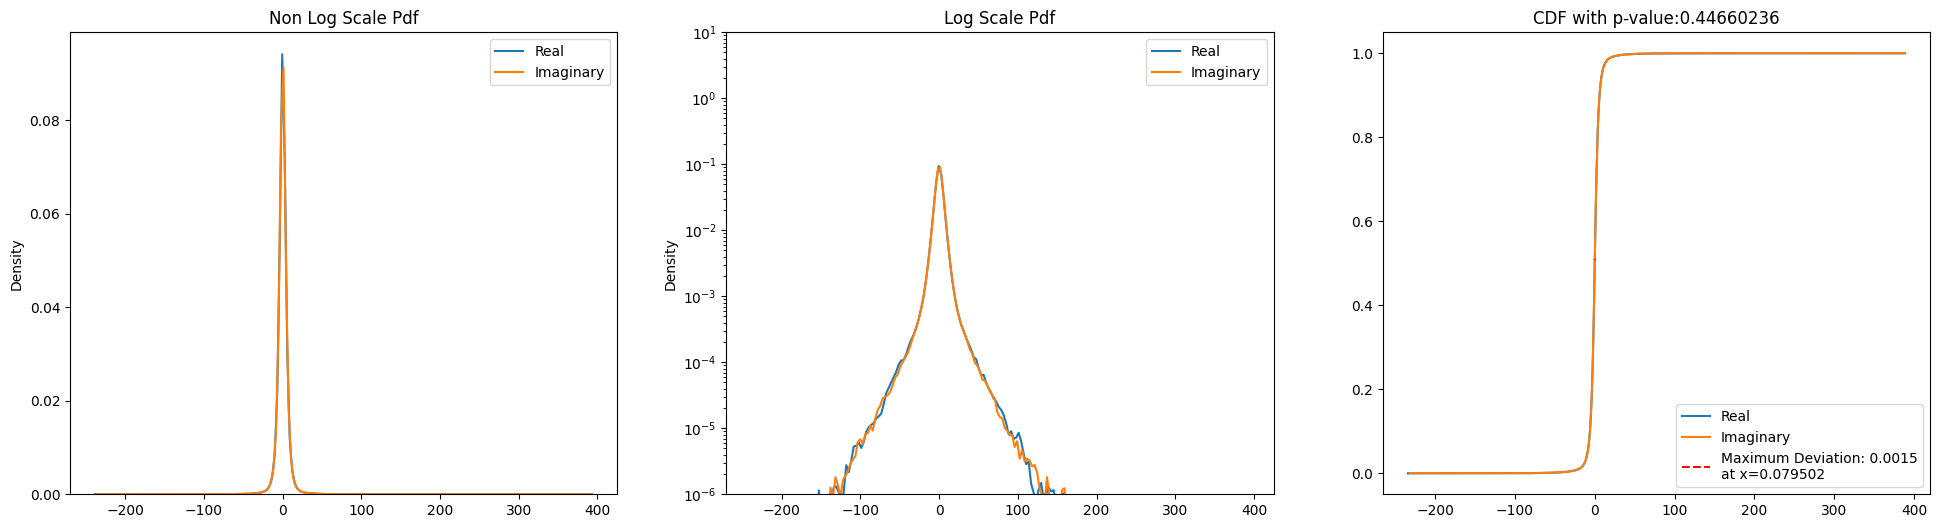

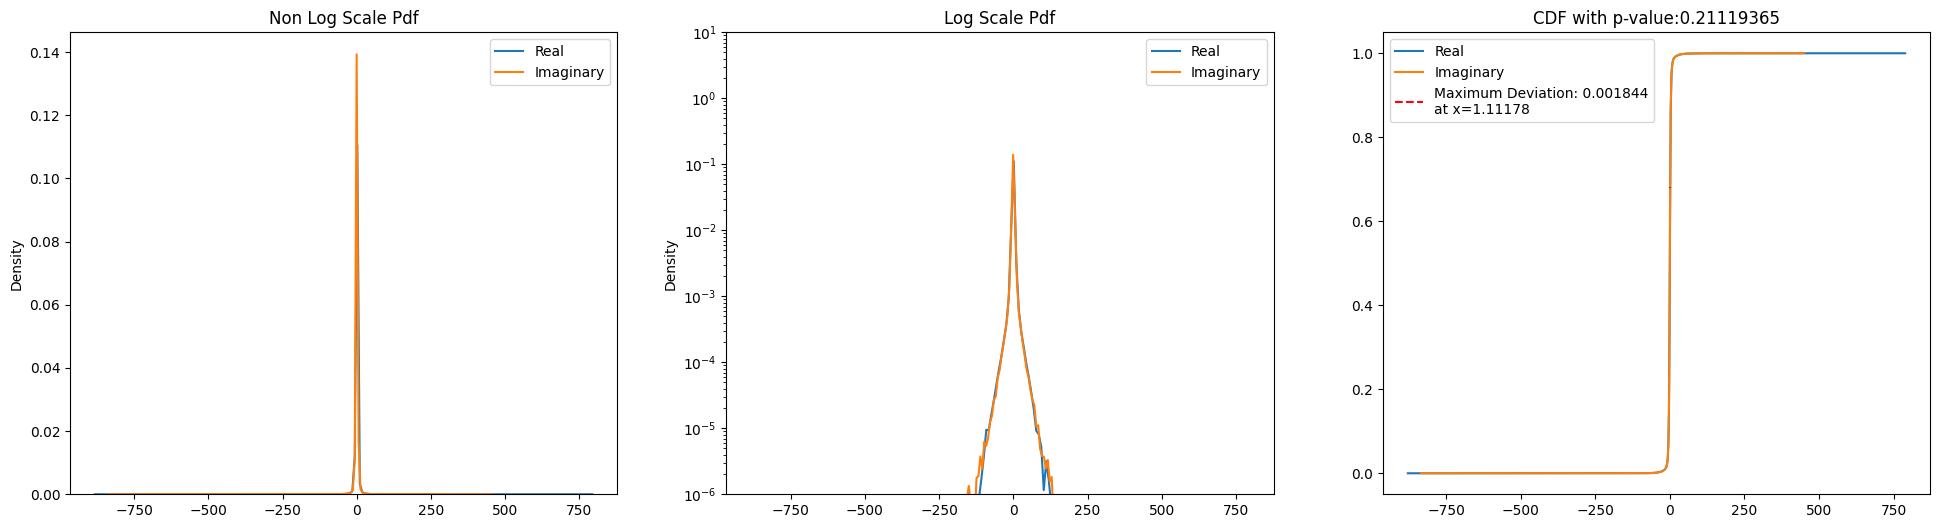

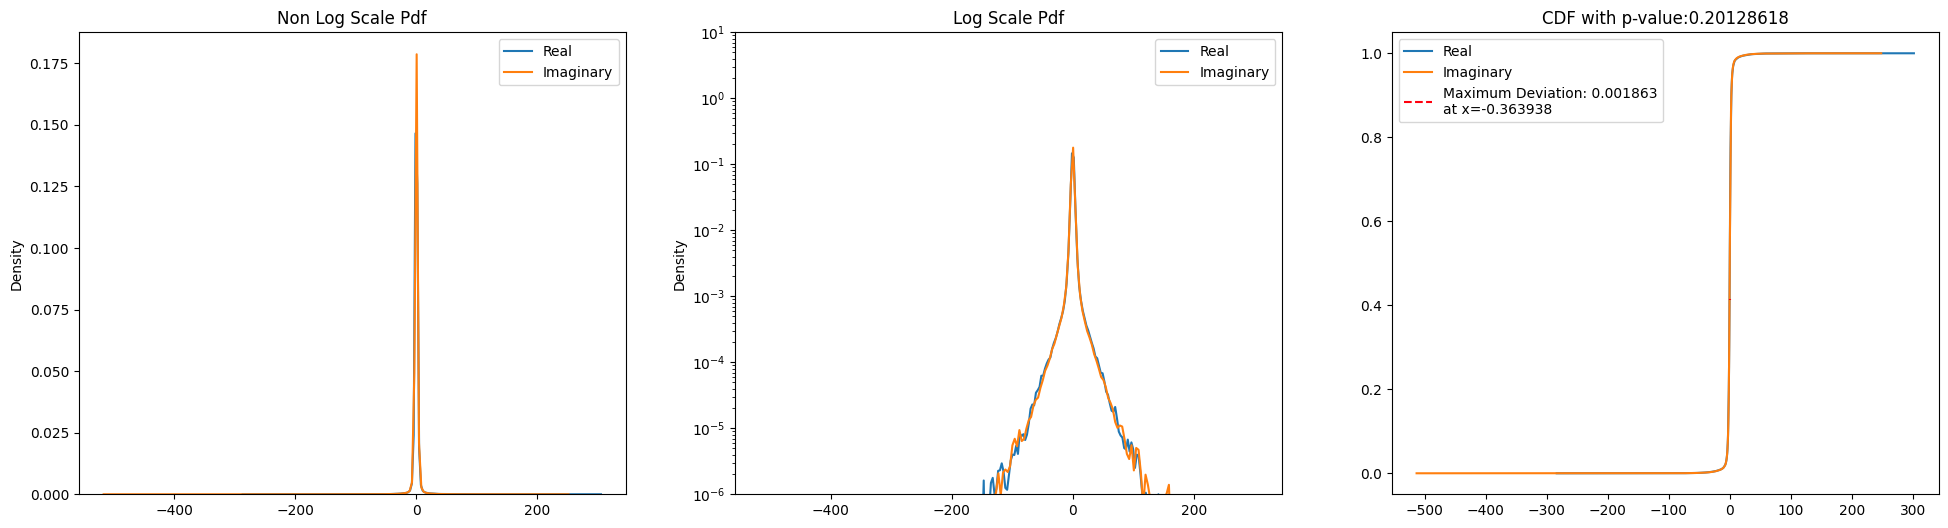

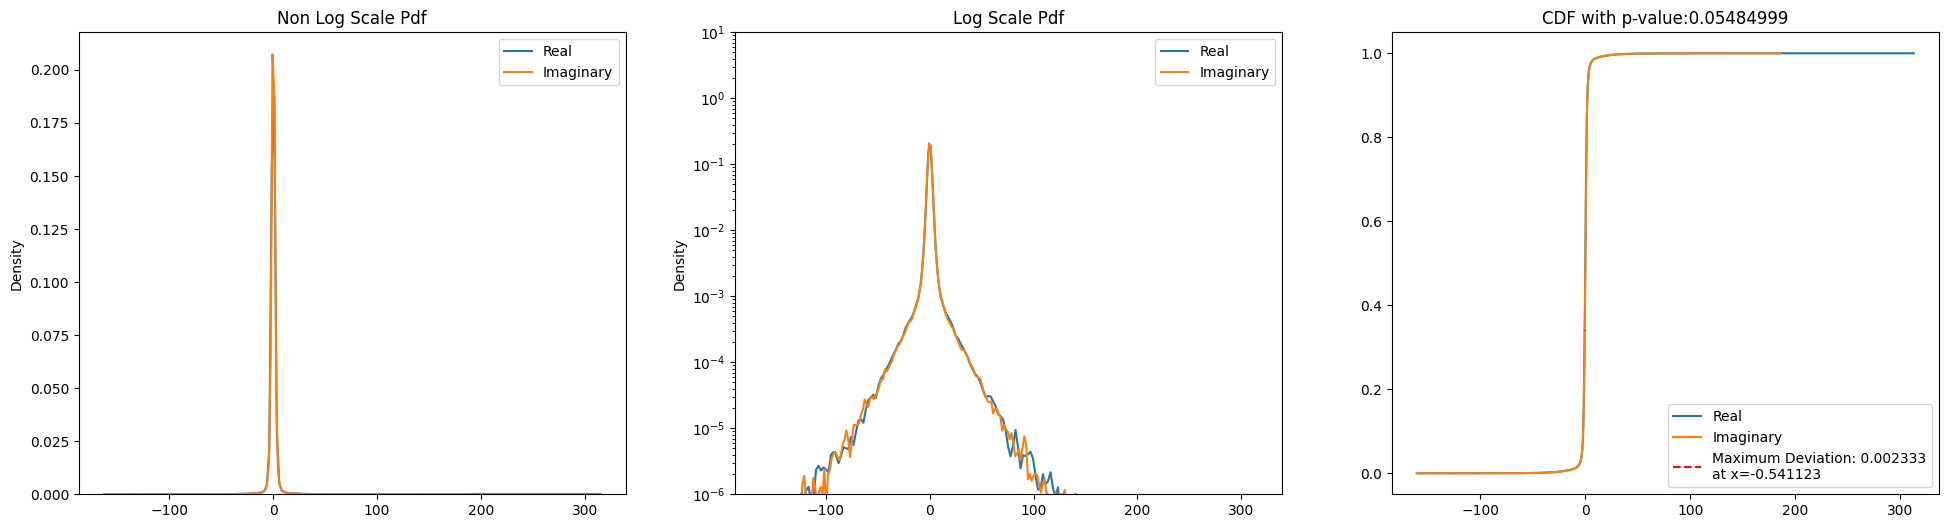

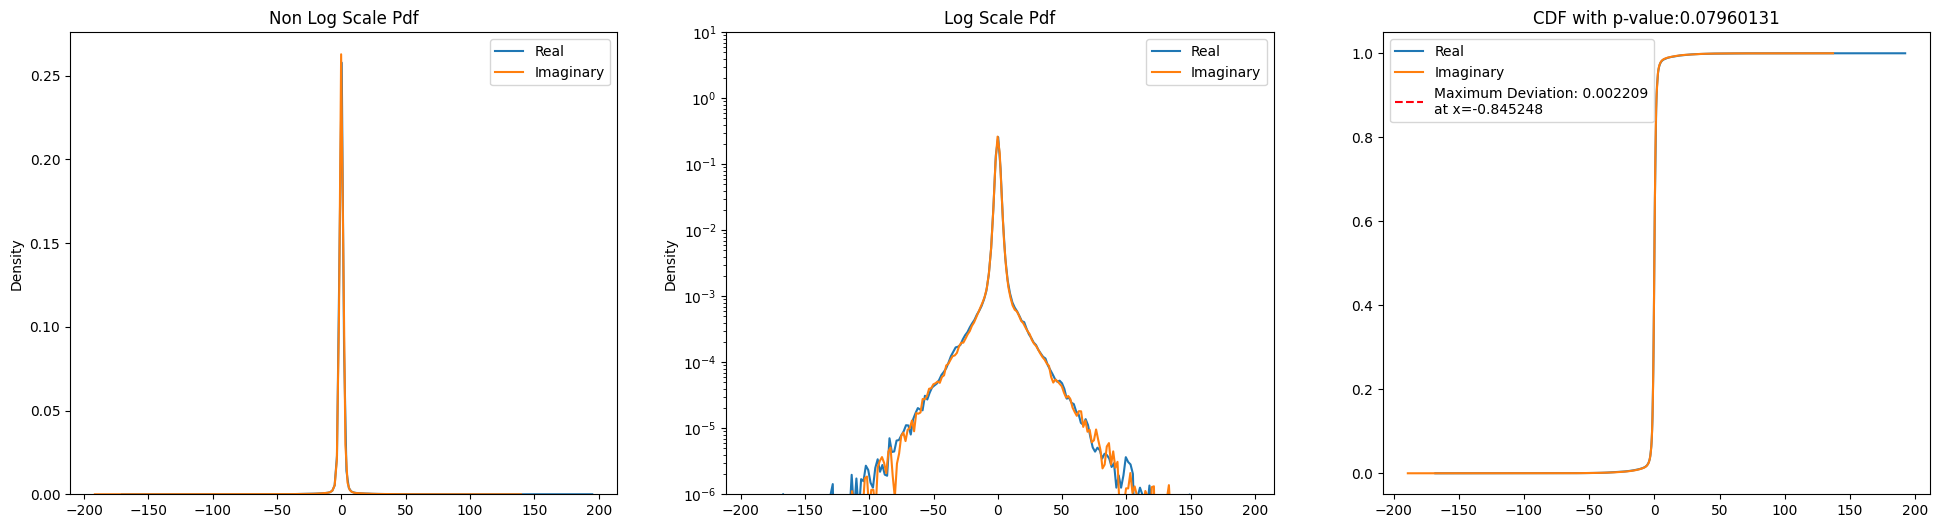

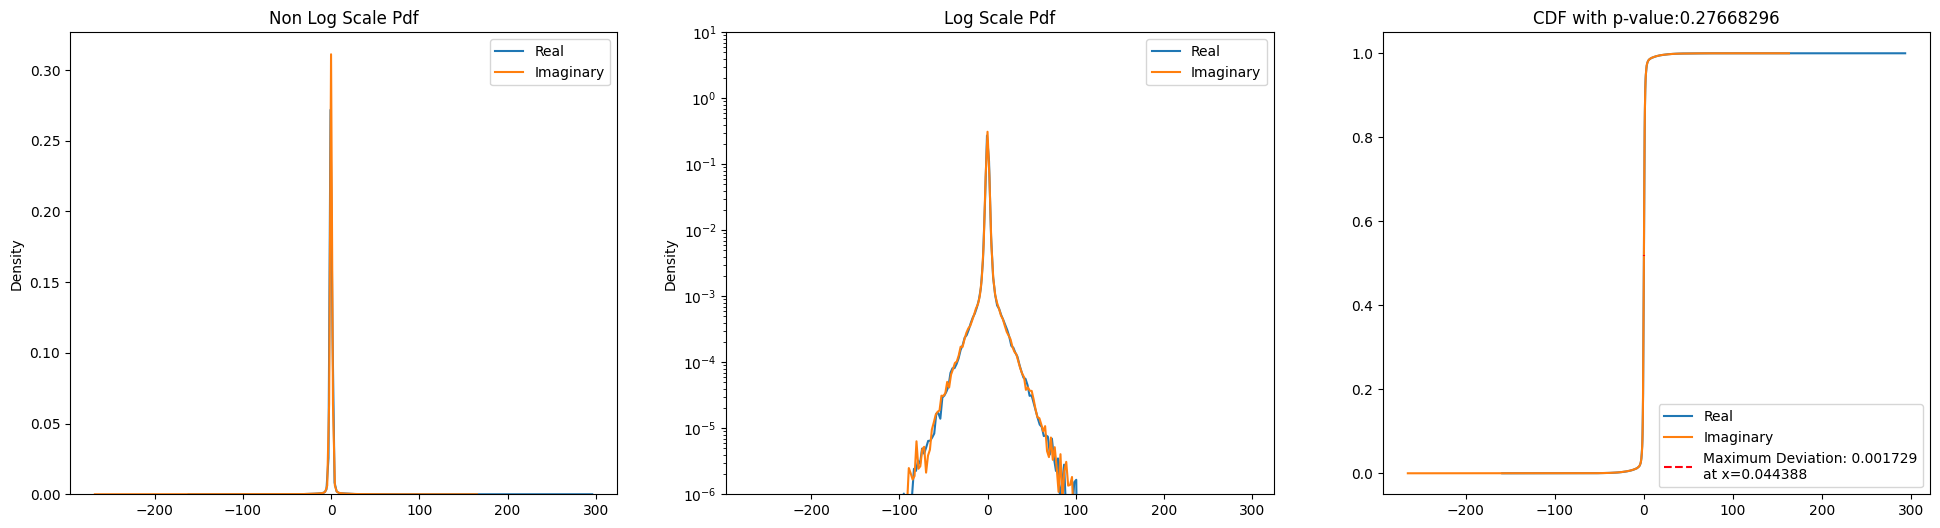

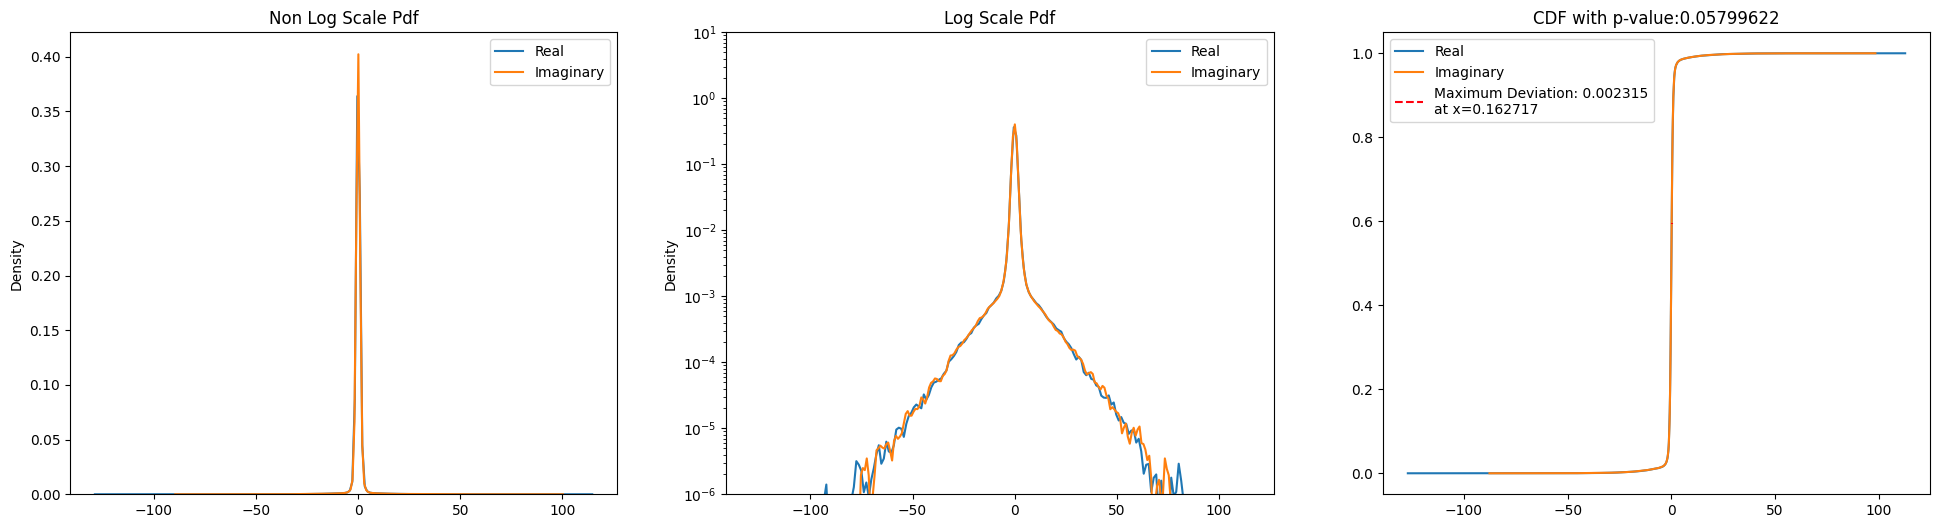

In [9]:
infra_dir = os.path.join(ROOT_DIR, 'raw-data','agriVision','toy-agriVision-nearIR')
coeffs, mags = convert_fourier_list(infra_dir, c = 4)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


In [34]:
n = len(file_list)

# Red

In [35]:
red_converted = convert_to_fourier_basis(data_dir, "red", threshold =0.02, max_depth = 9, presplit= 2, image_opener = npz_opener)
red_converted["number_of_coefficents"] = red_converted["data"].apply(lambda x:len(x))/(2 *n)
red_converted

KeyboardInterrupt: 

In [36]:
red_converted = convert_to_fourier_basis(data_dir, "red", threshold =0.03, max_depth = 9, image_opener = npz_opener)
red_converted["number_of_coefficents"] = red_converted["data"].apply(lambda x:len(x))/(2 *n)
red_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.001953125 and 0.001953125 Recursion Depth of 9
Both Endpoints Are The Same 0.0027621358640099515 and 0.0027621358640099515 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.00390625 and 0.004367320268554277
Recursion Depth Exceeded Endpoints are 0.005524271728019903 and 0.006176323555016366
Recursion Depth Exceeded Endpoints are 0.007042092334890604 and 0.0078125
[0.00097656 0.00218366 0.00356473 0.00525895 0.00666839 0.00802109
 0.0109183  0.01644257 0.02194551 0.02741871 0.03299406 0.03580887
 0.03851833 0.04398869 0.05497586 0.06602095 0.07703347 0.08802615
 0.11006022 0.13206901 0.15406518 0.17606856 0.22015294 0.26415428
 0.30814661 0.35217232 0.44020209 0.52825984 0.61631759]


band channel                             magnitude_endpoints  \
0      1     red                                      (0.0, 0.0)   
1      2     red                      (0.001953125, 0.001953125)   
2      3     red  (0.0027621358640099515, 0.0027621358640099515)   
3      4     red              (0.00390625, 0.004367320268554277)   
4      5     red    (0.005524271728019903, 0.006176323555016366)   
5      6     red               (0.007042092334890604, 0.0078125)   
6      7     red    (0.008052940675034493, 0.010517900013934578)   
7      8     red    (0.011048543456039806, 0.016105881350068987)   
8      9     red    (0.016572815184059706, 0.021836601342771385)   
9     10     red     (0.02209708691207961, 0.027413415718004295)   
10    11     red     (0.027621358640099514, 0.03274034104343791)   
11    12     red      (0.03314563036811941, 0.03564118670096613)   
12    13     red      (0.03585460888805824, 0.03847210078826603)   
13    14     red      (0.0385216463346016, 0.043891025496570764)   
14    15     red     (0.044064508487025304, 0.05482683143600859)   
15    16     red     (0.055000499376284075, 0.06588721794309765)   
16    17     red      (0.06608954810815872, 0.07696898630952356)   
17    18     red       (0.0770432926692032, 0.08797738773090007)   
18    19     red      (0.08808572096702875, 0.11000099875256815)   
19    20     red       (0.11007033440316696, 0.1320347170402779)   
20    21     red      (0.13207804736481807, 0.15404944559930467)   
21    22     red        (0.1540865853384064, 0.1760523083722651)   
22    23     red       (0.1761714419340575, 0.22014066880633393)   
23    24     red       (0.22015799657752896, 0.2641344322329363)   
24    25     red       (0.26415609472963614, 0.3081298431572973)   
25    26     red       (0.3081731706768128, 0.35213711720920055)   
26    27     red       (0.35217503062719485, 0.4401860208027468)   
27    28     red       (0.44021635111728374, 0.5282291467669505)   
28    29     red        (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
0                   1  [489.9360440573821, -308.8413377196252, -239.5...   
1                   1  [109.23135856029603, -22.678161401072188, -51....   
2                   1  [-100.21673916305289, -7.16209349464417, -3.68...   
3                   2  [-141.4262546383884, -19.368083164039298, -4.0...   
4                   3  [23.623493009955887, 54.71457775402861, -17.36...   
5                   2  [-10.924874387560745, 8.540965911123871, 16.48...   
6                   6  [39.01670174200825, 18.159855618560258, 0.0135...   
7                  16  [-6.15455227611694, -1.8347328132889014, 8.025...   
8                  22  [9.181625224832379, 7.62188107161576, 1.058435...   
9                  25  [4.861404465000758, 0.9134832703996149, 4.1402...   
10                 28  [-3.860381619975236, 5.150698285286525, 4.3331...   
11                 17  [5.05973907560292, 0.30457096478245915, -0.316...   
12                 17  [5.711128819131655, 0.25891966266725386, -0.91...   
13                 38  [1.7229267198043925, 2.7496604676862084, -3.19...   
14                 88  [-1.5899360935892481, -0.2789217896250033, -3....   
15                105  [-0.7130988258928077, 2.6359481163287164, -3.8...   
16                120  [3.002705096450584, 0.40224727952960715, 0.181...   
17                136  [0.6939092546880111, 0.44907113488422823, -0.0...   
18                318  [-0.9937447117416554, 2.335407918447079, -2.97...   
19                381  [-1.6021278915864374, 0.9879481421224723, -0.7...   
20                439  [-0.07769173935302248, 0.1208029046102681, -0....   
21                500  [0.2758681119470588, -0.7153059531096525, -0.2...   
22               1168  [0.2473976600854074, -0.8558036520719352, 0.51...   
23               1399  [-1.3095593717880276, -0.6903487154629003, -0....   
24               1623  [-0.27284809267910304, 1.049805207606243

In [37]:
filtered_red = red_converted[red_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.0078125)]
filtered_red

band channel                           magnitude_endpoints  \
6      7     red  (0.008052940675034493, 0.010517900013934578)   
7      8     red  (0.011048543456039806, 0.016105881350068987)   
8      9     red  (0.016572815184059706, 0.021836601342771385)   
9     10     red   (0.02209708691207961, 0.027413415718004295)   
10    11     red   (0.027621358640099514, 0.03274034104343791)   
11    12     red    (0.03314563036811941, 0.03564118670096613)   
12    13     red    (0.03585460888805824, 0.03847210078826603)   
13    14     red    (0.0385216463346016, 0.043891025496570764)   
14    15     red   (0.044064508487025304, 0.05482683143600859)   
15    16     red   (0.055000499376284075, 0.06588721794309765)   
16    17     red    (0.06608954810815872, 0.07696898630952356)   
17    18     red     (0.0770432926692032, 0.08797738773090007)   
18    19     red    (0.08808572096702875, 0.11000099875256815)   
19    20     red     (0.11007033440316696, 0.1320347170402779)   
20    21     red    (0.13207804736481807, 0.15404944559930467)   
21    22     red      (0.1540865853384064, 0.1760523083722651)   
22    23     red     (0.1761714419340575, 0.22014066880633393)   
23    24     red     (0.22015799657752896, 0.2641344322329363)   
24    25     red     (0.26415609472963614, 0.3081298431572973)   
25    26     red     (0.3081731706768128, 0.35213711720920055)   
26    27     red     (0.35217503062719485, 0.4401860208027468)   
27    28     red     (0.44021635111728374, 0.5282291467669505)   
28    29     red      (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
6                   6  [39.01670174200825, 18.159855618560258, 0.0135...   
7                  16  [-6.15455227611694, -1.8347328132889014, 8.025...   
8                  22  [9.181625224832379, 7.62188107161576, 1.058435...   
9                  25  [4.861404465000758, 0.9134832703996149, 4.1402...   
10                 28  [-3.860381619975236, 5.150698285286525, 4.3331...   
11                 17  [5.05973907560292, 0.30457096478245915, -0.316...   
12                 17  [5.711128819131655, 0.25891966266725386, -0.91...   
13                 38  [1.7229267198043925, 2.7496604676862084, -3.19...   
14                 88  [-1.5899360935892481, -0.2789217896250033, -3....   
15                105  [-0.7130988258928077, 2.6359481163287164, -3.8...   
16                120  [3.002705096450584, 0.40224727952960715, 0.181...   
17                136  [0.6939092546880111, 0.44907113488422823, -0.0...   
18                318  [-0.9937447117416554, 2.335407918447079, -2.97...   
19                381  [-1.6021278915864374, 0.9879481421224723, -0.7...   
20                439  [-0.07769173935302248, 0.1208029046102681, -0....   
21                500  [0.2758681119470588, -0.7153059531096525, -0.2...   
22               1168  [0.2473976600854074, -0.8558036520719352, 0.51...   
23               1399  [-1.3095593717880276, -0.6903487154629003, -0....   
24               1623  [-0.27284809267910304, 1.0498052076062432, -0....   
25               1848  [-0.2259387951349689, 0.31236971234348576, 0.1...   
26               4338  [-0.24053890853565685, 0.6967161127278969, -0....   
27               4926  [0.06370895437047502, -0.30710801956133155, 0....   
28               3187  [0.08031019634383219, 0.0871489852022976, 0.03...   

    number_of_coefficents  
6                    13.0  
7                    34.0  
8                    48.0  
9                    58.0  
10                   68.0  
11                   43.0  
12                   43.0  
13                   98.0  
14                  226.0  
15                  280.0  
16                  334.0  
17                  378.0  
18                  912.0  
19                 1106.0  
20                 1308.0  
21                 1514.0  
22                 3612.0  
23                 4416.0  
24                 5194.0  
25                 6014.0  
26    

 
0.1719 x - 5.473


/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_8542/629385160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_red["magnitude_length"] = filtered_red["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.1875699694962403

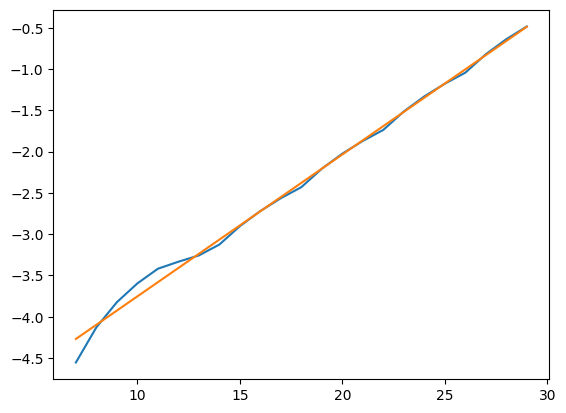

In [38]:

filtered_red["magnitude_length"] = filtered_red["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_red["band"].to_numpy()
y = filtered_red["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Green

In [40]:
green_converted = convert_to_fourier_basis(data_dir, "green", threshold =0.03, max_depth = 9, image_opener = npz_opener)
green_converted["number_of_coefficents"] = green_converted["data"].apply(lambda x:len(x))/(2 *n)
green_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.001953125 and 0.001953125 Recursion Depth of 9
Both Endpoints Are The Same 0.0027621358640099515 and 0.0027621358640099515 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.00390625 and 0.004367320268554277
Recursion Depth Exceeded Endpoints are 0.005524271728019903 and 0.006176323555016366
Recursion Depth Exceeded Endpoints are 0.007042092334890604 and 0.0078125
Recursion Depth Exceeded Endpoints are 0.011048543456039806 and 0.01188039556698871
Recursion Depth Exceeded Endpoints are 0.012352647110032733 and 0.013101960805662831
[0.00097656 0.00218366 0.00356473 0.00525895 0.00666839 0.00802109
 0.0109183  0.01207525 0.01357721 0.01644257 0.02194551 0.02741871
 0.03299406 0.03580887 0.03851833 0.04398869 0.05497586 0.06602095
 0.07703347 0.08802615 0.11006022 0.13206901 0.15406518 0.17606856
 0.22015294 0.26415428 0.30814661 0.35217232 0.44020209 0.52825984
 0.61631759]


band channel                             magnitude_endpoints  \
0      1   green                                      (0.0, 0.0)   
1      2   green                      (0.001953125, 0.001953125)   
2      3   green  (0.0027621358640099515, 0.0027621358640099515)   
3      4   green              (0.00390625, 0.004367320268554277)   
4      5   green    (0.005524271728019903, 0.006176323555016366)   
5      6   green               (0.007042092334890604, 0.0078125)   
6      7   green    (0.008052940675034493, 0.010517900013934578)   
7      8   green     (0.011048543456039806, 0.01188039556698871)   
8      9   green    (0.012352647110032733, 0.013101960805662831)   
9     10   green             (0.013671875, 0.016105881350068987)   
10    11   green    (0.016572815184059706, 0.021836601342771385)   
11    12   green     (0.02209708691207961, 0.027413415718004295)   
12    13   green     (0.027621358640099514, 0.03274034104343791)   
13    14   green      (0.03314563036811941, 0.03564118670096613)   
14    15   green      (0.03585460888805824, 0.03847210078826603)   
15    16   green      (0.0385216463346016, 0.043891025496570764)   
16    17   green     (0.044064508487025304, 0.05482683143600859)   
17    18   green     (0.055000499376284075, 0.06588721794309765)   
18    19   green      (0.06608954810815872, 0.07696898630952356)   
19    20   green       (0.0770432926692032, 0.08797738773090007)   
20    21   green      (0.08808572096702875, 0.11000099875256815)   
21    22   green       (0.11007033440316696, 0.1320347170402779)   
22    23   green      (0.13207804736481807, 0.15404944559930467)   
23    24   green        (0.1540865853384064, 0.1760523083722651)   
24    25   green       (0.1761714419340575, 0.22014066880633393)   
25    26   green       (0.22015799657752896, 0.2641344322329363)   
26    27   green       (0.26415609472963614, 0.3081298431572973)   
27    28   green       (0.3081731706768128, 0.35213711720920055)   
28    29   green       (0.35217503062719485, 0.4401860208027468)   
29    30   green       (0.44021635111728374, 0.5282291467669505)   
30    31   green        (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
0                   1  [141.47615242192006, 21.15020685018287, -160.1...   
1                   1  [187.97275663566677, -26.822482611461066, -41....   
2                   1  [-152.89748027627732, 10.730281654583544, -17....   
3                   2  [-127.92526221445453, -15.625593586829206, -5....   
4                   3  [10.096847935362746, 76.18618139118936, -29.76...   
5                   2  [-6.700654580510271, -1.8303741460813976, 17.8...   
6                   6  [33.80748973424702, 20.1731671654318, 1.117081...   
7                   4  [-3.8464203965627197, 6.198338904524458, 12.49...   
8                   3  [12.05892042207276, 19.70767419927654, 12.4906...   
9                   9  [17.753618448050617, -16.04086781990082, -0.56...   
10                 22  [16.507088362825414, 13.874472679444308, 0.703...   
11                 25  [5.297680087592011, -3.775802056654536, 7.8604...   
12                 28  [-6.268822833406604, 8.591200708561598, 3.8282...   
13                 17  [6.003196530687948, -1.3555907902698408, -3.26...   
14                 17  [6.418178655217753, -7.762960557883996, 0.7865...   
15                 38  [0.9155297023961636, 3.046704126125322, -3.863...   
16                 88  [-3.0926410966188147, 1.3018668166351168, -3.1...   
17                105  [0.1003792811888305, 2.7302992005768876, -7.77...   
18                120  [3.8265344478323344, -0.45477675292426917, 0.7...   
19                136  [0.4991056213016457, 0.22670362368437524, -0.3...   
20                318  [-1.3702101250781211, -0.16285854933149924, -1...   
21                381  [-1.9576565262917478, 0.6368946700714169, -0.7...   
22                439  [-0.11611936506871884, -0.17358617409141233, -...   
23 

In [41]:
filtered_green = green_converted[green_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.013101960805662831)]
filtered_green

band channel                           magnitude_endpoints  \
9     10   green           (0.013671875, 0.016105881350068987)   
10    11   green  (0.016572815184059706, 0.021836601342771385)   
11    12   green   (0.02209708691207961, 0.027413415718004295)   
12    13   green   (0.027621358640099514, 0.03274034104343791)   
13    14   green    (0.03314563036811941, 0.03564118670096613)   
14    15   green    (0.03585460888805824, 0.03847210078826603)   
15    16   green    (0.0385216463346016, 0.043891025496570764)   
16    17   green   (0.044064508487025304, 0.05482683143600859)   
17    18   green   (0.055000499376284075, 0.06588721794309765)   
18    19   green    (0.06608954810815872, 0.07696898630952356)   
19    20   green     (0.0770432926692032, 0.08797738773090007)   
20    21   green    (0.08808572096702875, 0.11000099875256815)   
21    22   green     (0.11007033440316696, 0.1320347170402779)   
22    23   green    (0.13207804736481807, 0.15404944559930467)   
23    24   green      (0.1540865853384064, 0.1760523083722651)   
24    25   green     (0.1761714419340575, 0.22014066880633393)   
25    26   green     (0.22015799657752896, 0.2641344322329363)   
26    27   green     (0.26415609472963614, 0.3081298431572973)   
27    28   green     (0.3081731706768128, 0.35213711720920055)   
28    29   green     (0.35217503062719485, 0.4401860208027468)   
29    30   green     (0.44021635111728374, 0.5282291467669505)   
30    31   green      (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
9                   9  [17.753618448050617, -16.04086781990082, -0.56...   
10                 22  [16.507088362825414, 13.874472679444308, 0.703...   
11                 25  [5.297680087592011, -3.775802056654536, 7.8604...   
12                 28  [-6.268822833406604, 8.591200708561598, 3.8282...   
13                 17  [6.003196530687948, -1.3555907902698408, -3.26...   
14                 17  [6.418178655217753, -7.762960557883996, 0.7865...   
15                 38  [0.9155297023961636, 3.046704126125322, -3.863...   
16                 88  [-3.0926410966188147, 1.3018668166351168, -3.1...   
17                105  [0.1003792811888305, 2.7302992005768876, -7.77...   
18                120  [3.8265344478323344, -0.45477675292426917, 0.7...   
19                136  [0.4991056213016457, 0.22670362368437524, -0.3...   
20                318  [-1.3702101250781211, -0.16285854933149924, -1...   
21                381  [-1.9576565262917478, 0.6368946700714169, -0.7...   
22                439  [-0.11611936506871884, -0.17358617409141233, -...   
23                500  [0.30020393974435666, -0.692793083287097, -0.2...   
24               1168  [0.40114643639910746, -0.6666882060645635, 0.4...   
25               1399  [-1.5535405682738985, -1.0304421618471575, -0....   
26               1623  [-0.3293151372588804, 1.2851276259558402, 0.01...   
27               1848  [-0.266999588587416, 0.2689227037476446, 0.161...   
28               4338  [-0.29018165692068054, 0.905261108891224, -0.1...   
29               4926  [0.07234602982701199, -0.338307893575966, 0.24...   
30               3187  [0.08416993512229683, 0.13645378828174362, 0.0...   

    number_of_coefficents  
9                    21.0  
10                   48.0  
11                   58.0  
12                   68.0  
13                   43.0  
14                   43.0  
15                   98.0  
16                  226.0  
17                  280.0  
18                  334.0  
19                  378.0  
20                  912.0  
21                 1106.0  
22                 1308.0  
23                 1514.0  
24                 3612.0  
25                 4416.0  
26                 5194.0  
27                 6014.0  
28                14402.0  
29                15812.0  
30                 7398.0

 
0.1682 x - 5.728


/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_8542/3855697063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_green["magnitude_length"] = filtered_green["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.183181413221605

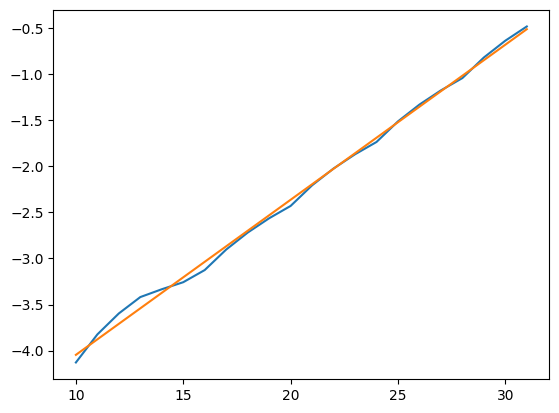

In [42]:

filtered_green["magnitude_length"] = filtered_green["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_green["band"].to_numpy()
y = filtered_green["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Blue

In [43]:
blue_converted = convert_to_fourier_basis(data_dir, "blue", threshold =0.03, max_depth = 9, image_opener = npz_opener)
blue_converted["number_of_coefficents"] = blue_converted["data"].apply(lambda x:len(x))/(2 *n)
blue_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.001953125 and 0.001953125 Recursion Depth of 9
Both Endpoints Are The Same 0.0027621358640099515 and 0.0027621358640099515 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.00390625 and 0.004367320268554277
Recursion Depth Exceeded Endpoints are 0.005524271728019903 and 0.006176323555016366
Recursion Depth Exceeded Endpoints are 0.007042092334890604 and 0.0078125
Recursion Depth Exceeded Endpoints are 0.011048543456039806 and 0.01188039556698871
Recursion Depth Exceeded Endpoints are 0.012352647110032733 and 0.013101960805662831
[0.00097656 0.00218366 0.00356473 0.00525895 0.00666839 0.00802109
 0.0109183  0.01207525 0.01357721 0.01644257 0.02194551 0.02741871
 0.03299406 0.03580887 0.03851833 0.04398869 0.05497586 0.06602095
 0.07703347 0.08802615 0.11006022 0.13206901 0.15406518 0.17606856
 0.22015294 0.26415428 0.30814661 0.35217232 0.44020209 0.52825984
 0.61631759]


band channel                             magnitude_endpoints  \
0      1    blue                                      (0.0, 0.0)   
1      2    blue                      (0.001953125, 0.001953125)   
2      3    blue  (0.0027621358640099515, 0.0027621358640099515)   
3      4    blue              (0.00390625, 0.004367320268554277)   
4      5    blue    (0.005524271728019903, 0.006176323555016366)   
5      6    blue               (0.007042092334890604, 0.0078125)   
6      7    blue    (0.008052940675034493, 0.010517900013934578)   
7      8    blue     (0.011048543456039806, 0.01188039556698871)   
8      9    blue    (0.012352647110032733, 0.013101960805662831)   
9     10    blue             (0.013671875, 0.016105881350068987)   
10    11    blue    (0.016572815184059706, 0.021836601342771385)   
11    12    blue     (0.02209708691207961, 0.027413415718004295)   
12    13    blue     (0.027621358640099514, 0.03274034104343791)   
13    14    blue      (0.03314563036811941, 0.03564118670096613)   
14    15    blue      (0.03585460888805824, 0.03847210078826603)   
15    16    blue      (0.0385216463346016, 0.043891025496570764)   
16    17    blue     (0.044064508487025304, 0.05482683143600859)   
17    18    blue     (0.055000499376284075, 0.06588721794309765)   
18    19    blue      (0.06608954810815872, 0.07696898630952356)   
19    20    blue       (0.0770432926692032, 0.08797738773090007)   
20    21    blue      (0.08808572096702875, 0.11000099875256815)   
21    22    blue       (0.11007033440316696, 0.1320347170402779)   
22    23    blue      (0.13207804736481807, 0.15404944559930467)   
23    24    blue        (0.1540865853384064, 0.1760523083722651)   
24    25    blue       (0.1761714419340575, 0.22014066880633393)   
25    26    blue       (0.22015799657752896, 0.2641344322329363)   
26    27    blue       (0.26415609472963614, 0.3081298431572973)   
27    28    blue       (0.3081731706768128, 0.35213711720920055)   
28    29    blue       (0.35217503062719485, 0.4401860208027468)   
29    30    blue       (0.44021635111728374, 0.5282291467669505)   
30    31    blue        (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
0                   1  [394.94385116259076, -254.7183278194139, 15.40...   
1                   1  [108.2801725443118, -64.15115877832433, -20.10...   
2                   1  [-84.57780404054947, -12.94105373586915, -19.6...   
3                   2  [-36.9209332642821, -25.274776652850363, -5.18...   
4                   3  [34.01882151478191, 47.445238553764234, -26.19...   
5                   2  [7.91087687930302, -15.108808433781734, 14.761...   
6                   6  [41.534291901040305, 10.901299761384152, 1.772...   
7                   4  [-8.850556634851895, -3.1462950772010014, 11.7...   
8                   3  [30.648825458235713, 18.041527839054034, 9.297...   
9                   9  [13.550199821103465, -8.803397773387823, 1.406...   
10                 22  [8.552437953713358, 12.294755822817535, -1.205...   
11                 25  [14.18812474301778, -1.0944081927203064, 6.985...   
12                 28  [-2.91184809584495, 5.372852420855826, 3.03033...   
13                 17  [3.610243902045055, -0.24675628058360777, -3.4...   
14                 17  [2.7955896977492394, -4.9541564940887435, 2.39...   
15                 38  [1.5494910175719252, 3.4089123296695254, -2.75...   
16                 88  [-2.052335431450847, -1.5640401095637064, -2.2...   
17                105  [-1.868330935660735, 0.8830319908281304, -6.43...   
18                120  [3.602249259440363, -1.0119927287724002, 0.332...   
19                136  [0.46533974302166037, 0.07662795991066246, -0....   
20                318  [-0.837399549736144, 0.5038863484116137, -0.28...   
21                381  [-1.9295437576593948, 0.6084483375173982, -0.6...   
22                439  [0.059054107102722075, -0.4214863480591927, -0...   
23 

In [44]:
filtered_blue = blue_converted[blue_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.0131019608056628312)]
filtered_blue

band channel                           magnitude_endpoints  \
9     10    blue           (0.013671875, 0.016105881350068987)   
10    11    blue  (0.016572815184059706, 0.021836601342771385)   
11    12    blue   (0.02209708691207961, 0.027413415718004295)   
12    13    blue   (0.027621358640099514, 0.03274034104343791)   
13    14    blue    (0.03314563036811941, 0.03564118670096613)   
14    15    blue    (0.03585460888805824, 0.03847210078826603)   
15    16    blue    (0.0385216463346016, 0.043891025496570764)   
16    17    blue   (0.044064508487025304, 0.05482683143600859)   
17    18    blue   (0.055000499376284075, 0.06588721794309765)   
18    19    blue    (0.06608954810815872, 0.07696898630952356)   
19    20    blue     (0.0770432926692032, 0.08797738773090007)   
20    21    blue    (0.08808572096702875, 0.11000099875256815)   
21    22    blue     (0.11007033440316696, 0.1320347170402779)   
22    23    blue    (0.13207804736481807, 0.15404944559930467)   
23    24    blue      (0.1540865853384064, 0.1760523083722651)   
24    25    blue     (0.1761714419340575, 0.22014066880633393)   
25    26    blue     (0.22015799657752896, 0.2641344322329363)   
26    27    blue     (0.26415609472963614, 0.3081298431572973)   
27    28    blue     (0.3081731706768128, 0.35213711720920055)   
28    29    blue     (0.35217503062719485, 0.4401860208027468)   
29    30    blue     (0.44021635111728374, 0.5282291467669505)   
30    31    blue      (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
9                   9  [13.550199821103465, -8.803397773387823, 1.406...   
10                 22  [8.552437953713358, 12.294755822817535, -1.205...   
11                 25  [14.18812474301778, -1.0944081927203064, 6.985...   
12                 28  [-2.91184809584495, 5.372852420855826, 3.03033...   
13                 17  [3.610243902045055, -0.24675628058360777, -3.4...   
14                 17  [2.7955896977492394, -4.9541564940887435, 2.39...   
15                 38  [1.5494910175719252, 3.4089123296695254, -2.75...   
16                 88  [-2.052335431450847, -1.5640401095637064, -2.2...   
17                105  [-1.868330935660735, 0.8830319908281304, -6.43...   
18                120  [3.602249259440363, -1.0119927287724002, 0.332...   
19                136  [0.46533974302166037, 0.07662795991066246, -0....   
20                318  [-0.837399549736144, 0.5038863484116137, -0.28...   
21                381  [-1.9295437576593948, 0.6084483375173982, -0.6...   
22                439  [0.059054107102722075, -0.4214863480591927, -0...   
23                500  [0.17355797701374803, -0.5811789448881126, -0....   
24               1168  [0.2499578543287755, -0.7966847451762136, 0.40...   
25               1399  [-1.3999393111093346, -0.8860012935158674, -0....   
26               1623  [-0.2559043240380651, 1.1024901846859285, -0.0...   
27               1848  [-0.23154701014392848, 0.23565056609874924, 0....   
28               4338  [-0.2457005753657115, 0.7975707377147021, -0.1...   
29               4926  [0.06734537215609931, -0.2867670080222182, 0.2...   
30               3187  [0.0816334356721625, 0.13848027217898715, 0.03...   

    number_of_coefficents  
9                    21.0  
10                   48.0  
11                   58.0  
12                   68.0  
13                   43.0  
14                   43.0  
15                   98.0  
16                  226.0  
17                  280.0  
18                  334.0  
19                  378.0  
20                  912.0  
21                 1106.0  
22                 1308.0  
23                 1514.0  
24                 3612.0  
25                 4416.0  
26                 5194.0  
27                 6014.0  
28                14402.0  
29                15812.0  
30                 7398.0

 
0.1682 x - 5.728


/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_8542/1902520630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_blue["magnitude_length"] = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.183181413221605

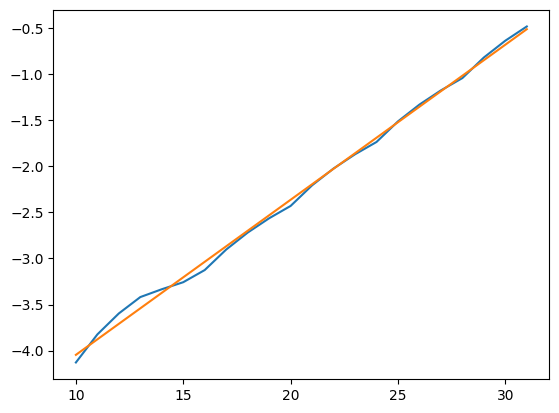

In [45]:
filtered_blue["magnitude_length"] = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_blue["band"].to_numpy()
y = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Gray

In [8]:
gray_converted = convert_to_fourier_basis(data_dir, "gray", threshold =0.03, max_depth = 9, image_opener = npz_opener)
gray_converted["number_of_coefficents"] = gray_converted["data"].apply(lambda x:len(x))/(2 *n)
gray_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.001953125 and 0.001953125 Recursion Depth of 9
Both Endpoints Are The Same 0.0027621358640099515 and 0.0027621358640099515 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.00390625 and 0.004367320268554277
Recursion Depth Exceeded Endpoints are 0.005524271728019903 and 0.006176323555016366
Recursion Depth Exceeded Endpoints are 0.007042092334890604 and 0.0078125
Recursion Depth Exceeded Endpoints are 0.011048543456039806 and 0.01188039556698871
Recursion Depth Exceeded Endpoints are 0.012352647110032733 and 0.013101960805662831
[0.00097656 0.00218366 0.00356473 0.00525895 0.00666839 0.00802109
 0.0109183  0.01207525 0.01357721 0.01644257 0.02194551 0.02741871
 0.03299406 0.03580887 0.03851833 0.04398869 0.05497586 0.06602095
 0.07703347 0.08802615 0.11006022 0.13206901 0.15406518 0.17606856
 0.22015294 0.26415428 0.30814661 0.35217232 0.44020209 0.52825984
 0.61631759]


band channel                             magnitude_endpoints  \
0      1    gray                                      (0.0, 0.0)   
1      2    gray                      (0.001953125, 0.001953125)   
2      3    gray  (0.0027621358640099515, 0.0027621358640099515)   
3      4    gray              (0.00390625, 0.004367320268554277)   
4      5    gray    (0.005524271728019903, 0.006176323555016366)   
5      6    gray               (0.007042092334890604, 0.0078125)   
6      7    gray    (0.008052940675034493, 0.010517900013934578)   
7      8    gray     (0.011048543456039806, 0.01188039556698871)   
8      9    gray    (0.012352647110032733, 0.013101960805662831)   
9     10    gray             (0.013671875, 0.016105881350068987)   
10    11    gray    (0.016572815184059706, 0.021836601342771385)   
11    12    gray     (0.02209708691207961, 0.027413415718004295)   
12    13    gray     (0.027621358640099514, 0.03274034104343791)   
13    14    gray      (0.03314563036811941, 0.03564118670096613)   
14    15    gray      (0.03585460888805824, 0.03847210078826603)   
15    16    gray      (0.0385216463346016, 0.043891025496570764)   
16    17    gray     (0.044064508487025304, 0.05482683143600859)   
17    18    gray     (0.055000499376284075, 0.06588721794309765)   
18    19    gray      (0.06608954810815872, 0.07696898630952356)   
19    20    gray       (0.0770432926692032, 0.08797738773090007)   
20    21    gray      (0.08808572096702875, 0.11000099875256815)   
21    22    gray       (0.11007033440316696, 0.1320347170402779)   
22    23    gray      (0.13207804736481807, 0.15404944559930467)   
23    24    gray        (0.1540865853384064, 0.1760523083722651)   
24    25    gray       (0.1761714419340575, 0.22014066880633393)   
25    26    gray       (0.22015799657752896, 0.2641344322329363)   
26    27    gray       (0.26415609472963614, 0.3081298431572973)   
27    28    gray       (0.3081731706768128, 0.35213711720920055)   
28    29    gray       (0.35217503062719485, 0.4401860208027468)   
29    30    gray       (0.44021635111728374, 0.5282291467669505)   
30    31    gray        (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
0                   1  [274.51198407295396, -108.93539379475183, -163...   
1                   1  [155.3332008888604, -29.836531836437093, -42.2...   
2                   1  [-129.3474739186339, 2.682645459802316, -13.88...   
3                   2  [-121.57342282342725, -17.84266803162503, -4.8...   
4                   3  [16.866057451418886, 66.48423296243644, -25.64...   
5                   2  [-6.296889228960892, -0.24393907436597348, 17....   
6                   6  [36.241997901407856, 18.512378143293923, 0.861...   
7                   4  [-5.106407904486785, 2.73134566026289, 11.0745...   
8                   3  [13.959205625265291, 14.917376410396876, 12.20...   
9                   9  [16.082363689121465, -15.53151206727085, -1.91...   
10                 22  [13.40902657540424, 11.824097878940957, 0.5918...   
11                 25  [6.180258226709263, -2.0681181917038822, 6.647...   
12                 28  [-5.1656177523465985, 7.195083709375364, 3.887...   
13                 17  [5.447800178044673, -0.7328257485014504, -2.39...   
14                 17  [5.793224500194686, -5.044240600632781, 0.4611...   
15                 38  [1.2290407078592804, 2.9989048414092974, -3.53...   
16                 88  [-2.5245784612744666, 0.5025255259556383, -2.9...   
17                105  [-0.36721232766684, 2.4912361696636927, -6.460...   
18                120  [3.5543406897828618, -0.2620894131952002, 0.53...   
19                136  [0.553433206634782, 0.2760379767494396, -0.211...   
20                318  [-1.1968071864303584, 0.6598985020851647, -1.8...   
21                381  [-1.847988396101613, 0.7385179814893124, -0.74...   
22                439  [-0.08465195997824618, -0.113836539682398, -0....   
23 

In [10]:
filtered_gray = gray_converted[gray_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.013101960805662831)]
filtered_gray

band channel                           magnitude_endpoints  \
9     10    gray           (0.013671875, 0.016105881350068987)   
10    11    gray  (0.016572815184059706, 0.021836601342771385)   
11    12    gray   (0.02209708691207961, 0.027413415718004295)   
12    13    gray   (0.027621358640099514, 0.03274034104343791)   
13    14    gray    (0.03314563036811941, 0.03564118670096613)   
14    15    gray    (0.03585460888805824, 0.03847210078826603)   
15    16    gray    (0.0385216463346016, 0.043891025496570764)   
16    17    gray   (0.044064508487025304, 0.05482683143600859)   
17    18    gray   (0.055000499376284075, 0.06588721794309765)   
18    19    gray    (0.06608954810815872, 0.07696898630952356)   
19    20    gray     (0.0770432926692032, 0.08797738773090007)   
20    21    gray    (0.08808572096702875, 0.11000099875256815)   
21    22    gray     (0.11007033440316696, 0.1320347170402779)   
22    23    gray    (0.13207804736481807, 0.15404944559930467)   
23    24    gray      (0.1540865853384064, 0.1760523083722651)   
24    25    gray     (0.1761714419340575, 0.22014066880633393)   
25    26    gray     (0.22015799657752896, 0.2641344322329363)   
26    27    gray     (0.26415609472963614, 0.3081298431572973)   
27    28    gray     (0.3081731706768128, 0.35213711720920055)   
28    29    gray     (0.35217503062719485, 0.4401860208027468)   
29    30    gray     (0.44021635111728374, 0.5282291467669505)   
30    31    gray      (0.5282905274067067, 0.6162627813472334)   

    unique_magnitudes                                               data  \
9                   9  [16.082363689121465, -15.53151206727085, -1.91...   
10                 22  [13.40902657540424, 11.824097878940957, 0.5918...   
11                 25  [6.180258226709263, -2.0681181917038822, 6.647...   
12                 28  [-5.1656177523465985, 7.195083709375364, 3.887...   
13                 17  [5.447800178044673, -0.7328257485014504, -2.39...   
14                 17  [5.793224500194686, -5.044240600632781, 0.4611...   
15                 38  [1.2290407078592804, 2.9989048414092974, -3.53...   
16                 88  [-2.5245784612744666, 0.5025255259556383, -2.9...   
17                105  [-0.36721232766684, 2.4912361696636927, -6.460...   
18                120  [3.5543406897828618, -0.2620894131952002, 0.53...   
19                136  [0.553433206634782, 0.2760379767494396, -0.211...   
20                318  [-1.1968071864303584, 0.6598985020851647, -1.8...   
21                381  [-1.847988396101613, 0.7385179814893124, -0.74...   
22                439  [-0.08465195997824618, -0.113836539682398, -0....   
23                500  [0.2784623006704806, -0.6867288889912457, -0.2...   
24               1168  [0.33791531415928505, -0.7379677495142889, 0.4...   
25               1399  [-1.4629486912706844, -0.9122189275169512, -0....   
26               1623  [-0.3040353734130863, 1.1938405740437805, 0.00...   
27               1848  [-0.25065822352306333, 0.2780890986545921, 0.1...   
28               4338  [-0.27024357796543713, 0.8305597811129921, -0....   
29               4926  [0.06918709839558607, -0.3230727594905066, 0.2...   
30               3187  [0.08271868127058639, 0.12193395642675471, 0.0...   

    number_of_coefficents  
9                0.000320  
10               0.000732  
11               0.000885  
12               0.001038  
13               0.000656  
14               0.000656  
15               0.001495  
16               0.003448  
17               0.004272  
18               0.005096  
19               0.005768  
20               0.013916  
21               0.016876  
22               0.019958  
23               0.023102  
24               0.055115  
25               0.067383  
26               0.079254  
27               0.091766  
28               0.219757  
29               0.241272  
30               0.112885

/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_10477/1853322745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gray["magnitude_length"] = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


 
0.1682 x - 5.728


1.183181413221605

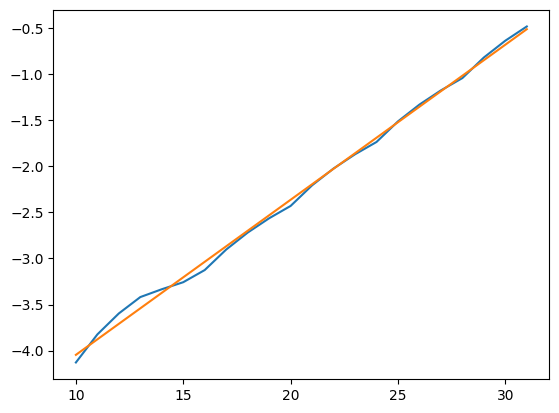

In [11]:
filtered_gray["magnitude_length"] = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_gray["band"].to_numpy()
y = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# IR

In [ ]:
infra_dir = os.path.join(ROOT_DIR, 'raw-data','agriVision','toy-agriVision-nearIR')
infra_converted = convert_to_fourier_basis(infra_dir, "infrared", threshold =0.03, max_depth = 9)
infra_converted["number_of_Coefficents"] = infra_converted["data"].apply(lambda x:len(x))/(2 *n)
infra_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.001953125 and 0.001953125 Recursion Depth of 9
Both Endpoints Are The Same 0.0027621358640099515 and 0.0027621358640099515 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.00390625 and 0.004367320268554277
Recursion Depth Exceeded Endpoints are 0.005524271728019903 and 0.006176323555016366
Recursion Depth Exceeded Endpoints are 0.007042092334890604 and 0.0078125
Recursion Depth Exceeded Endpoints are 0.011048543456039806 and 0.01188039556698871
Recursion Depth Exceeded Endpoints are 0.012352647110032733 and 0.013101960805662831
[0.00097656 0.00218366 0.00356473 0.00525895 0.00666839 0.00802109
 0.0109183  0.01207525 0.01357721 0.01644257 0.02194551 0.02741871
 0.03299406 0.04398869 0.05497586 0.06602095 0.08802615 0.13206901
 0.15406518 0.17606856 0.19815606 0.22015294 0.24214621 0.26415428
 0.28614297 0.30814661 0.33015514 0.35217232 0.37416607 0.39618053
 0.44020209 0.48422275 0.50

band   channel                             magnitude_endpoints  \
0      1  infrared                                      (0.0, 0.0)   
1      2  infrared                      (0.001953125, 0.001953125)   
2      3  infrared  (0.0027621358640099515, 0.0027621358640099515)   
3      4  infrared              (0.00390625, 0.004367320268554277)   
4      5  infrared    (0.005524271728019903, 0.006176323555016366)   
5      6  infrared               (0.007042092334890604, 0.0078125)   
6      7  infrared    (0.008052940675034493, 0.010517900013934578)   
7      8  infrared     (0.011048543456039806, 0.01188039556698871)   
8      9  infrared    (0.012352647110032733, 0.013101960805662831)   
9     10  infrared             (0.013671875, 0.016105881350068987)   
10    11  infrared    (0.016572815184059706, 0.021836601342771385)   
11    12  infrared     (0.02209708691207961, 0.027413415718004295)   
12    13  infrared     (0.027621358640099514, 0.03274034104343791)   
13    14  infrared     (0.03314563036811941, 0.043891025496570764)   
14    15  infrared     (0.044064508487025304, 0.05482683143600859)   
15    16  infrared     (0.055000499376284075, 0.06588721794309765)   
16    17  infrared      (0.06608954810815872, 0.08797738773090007)   
17    18  infrared       (0.08808572096702875, 0.1320347170402779)   
18    19  infrared      (0.13207804736481807, 0.15404944559930467)   
19    20  infrared        (0.1540865853384064, 0.1760523083722651)   
20    21  infrared        (0.1761714419340575, 0.1981146641872217)   
21    22  infrared      (0.19823016050339848, 0.22014066880633393)   
22    23  infrared       (0.22015799657752896, 0.2421402423651555)   
23    24  infrared       (0.24216387233535297, 0.2641344322329363)   
24    25  infrared      (0.26415609472963614, 0.28611781370671857)   
25    26  infrared       (0.28615114329081515, 0.3081298431572973)   
26    27  infrared       (0.3081731706768128, 0.33014745943396734)   
27    28  infrared      (0.33017056767641423, 0.35213711720920055)   
28    29  infrared       (0.35217503062719485, 0.3741496299031186)   
29    30  infrared       (0.37419550749846164, 0.3961571155552783)   
30    31  infrared        (0.3961956306967596, 0.4401860208027468)   
31    32  infrared       (0.44021635111728374, 0.4842056470577126)   
32    33  infrared       (0.48422534230346337, 0.5062249825029936)   
33    34  infrared        (0.5062513563349886, 0.5282291467669505)   
34    35  infrared        (0.5282905274067067, 0.5722689579681098)   
35    36  infrared        (0.5723022865816303, 0.6162627813472334)   

    unique_magnitudes                                               data  \
0                   1  [36350903.0, 29113077.0, 19924472.0, 22022197....   
1                   1  [-623752.6038447742, 206769.23890754022, -3738...   
2                   1  [-364151.1729922761, 240647.1587276202, 34669....   
3                   2  [-248671.0561667045, 221498.06410867523, 17472...   
4                   3  [19335.59771961689, 145226.14198845671, 12620....   
5                   2  [-48640.36250730565, -178941.37806739114, 2196...   
6                   6  [-165232.6484126338, 47638.800054071486, -5577...   
7                   4  [27898.898007444943, -83848.32502334696, -4156...   
8                   3  [-107576.8935970107, 188108.4899261115, 12216....   
9                   9  [23113.517722660676, 52337.48468181843, 52550....   
10                 22  [60133.39893179062, -103192.35636735141, -3375...   
11                 25  [-7998.869895527389, -49976.15039333284, 28457...   
12                 28  [53225.6606857881, -20977.148919613577, -11168...   
13                 72  [-54868.37003059918, -11703.797431113464, -197...   
14                 88  [-21683.839373147035, -11868.584995889489, 242...   
15                105  [30654.884575990218, -1937.527923985323, 15062...   
16                256  [19749.111373772826, 312.5937733447156, -11679...   
17                699  [-24683.855237669653, 

In [ ]:
filtered_infra = infra_converted[infra_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.013101960805662831)]
filtered_infra

band   channel                           magnitude_endpoints  \
9     10  infrared           (0.013671875, 0.016105881350068987)   
10    11  infrared  (0.016572815184059706, 0.021836601342771385)   
11    12  infrared   (0.02209708691207961, 0.027413415718004295)   
12    13  infrared   (0.027621358640099514, 0.03274034104343791)   
13    14  infrared   (0.03314563036811941, 0.043891025496570764)   
14    15  infrared   (0.044064508487025304, 0.05482683143600859)   
15    16  infrared   (0.055000499376284075, 0.06588721794309765)   
16    17  infrared    (0.06608954810815872, 0.08797738773090007)   
17    18  infrared     (0.08808572096702875, 0.1320347170402779)   
18    19  infrared    (0.13207804736481807, 0.15404944559930467)   
19    20  infrared      (0.1540865853384064, 0.1760523083722651)   
20    21  infrared      (0.1761714419340575, 0.1981146641872217)   
21    22  infrared    (0.19823016050339848, 0.22014066880633393)   
22    23  infrared     (0.22015799657752896, 0.2421402423651555)   
23    24  infrared     (0.24216387233535297, 0.2641344322329363)   
24    25  infrared    (0.26415609472963614, 0.28611781370671857)   
25    26  infrared     (0.28615114329081515, 0.3081298431572973)   
26    27  infrared     (0.3081731706768128, 0.33014745943396734)   
27    28  infrared    (0.33017056767641423, 0.35213711720920055)   
28    29  infrared     (0.35217503062719485, 0.3741496299031186)   
29    30  infrared     (0.37419550749846164, 0.3961571155552783)   
30    31  infrared      (0.3961956306967596, 0.4401860208027468)   
31    32  infrared     (0.44021635111728374, 0.4842056470577126)   
32    33  infrared     (0.48422534230346337, 0.5062249825029936)   
33    34  infrared      (0.5062513563349886, 0.5282291467669505)   
34    35  infrared      (0.5282905274067067, 0.5722689579681098)   
35    36  infrared      (0.5723022865816303, 0.6162627813472334)   

    unique_magnitudes                                               data  \
9                   9  [23113.517722660676, 52337.48468181843, 52550....   
10                 22  [60133.39893179062, -103192.35636735141, -3375...   
11                 25  [-7998.869895527389, -49976.15039333284, 28457...   
12                 28  [53225.6606857881, -20977.148919613577, -11168...   
13                 72  [-54868.37003059918, -11703.797431113464, -197...   
14                 88  [-21683.839373147035, -11868.584995889489, 242...   
15                105  [30654.884575990218, -1937.527923985323, 15062...   
16                256  [19749.111373772826, 312.5937733447156, -11679...   
17                699  [-24683.855237669653, -6137.129800675035, -865...   
18                439  [10183.443701741522, 9312.784426443259, -10427...   
19                500  [-10258.03206970309, 2413.7114523954842, 1000....   
20                557  [5612.08418572167, -4387.506884123547, -11041....   
21                611  [-7815.730442525766, -4134.1195832773155, 248....   
22                672  [2372.5274690537153, -642.6582460872309, -4724...   
23                727  [1890.2385679243616, -5187.561614147764, 1550....   
24                781  [3765.055076498164, 4410.680335255925, 5913.62...   
25                842  [-209.2858028982451, -1701.1218318686974, -284...   
26                893  [-1225.7809021012185, 100.45411474824164, 2354...   
27                955  [5545.956413926993, 741.813696349655, 378.8678...   
28                999  [446.419747327074, -1152.6426794916113, -1423....   
29               1059  [-2037.0888406272154, 1857.958974966936, 833.6...   
30               2280  [-370.15272247507573, 84.58596732328829, -46.5...   
31               2507  [269.82975301600663, -2562.642451719482, 653.2...   
32               1301  [340.6268759152091, 444.29341900065674, 318.43...   
33               1118  [-3.2336752489059677, 175.08109247587208, -184...   
34               1843  [-191.30245872962928, -49.78801704557206, 414....   
35               1344  [-27.96343567843809, -47

 
0.1322 x - 4.821


/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_12738/2617865376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_infra["magnitude_length"] = filtered_infra["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.141349420695688

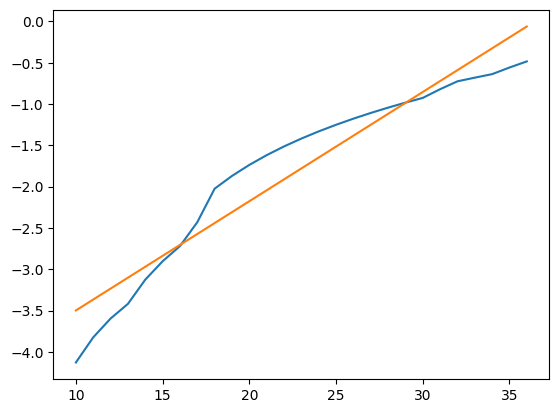

In [ ]:
filtered_infra["magnitude_length"] = filtered_infra["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_infra["band"].to_numpy()
y = filtered_infra["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

In [12]:
splits = getSplits(0.013101960805662831,0.6162627813472334, 1.18)
splits

[0.013101960805662831,
 0.01546031375068214,
 0.018243170225804923,
 0.02152694086644981,
 0.025401790222410774,
 0.02997411246244471,
 0.035369452705684756,
 0.04173595419270801,
 0.049248425947395445,
 0.05811314261792662,
 0.0685735082891534,
 0.08091673978120101,
 0.09548175294181718,
 0.11266846847134426,
 0.1329487927961862,
 0.1568795754994997,
 0.18511789908940965,
 0.21843912092550338,
 0.25775816269209395,
 0.30415463197667086,
 0.3589024657324716,
 0.42350490956431647,
 0.4997357932858934,
 0.5896882360773542,
 0.6958321185712779]

In [13]:
converted_red_with_splits = convert_to_fourier_basis(data_dir, "red", split_list = splits, image_opener = npz_opener)
converted_red_with_splits

[0.01310196 0.01546031 0.01824317 0.02152694 0.02540179 0.02997411
 0.03536945 0.04173595 0.04924843 0.05811314 0.06857351 0.08091674
 0.09548175 0.11266847 0.13294879 0.15687958 0.1851179  0.21843912
 0.25775816 0.30415463 0.35890247 0.42350491 0.49973579 0.58968824
 0.69583212]


band channel                           magnitude_endpoints  \
0      1     red                   (0.0, 0.012506102026236032)   
1      2     red  (0.013101960805662831, 0.015254393898255184)   
2      3     red               (0.015625, 0.01800692276815017)   
3      4     red           (0.018425744398548053, 0.021484375)   
4      5     red            (0.02157297073669387, 0.025390625)   
5      6     red  (0.025465634395322848, 0.029877067462457725)   
6      7     red    (0.03032065370363286, 0.03521046167445302)   
7      8     red  (0.035372598195849286, 0.041524007080994726)   
8      9     red     (0.0417530436063124, 0.04917843090630536)   
9     10     red   (0.04929464634423423, 0.058070581044212914)   
10    11     red    (0.058267319883501166, 0.0684708911834301)   
11    12     red     (0.0685822260393728, 0.08086031853314239)   
12    13     red    (0.08093105216836195, 0.09546366726445263)   
13    14     red    (0.09554355319246101, 0.11255491823612429)   
14    15     red    (0.11267347735824966, 0.13294168808782528)   
15    16     red    (0.13299906473619702, 0.15684700400713947)   
16    17     red    (0.15688348146893127, 0.18508371469503335)   
17    18     red      (0.1851455363461573, 0.2184184149835042)   
18    19     red     (0.21848826417460332, 0.2577089043757147)   
19    20     red    (0.25776070739232276, 0.30414866215619996)   
20    21     red     (0.3042113667568365, 0.35887044233924537)   
21    22     red     (0.35891295875586693, 0.4235039803093834)   
22    23     red    (0.42350848401791935, 0.49973289984891556)   
23    24     red      (0.4997596162879366, 0.5896788107550717)   
24    25     red      (0.5897176241394716, 0.6947444352582218)   

    unique_magnitudes                                               data  
0                  22  [489.9360440573821, -308.8413377196252, -239.5...  
1                   7  [5.831908453049149, 14.664398563558699, 4.2599...  
2                  10  [-40.55432323401961, 11.556280540505687, 5.692...  
3                  13  [0.5637201934621372, 4.867418357819647, 2.5237...  
4                  17  [11.764198264112366, -0.45023954683089257, -1....  
5                  23  [-7.642340190916694, 1.133507730031046, -0.187...  
6                  30  [0.016284527145606353, 8.069771437172271, 2.17...  
7                  41  [0.8756870764076625, -4.915482355222908, 5.445...  
8                  57  [-6.237068397078724, -1.1265834119200075, -0.5...  
9                  77  [-0.719178144512424, -2.8265859110473324, -0.7...  
10                103  [-1.0110026739933429, 2.2617567091360873, -1.0...  
11                139  [-0.06419088601692818, -0.5016362727447554, 2....  
12                194  [-0.09499752945997465, -0.5678265770106952, -0...  
13                256  [-0.7098329475340915, -0.04343151503566503, 0....  
14                356  [-0.30868074743155677, 0.9380627446979726, 0.3...  
15                483  [1.1315527931242713, -0.1967045297818878, -0.5...  
16                658  [0.26762396174248426, -0.11662855498719957, 0....  
17                900  [-0.31239250753088, 1.43595788968474, 0.104973...  
18               1228  [0.2161213981046579, -0.4255513357378845, -0.0...  
19               1687  [-0.07678770390436163, -0.6520978534898454, -0...  
20               2298  [-0.04253410555565164, 0.4615301060239535, -0....  
21               3153  [0.24963190340886582, 0.027116195433151705, 0....  
22               4327  [0.05777152349857416, -0.12657698424920166, 0....  
23               3922  [0.20879139022958104, 0.013937147739279968, 0....  
24               1843  [-0.10473907305877234, 0.10432252209694876, 0....

In [ ]:
converted_green_with_splits = convert_to_fourier_basis(data_dir, "green", split_list = splits, image_opener = npz_opener)
converted_green_with_splits

[0.00805294 0.00926088 0.01065001 0.01224752 0.01408464 0.01619734
 0.01862694 0.02142098 0.02463413 0.02832925 0.03257864 0.03746543
 0.04308525 0.04954803 0.05698024 0.06552727 0.07535637 0.08665982
 0.09965879 0.11460761 0.13179875 0.15156857 0.17430385 0.20044943
 0.23051685 0.26509437 0.30485853 0.35058731 0.4031754  0.46365171]


band channel                           magnitude_endpoints  \
0      1   green                              (0.0, 0.0078125)   
1      2   green  (0.008052940675034493, 0.008734640537108554)   
2      3   green           (0.009765625, 0.010517900013934578)   
3      4   green   (0.011048543456039806, 0.01188039556698871)   
4      5   green  (0.012352647110032733, 0.014084184669781208)   
5      6   green  (0.014218964627501012, 0.016105881350068987)   
6      7   green  (0.016572815184059706, 0.018528970665049098)   
7      8   green  (0.019236050394133015, 0.021126277004671814)   
8      9   green           (0.021484375, 0.024472586105745445)   
9     10   green  (0.024705294220065465, 0.028168369339562415)   
10    11   green   (0.028437929255002024, 0.03250647847088523)   
11    12   green   (0.03274034104343791, 0.037314400731528904)   
12    13   green    (0.0375183060787081, 0.043013116299893045)   
13    14   green   (0.04314594147338774, 0.049449175395203764)   
14    15   green    (0.04971844555217912, 0.05694288959809864)   
15    16   green     (0.0570432885410556, 0.06550980402831415)   
16    17   green     (0.0656261625641072, 0.07516359923786663)   
17    18   green    (0.07536633352177632, 0.08651263511855509)   
18    19   green     (0.0866888321139537, 0.09962852144419414)   
19    20   green    (0.09968593871230348, 0.11458703237400492)   
20    21   green     (0.11463695774085304, 0.1317889094362292)   
21    22   green      (0.13190464066330504, 0.151414433150893)   
22    23   green     (0.1516032685181643, 0.17422269123905224)   
23    24   green    (0.17435401489431102, 0.20044049391667967)   
24    25   green     (0.20048806719575762, 0.2305018514364364)   
25    26   green     (0.23054322154848345, 0.2650859074528069)   
26    27   green     (0.2651650429449553, 0.30485021696754006)   
27    28   green     (0.3049002662564945, 0.35057369625216644)   
28    29   green      (0.350611778730786, 0.40316776965462064)   
29    30   green     (0.4032339968926231, 0.46359469792623004)   

    unique_magnitudes                                               data  
0                  10  [132337.4305287921, -94390.76719970972, -25336...  
1                   3  [-3744.2517307820394, 27861.851019473375, -834...  
2                   3  [33471.33269346464, 123824.82250566437, 34140....  
3                   4  [-1484.3855749710306, 48440.95662398659, 327.6...  
4                   6  [-134.22405033910488, -13102.246547704386, 147...  
5                   6  [-4157.122139563215, 92624.21102152459, -14078...  
6                   9  [-3615.6105012069156, -4331.356927374733, -806...  
7                  10  [-78.03614790436167, 42640.10973606152, -2528....  
8                  14  [-7802.285743968246, 5985.598993590172, -780.2...  
9                  18  [3303.274320208527, 20047.431364818483, -1769....  
10                 23  [774.5759807316168, 4415.676376697004, -3871.5...  
11                 29  [-1118.7219100237694, -10510.688881196822, -31...  
12                 39  [-131.09403884850573, -3327.6789068645585, 201...  
13                 49  [2075.4202780238384, 8902.543533935039, 2987.8...  
14                 64  [-1736.9105218173213, -7060.172255307523, 139....  
15                 82  [-531.9918664535685, 3655.9724582616227, 1706....  
16                104  [112.15907404511769, -701.2119846431932, -138....  
17                138  [607.6615095317704, 7463.602356088377, -318.75...  
18                180  [-166.74874637012974, 5617.953620178152, -1357...  
19                229  [-7.737550682415915, -1873.402379729209, 3.960...  
20                304  [250.40616061306395, -8873.297235612918, 283.5...  
21                388  [-241.79883984531938, 480.8481434022927, 775.3...  
22                510  [801.8452258582861, -29.793185182728678, -681....  
23                666  [5.878945213588308, 2863.366879902859, 847.096...  
24                858  [-268.1136165437716, 1639.2274647375061, -126....  
25     

In [35]:
converted_blue_with_splits = convert_to_fourier_basis(data_dir, "blue", split_list = splits, image_opener = npz_opener_pickle)
converted_blue_with_splits

[0.02620392 0.03223082 0.03964391 0.04876201 0.05997728 0.07377205
 0.09073962 0.11160973 0.13727997 0.16885437 0.20769087 0.25545977
 0.31421552 0.38648509 0.47537666 0.58471329 0.71919734]


band channel                          magnitude_endpoints  \
0      1    blue                  (0.0, 0.025012204052472065)   
1      2    blue  (0.026203921611325662, 0.03221176270013797)   
2      3    blue  (0.03314563036811941, 0.039257326645003476)   
3      4    blue  (0.03983608994994363, 0.048317644050206957)   
4      5    blue   (0.04894517221149089, 0.05975413492491545)   
5      6    blue   (0.06064130740726572, 0.07370297759419221)   
6      7    blue   (0.07411588266019639, 0.09060479300580626)   
7      8    blue   (0.09085705741885163, 0.11117382399029459)   
8      9    blue   (0.11172148160996165, 0.13722006304883044)   
9     10    blue   (0.13738676089897636, 0.16869392876319675)   
10    11    blue    (0.1690102160373745, 0.20765677906253144)   
11    12    blue     (0.207913802846426, 0.25543410506674713)   
12    13    blue     (0.2556132523278576, 0.3141800541812171)   
13    14    blue    (0.3142528962674807, 0.38632397779624356)   
14    15    blue   (0.38654115240165565, 0.47537634145550933)   
15    16    blue      (0.4754244865200072, 0.584699212369328)   
16    17    blue      (0.585051413339033, 0.7015825094585276)   

    unique_magnitudes                                               data  
0                  22  [25380.015625, 30578.77734375, 43920.640625, 2...  
1                  10  [-29.592005626552893, -5.743617036867871, 269....  
2                  13  [10.993307112276197, -31.403730011062546, -139...  
3                  19  [-120.00682928853308, -54.023924506010914, -36...  
4                  28  [11.270843016222177, -51.959521126352875, 25.2...  
5                  39  [-54.69532338961412, -28.746519665924005, -20....  
6                  58  [17.636397131322482, -11.952038364449752, 82.7...  
7                  87  [9.340519285950165, -67.18621112899203, -57.36...  
8                 126  [15.918966861288624, -14.618391878044703, -31....  
9                 181  [7.990770233269202, 48.6233545329557, -50.7050...  
10                271  [-5.513027727227387, 2.173450809892521, 25.081...  
11                395  [-4.3654053168507145, 8.948912950490438, -20.0...  
12                584  [-2.1136853342374913, -16.420238409329727, -7....  
13                861  [-5.524088834793449, -24.89083980626539, 9.922...  
14               1273  [5.832006299290931, 2.5502845319467142, -4.179...  
15               1363  [-0.30947028093410855, 6.874184480102828, -2.3...  
16                509  [-0.13984915693370947, 3.112706406381734, -3.5...

In [36]:
converted_gray_with_splits = convert_to_fourier_basis(data_dir, "gray", split_list = splits, image_opener = npz_opener_pickle)
converted_gray_with_splits

[0.02620392 0.03223082 0.03964391 0.04876201 0.05997728 0.07377205
 0.09073962 0.11160973 0.13727997 0.16885437 0.20769087 0.25545977
 0.31421552 0.38648509 0.47537666 0.58471329 0.71919734]


band channel                          magnitude_endpoints  \
0      1    gray                  (0.0, 0.025012204052472065)   
1      2    gray  (0.026203921611325662, 0.03221176270013797)   
2      3    gray  (0.03314563036811941, 0.039257326645003476)   
3      4    gray  (0.03983608994994363, 0.048317644050206957)   
4      5    gray   (0.04894517221149089, 0.05975413492491545)   
5      6    gray   (0.06064130740726572, 0.07370297759419221)   
6      7    gray   (0.07411588266019639, 0.09060479300580626)   
7      8    gray   (0.09085705741885163, 0.11117382399029459)   
8      9    gray   (0.11172148160996165, 0.13722006304883044)   
9     10    gray   (0.13738676089897636, 0.16869392876319675)   
10    11    gray    (0.1690102160373745, 0.20765677906253144)   
11    12    gray     (0.207913802846426, 0.25543410506674713)   
12    13    gray     (0.2556132523278576, 0.3141800541812171)   
13    14    gray    (0.3142528962674807, 0.38632397779624356)   
14    15    gray   (0.38654115240165565, 0.47537634145550933)   
15    16    gray      (0.4754244865200072, 0.584699212369328)   
16    17    gray      (0.585051413339033, 0.7015825094585276)   

    unique_magnitudes                                               data  
0                  22  [25300.414239453123, 33779.23995039062, 46227....  
1                  10  [-102.58041470678828, -145.01019343114706, 237...  
2                  13  [-33.44969914113115, -42.672740639791044, -123...  
3                  19  [-157.25970441693718, -57.384616891543885, -31...  
4                  28  [14.109034398580519, -68.36597903275361, -6.14...  
5                  39  [-61.72934284474167, -38.37766091526721, 14.67...  
6                  58  [16.77517917835008, -41.51399675968157, 80.669...  
7                  87  [23.895167247458414, -75.76825416837505, -39.8...  
8                 126  [-4.91087162014624, -30.07281794112485, -22.30...  
9                 181  [-2.9460922511086274, 45.45141972361769, -44.3...  
10                271  [-4.164818330150137, 6.595392525865444, 25.633...  
11                395  [-3.8813375492113478, 14.2929073913259, -18.47...  
12                584  [-1.8294228809079058, -17.743113472654265, -7....  
13                861  [-5.220439761246003, -24.394552986813117, 10.4...  
14               1273  [5.741616432024864, 2.2055967266873164, -4.773...  
15               1363  [-0.55765003615369, 7.417397137164716, -2.5254...  
16                509  [0.17341842279594388, 3.291375054168748, -3.52...

In [ ]:
converted_infra_with_splits = convert_to_fourier_basis(infra_dir, "infrared", split_list = splits)
converted_infra_with_splits

[0.00805294 0.00926088 0.01065001 0.01224752 0.01408464 0.01619734
 0.01862694 0.02142098 0.02463413 0.02832925 0.03257864 0.03746543
 0.04308525 0.04954803 0.05698024 0.06552727 0.07535637 0.08665982
 0.09965879 0.11460761 0.13179875 0.15156857 0.17430385 0.20044943
 0.23051685 0.26509437 0.30485853 0.35058731 0.4031754  0.46365171]


band   channel                           magnitude_endpoints  \
0      1  infrared                              (0.0, 0.0078125)   
1      2  infrared  (0.008052940675034493, 0.008734640537108554)   
2      3  infrared           (0.009765625, 0.010517900013934578)   
3      4  infrared   (0.011048543456039806, 0.01188039556698871)   
4      5  infrared  (0.012352647110032733, 0.014084184669781208)   
5      6  infrared  (0.014218964627501012, 0.016105881350068987)   
6      7  infrared  (0.016572815184059706, 0.018528970665049098)   
7      8  infrared  (0.019236050394133015, 0.021126277004671814)   
8      9  infrared           (0.021484375, 0.024472586105745445)   
9     10  infrared  (0.024705294220065465, 0.028168369339562415)   
10    11  infrared   (0.028437929255002024, 0.03250647847088523)   
11    12  infrared   (0.03274034104343791, 0.037314400731528904)   
12    13  infrared    (0.0375183060787081, 0.043013116299893045)   
13    14  infrared   (0.04314594147338774, 0.049449175395203764)   
14    15  infrared    (0.04971844555217912, 0.05694288959809864)   
15    16  infrared     (0.0570432885410556, 0.06550980402831415)   
16    17  infrared     (0.0656261625641072, 0.07516359923786663)   
17    18  infrared    (0.07536633352177632, 0.08651263511855509)   
18    19  infrared     (0.0866888321139537, 0.09962852144419414)   
19    20  infrared    (0.09968593871230348, 0.11458703237400492)   
20    21  infrared     (0.11463695774085304, 0.1317889094362292)   
21    22  infrared      (0.13190464066330504, 0.151414433150893)   
22    23  infrared     (0.1516032685181643, 0.17422269123905224)   
23    24  infrared    (0.17435401489431102, 0.20044049391667967)   
24    25  infrared     (0.20048806719575762, 0.2305018514364364)   
25    26  infrared     (0.23054322154848345, 0.2650859074528069)   
26    27  infrared     (0.2651650429449553, 0.30485021696754006)   
27    28  infrared     (0.3049002662564945, 0.35057369625216644)   
28    29  infrared      (0.350611778730786, 0.40316776965462064)   
29    30  infrared     (0.4032339968926231, 0.46359469792623004)   

    unique_magnitudes                                               data  
0                  10  [36350903.0, 29113077.0, 19924472.0, 22022197....  
1                   3  [-165232.6484126338, 47638.800054071486, -5577...  
2                   3  [-45356.94414865256, -7284.410583915042, 47252...  
3                   4  [27898.898007444943, -83848.32502334696, -4156...  
4                   6  [-107576.8935970107, 188108.4899261115, 12216....  
5                   6  [84366.17361988052, -19321.68384241026, -25095...  
6                   9  [60133.39893179062, -103192.35636735141, -3375...  
7                  10  [22076.47040784757, -40814.28779458289, 25212....  
8                  14  [51223.15792388479, 20743.858206325764, 5840.7...  
9                  18  [-3101.7668181022404, -39825.35610518281, 7958...  
10                 23  [10430.3325085131, -44987.34630271276, -39016....  
11                 29  [-7470.44174715105, -15349.959298566988, 2765....  
12                 39  [12038.739417335695, 8559.562117475944, 12671....  
13                 49  [14758.462283497212, -3050.9717345147546, -525...  
14                 64  [727.6016242071221, -7441.403155405146, -8040....  
15                 82  [-3520.2386952959823, -3587.1587900674886, -52...  
16                104  [12616.700278830636, -15616.56034621562, 8480....  
17                138  [2097.4384768222344, -17098.60672761785, 5701....  
18                180  [-15541.528067467973, -24751.280975319652, 793...  
19                229  [20806.427318137383, 3224.312818737066, 667.19...  
20                304  [-6117.122142890728, -108.60287113266025, -676...  
21                388  [9122.907124296044, 1567.2391049437888, 14828....  
22                510  [5624.2590080047585, -3082.3564266546523, -944...  
23                666  [8454.078165212566, 2464.79691835212, -686.233...  
24                85